In [1]:
import numpy as np
import scipy.special as spe
import pickle
from pathlib import Path
from matplotlib import cm

from robust_motifs.data import load_sparse_matrix_from_pkl
from robust_motifs.plot import (compare_graphs, compare_graphs_normalized, compare_graphs_percent, 
                                plot_biedge_cumulative, plot_simplex_counts, plot_biedge_counts)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def draw_all_graphs(dictionary, n_instances):
    for elem in dictionary.values():
        fig = plt.figure()
        ax = fig.add_subplot()
        sns.heatmap(np.tril(elem)/ n_instances,ax = ax, annot = True, cmap = 'Reds')

In [4]:
a = pickle.load(open(Path("data/bcounts/column/bcounts.pkl"),'rb'))
b0 = pickle.load(open(Path("data/bcounts/adjusted/seed_0/bcounts.pkl"),'rb'))
b1 = pickle.load(open(Path("data/bcounts/adjusted/seed_1/bcounts.pkl"),'rb'))
b2 = pickle.load(open(Path("data/bcounts/adjusted/seed_2/bcounts.pkl"),'rb'))
c0 = pickle.load(open(Path("data/bcounts/bshuffled_1/seed_0/bcounts.pkl"),'rb'))
c1 = pickle.load(open(Path("data/bcounts/bshuffled_1/seed_1/bcounts.pkl"), 'rb'))
c2 = pickle.load(open(Path("data/bcounts/bshuffled_1/seed_2/bcounts.pkl"), 'rb'))
d0 = pickle.load(open(Path("data/bcounts/underlying_1/seed_0/bcounts.pkl"),'rb'))
d1 = pickle.load(open(Path("data/bcounts/underlying_1/seed_1/bcounts.pkl"),'rb'))
d2 = pickle.load(open(Path("data/bcounts/underlying_1/seed_2/bcounts.pkl"),'rb'))

In [5]:
am = pickle.load(open(Path("data/bcounts/column/mbcounts.pkl"),'rb'))
bm = pickle.load(open(Path("data/bcounts/adjusted/seed_0/mbcounts.pkl"),'rb'))
cm = pickle.load(open(Path("data/bcounts/bshuffled/seed_0/mbcounts.pkl"),'rb'))
dm = pickle.load(open(Path("data/bcounts/underlying/seed_0/mbcounts.pkl"),'rb'))
am[6] = a[6]
bm[4] = b0[4]
cm[6] = c0[6]
dm[7] = d0[7]

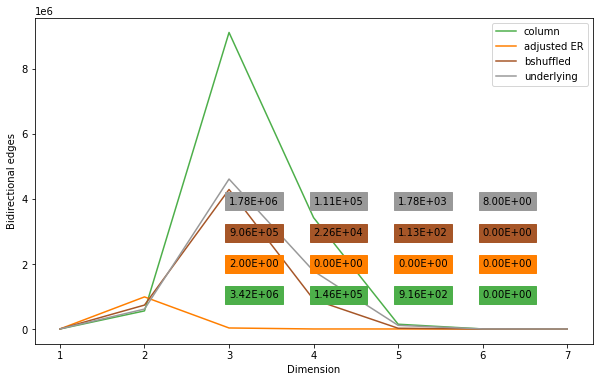

In [6]:
plot_biedge_counts([am,bm,cm,dm], 6, 3, ["column", "adjusted ER", "bshuffled", "underlying"], "mbcount_few")

In [7]:
def get_position(row, col, dictionary_list, normalized = False):
    if normalized:
        return [m[row][col]/m[0][1] for m in dictionary_list.values()]
    else:
        return [m[row][col] for m in a.values()]

In [8]:
column_edges_01 = [m[1][0]/m[0][1] for m in a.values()]
bshuffled_edges_01 = [m[1][0]/m[0][1] for m in c0.values()]
underlying_edges_01 = [m[1][0]/m[0][1] for m in d0.values()]
column_edges_last = [m[-1][-2]/m[0][1] for m in a.values()]
bshuffled_edges_last = [m[-1][-2]/m[0][1] for m in c0.values()]
underlying_edges_last = [m[-1][-2]/m[0][1] for m in d0.values()]
column_edges_0n = [m[-1][0]/m[0][1] for m in a.values()]
bshuffled_edges_0n = [m[-1][0]/m[0][1] for m in c0.values()]
underlying_edges_0n = [m[-1][0]/m[0][1] for m in d0.values()]

column_edges_other = [np.sum(np.tril(m, -1))/m[0][1] for m in a.values()]
bshuffled_edges_other = [np.sum(np.tril(m, -1))/m[0][1] for m in c0.values()]
underlying_edges_other = [np.sum(np.tril(m, -1))/m[0][1] for m in d0.values()]

column_edges_spine = [np.sum(np.diag(m, -1))/m[0][1] for m in a.values()]
bshuffled_edges_spine = [np.sum(np.diag(m, -1))/m[0][1] for m in c0.values()]
underlying_edges_spine = [np.sum(np.diag(m, -1))/m[0][1] for m in d0.values()]

<ipython-input-8-dc1d9a68f2d2>:1: RuntimeWarning: invalid value encountered in double_scalars
  column_edges_01 = [m[1][0]/m[0][1] for m in a.values()]
<ipython-input-8-dc1d9a68f2d2>:2: RuntimeWarning: invalid value encountered in double_scalars
  bshuffled_edges_01 = [m[1][0]/m[0][1] for m in c0.values()]
<ipython-input-8-dc1d9a68f2d2>:3: RuntimeWarning: invalid value encountered in double_scalars
  underlying_edges_01 = [m[1][0]/m[0][1] for m in d0.values()]
<ipython-input-8-dc1d9a68f2d2>:4: RuntimeWarning: invalid value encountered in double_scalars
  column_edges_last = [m[-1][-2]/m[0][1] for m in a.values()]
<ipython-input-8-dc1d9a68f2d2>:5: RuntimeWarning: invalid value encountered in double_scalars
  bshuffled_edges_last = [m[-1][-2]/m[0][1] for m in c0.values()]
<ipython-input-8-dc1d9a68f2d2>:6: RuntimeWarning: invalid value encountered in double_scalars
  underlying_edges_last = [m[-1][-2]/m[0][1] for m in d0.values()]
<ipython-input-8-dc1d9a68f2d2>:7: RuntimeWarning: invalid 

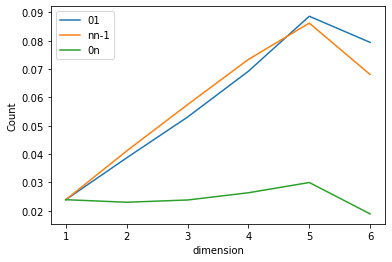

In [9]:
plt.plot(range(1,11),column_edges_01, label = '01')
plt.plot(range(1,11),column_edges_last, label = 'nn-1')
plt.plot(range(1,11),column_edges_0n, label = '0n')
plt.legend()
plt.xlabel("dimension")
plt.ylabel("Count")
plt.savefig("counts_normalized_position_column")

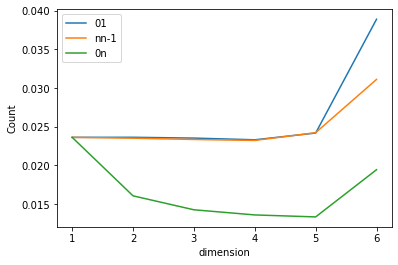

In [10]:
plt.plot(range(1,11),bshuffled_edges_01, label = '01')
plt.plot(range(1,11),bshuffled_edges_last, label = 'nn-1')
plt.plot(range(1,11),bshuffled_edges_0n, label = '0n')
plt.xlabel("dimension")
plt.ylabel("Count")
plt.legend()
plt.savefig("counts_normalized_position_bshuffled")

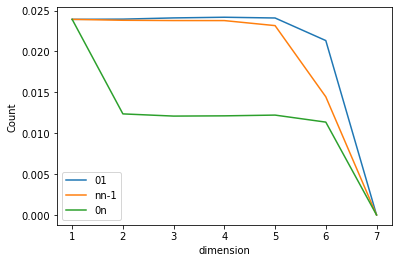

In [11]:
plt.plot(range(1,11),underlying_edges_01, label = '01')
plt.plot(range(1,11),underlying_edges_last, label = 'nn-1')
plt.plot(range(1,11),underlying_edges_0n, label = '0n')
plt.xlabel("dimension")
plt.ylabel("Count")
plt.legend()
plt.savefig("counts_normalized_position_underlying")

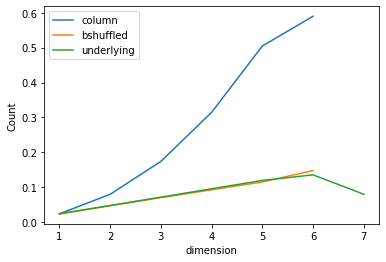

In [12]:
plt.plot(range(1,11),column_edges_spine, label = 'column')
plt.plot(range(1,11),bshuffled_edges_spine, label = 'bshuffled')
plt.plot(range(1,11),underlying_edges_spine, label = 'underlying')
plt.xlabel("dimension")
plt.ylabel("Count")
plt.legend()
plt.savefig("normalized_spine_count")

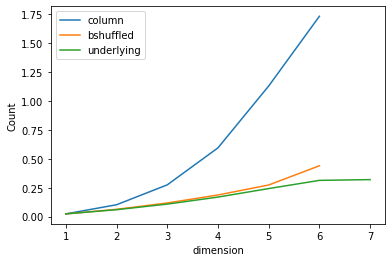

In [13]:
plt.plot(range(1,11),column_edges_other, label = 'column')
plt.plot(range(1,11),bshuffled_edges_other, label = 'bshuffled')
plt.plot(range(1,11),underlying_edges_other, label = 'underlying')
plt.xlabel("dimension")
plt.ylabel("Count")
plt.legend()
plt.savefig("normalized_other_count")

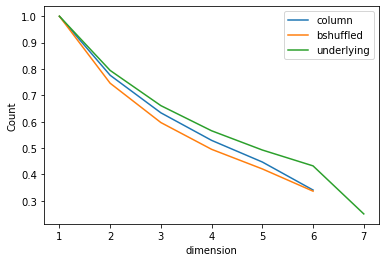

In [14]:
plt.plot(range(1,11),np.array(column_edges_spine)/np.array(column_edges_other), label = 'column')
plt.plot(range(1,11),np.array(bshuffled_edges_spine)/np.array(bshuffled_edges_other), label = 'bshuffled')
plt.plot(range(1,11),np.array(underlying_edges_spine)/np.array(underlying_edges_other), label = 'underlying')
plt.xlabel("dimension")
plt.ylabel("Count")
plt.legend()
plt.savefig("normalized_ratio_count")

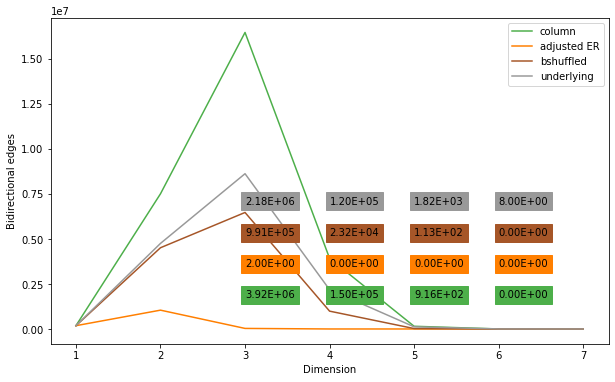

In [15]:
plot_biedge_counts([a,b0,c0,d0], 6, 3, ["column", "adjusted ER", "bshuffled", "underlying"], "bcount_few")

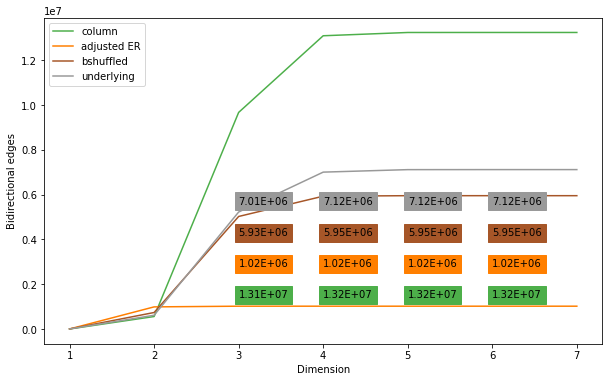

In [16]:
plot_biedge_cumulative([am,bm,cm,dm], 6, 3, ["column", "adjusted ER", "bshuffled", "underlying"], "mbcumul_few")

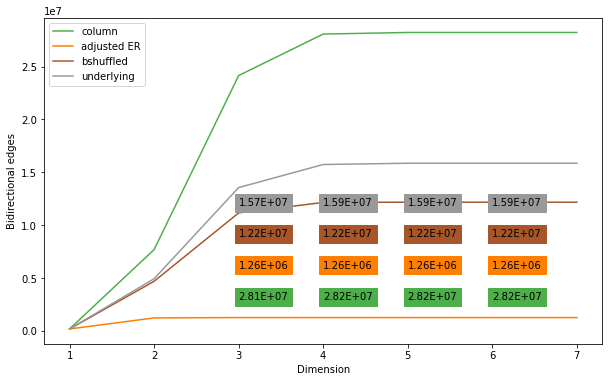

In [17]:
plot_biedge_cumulative([a,b0,c0,d0], 6, 3, ["column", "adjusted ER", "bshuffled", "underlying"], "bcumul_few")

<ipython-input-18-50983d227c52>:5: RuntimeWarning: invalid value encountered in true_divide
  dictionary[key] = x[key]/x[key][0][-1]


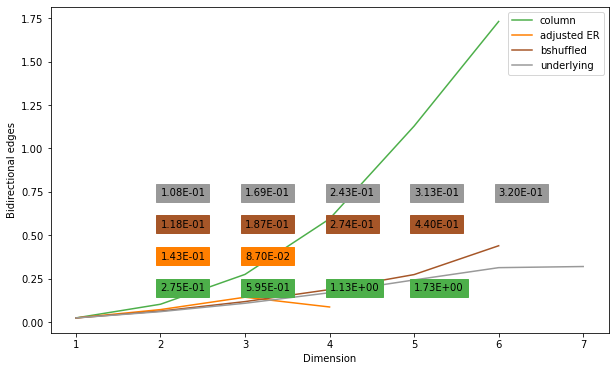

In [18]:
normalized_list = []
for x in [a, b0, c0, d0]:
    dictionary = {}
    for key in x.keys():
        dictionary[key] = x[key]/x[key][0][-1]
    normalized_list.append(dictionary)
plot_biedge_counts(normalized_list, 6, 2, ["column", "adjusted ER", "bshuffled", "underlying"], "bcount_few_normalized")

<ipython-input-19-e528fc9dcec4>:5: RuntimeWarning: invalid value encountered in true_divide
  dictionary[key] = x[key]/x[key][0][-1]


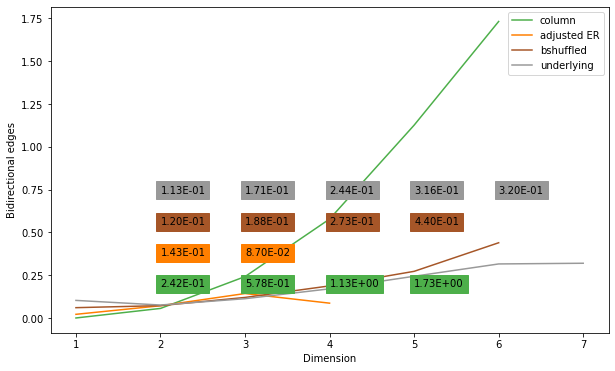

In [19]:
normalized_list = []
for x in [am, bm, cm, dm]:
    dictionary = {}
    for key in x.keys():
        dictionary[key] = x[key]/x[key][0][-1]
    normalized_list.append(dictionary)
plot_biedge_counts(normalized_list, 6, 2, ["column", "adjusted ER", "bshuffled", "underlying"], "mbcount_few_normalized")

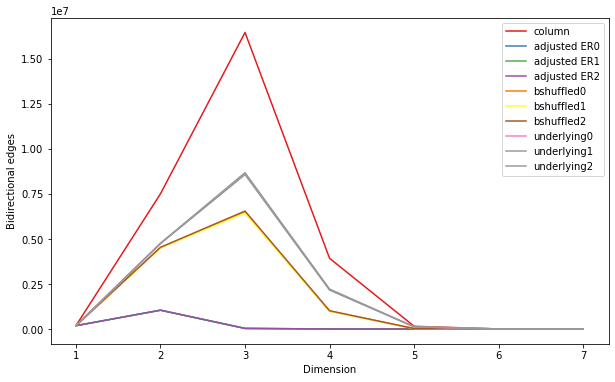

In [20]:
plot_biedge_counts([a,b0,b1,b2,c0,c1,c2,d0,d1,d2], 6, 7, 
                    ["column", "adjusted ER0", "adjusted ER1", "adjusted ER2",
                     "bshuffled0", "bshuffled1", "bshuffled2",
                     "underlying0", "underlying1", "underlying2"], "bcount_all")

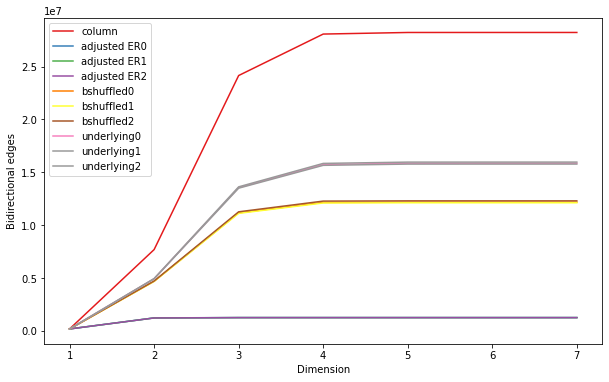

In [21]:
plot_biedge_cumulative([a,b0,b1,b2,c0,c1,c2,d0,d1,d2], 6, 7, 
                    ["column", "adjusted ER0", "adjusted ER1", "adjusted ER2",
                     "bshuffled0", "bshuffled1", "bshuffled2",
                     "underlying0", "underlying1", "underlying2"], "bcumul_all")

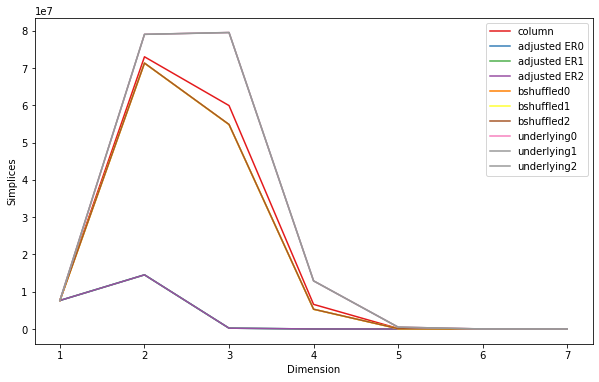

In [22]:
plot_simplex_counts([a,b0,b1,b2,c0,c1,c2,d0,d1,d2], 6, 7, 
                    ["column", "adjusted ER0", "adjusted ER1", "adjusted ER2",
                     "bshuffled0", "bshuffled1", "bshuffled2",
                     "underlying0", "underlying1", "underlying2"], "simplex_count")

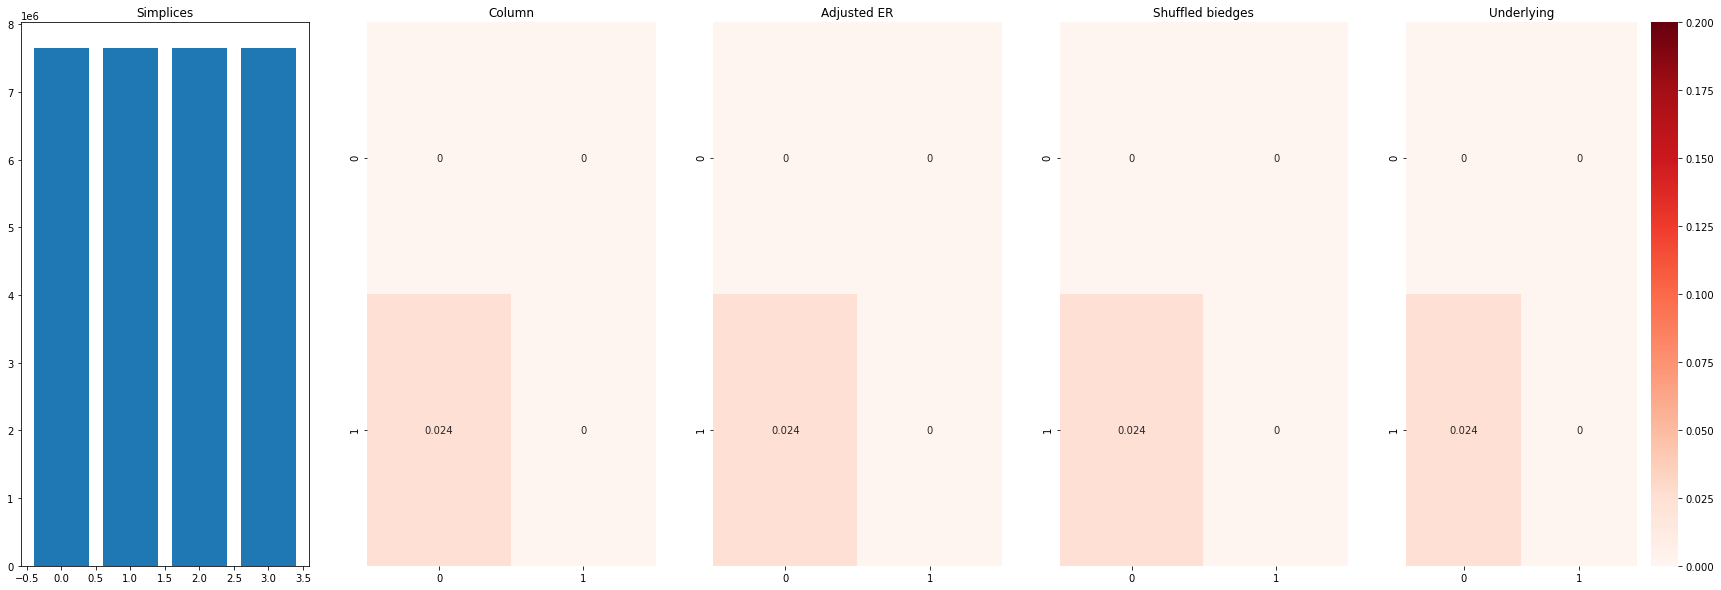

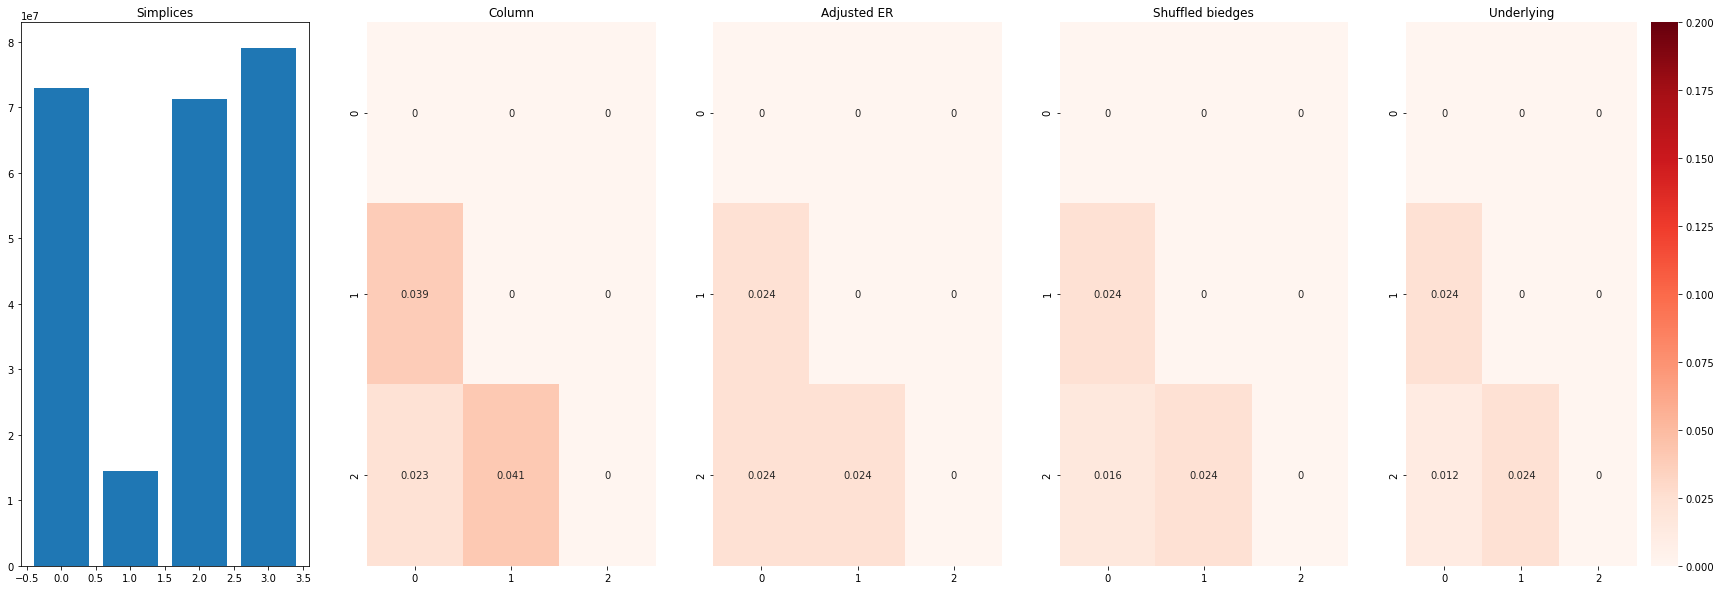

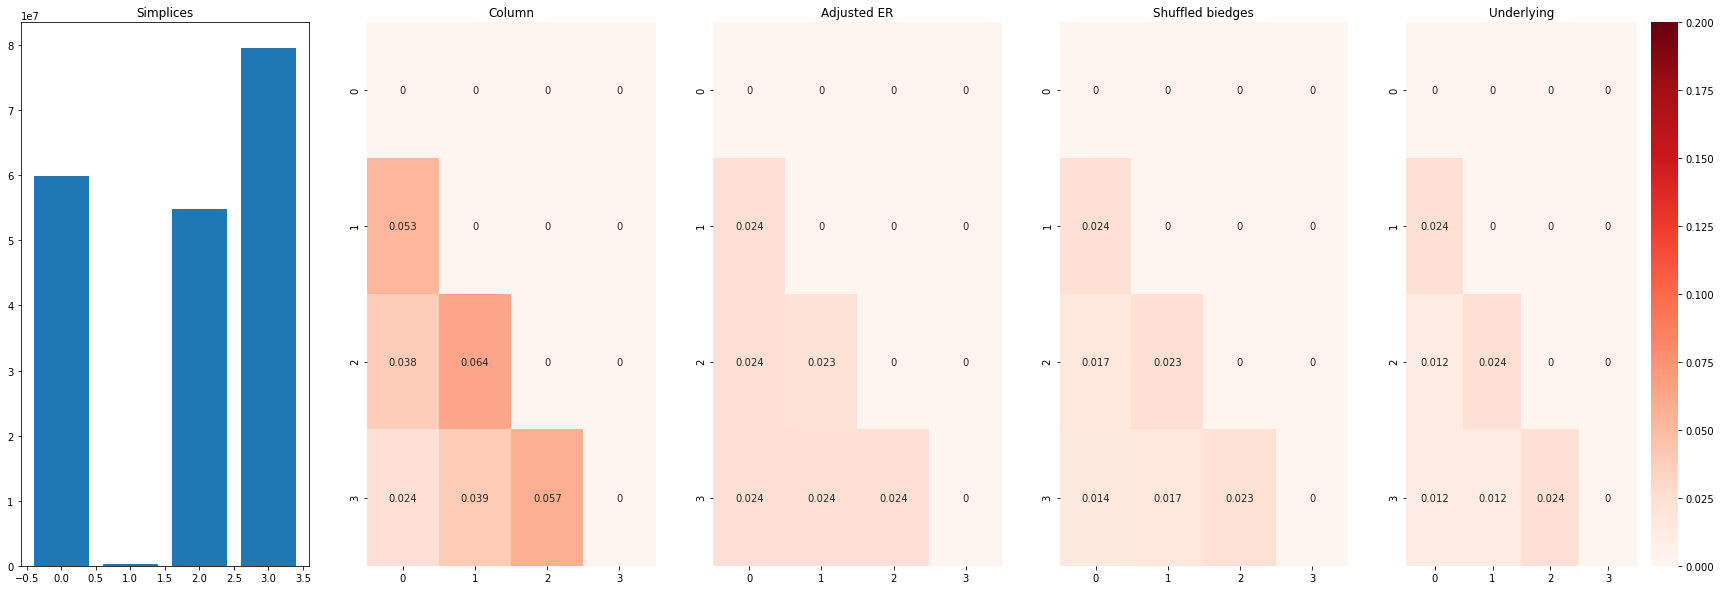

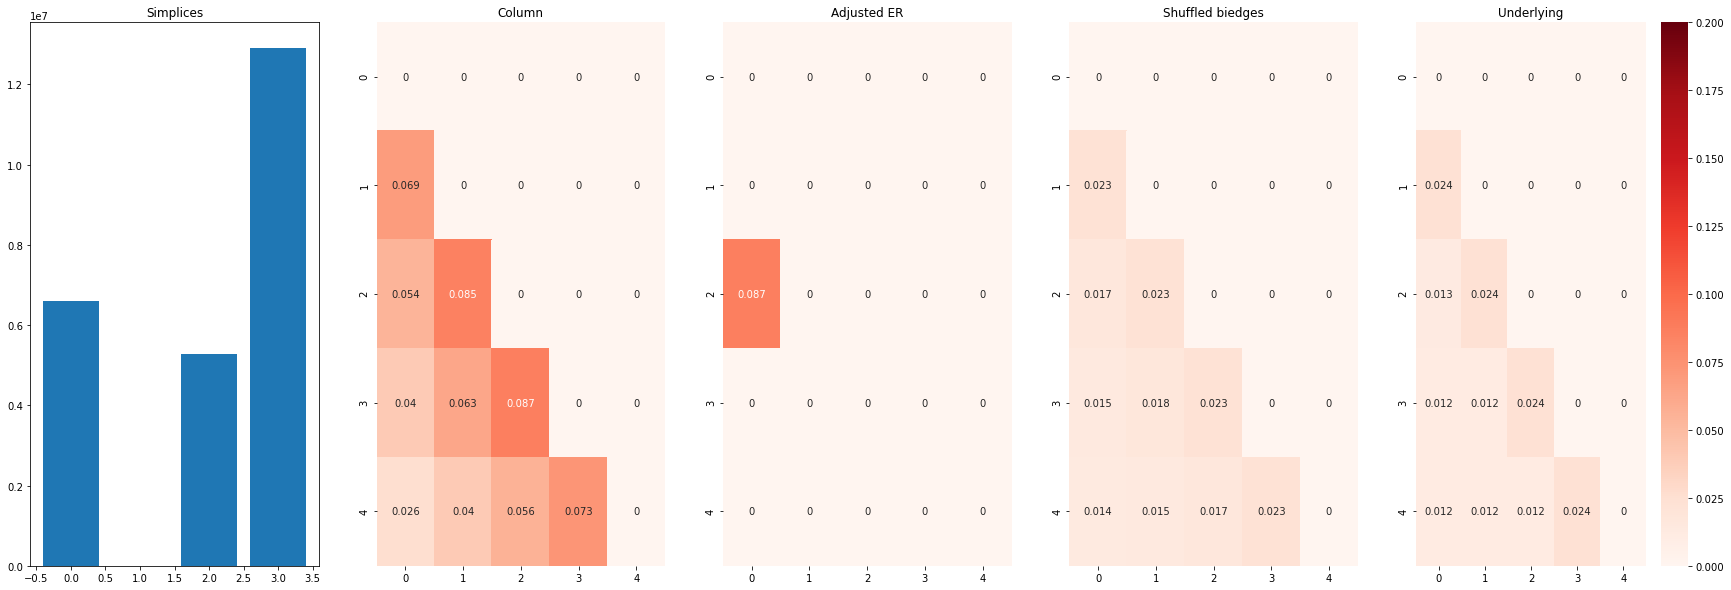

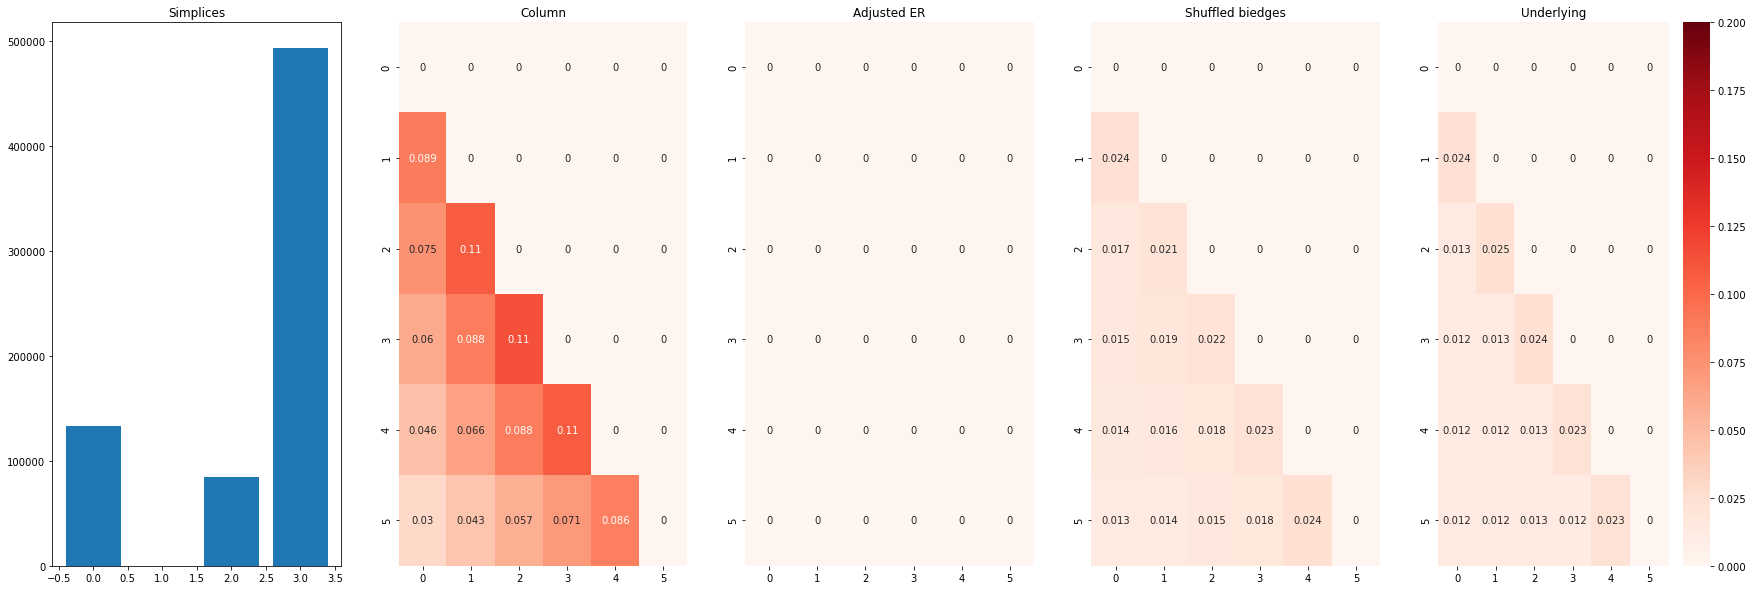

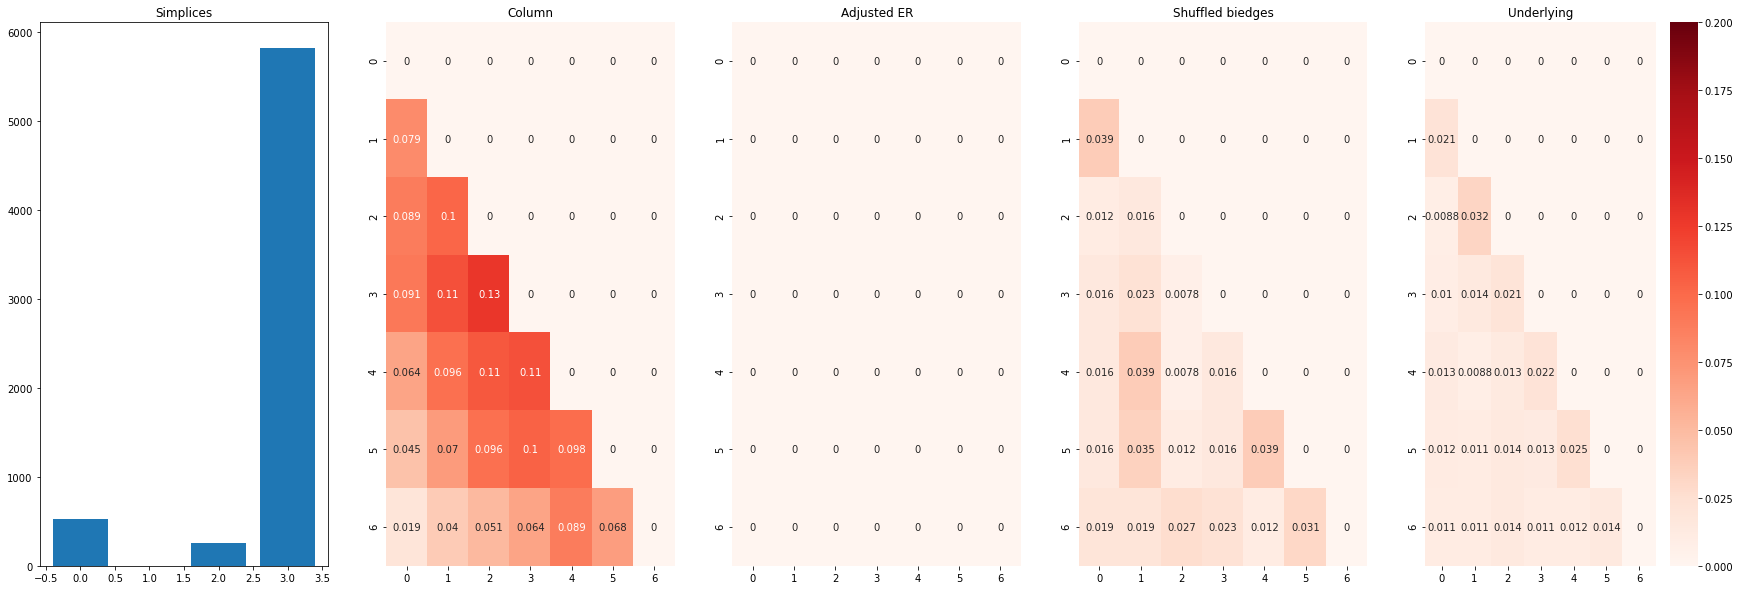

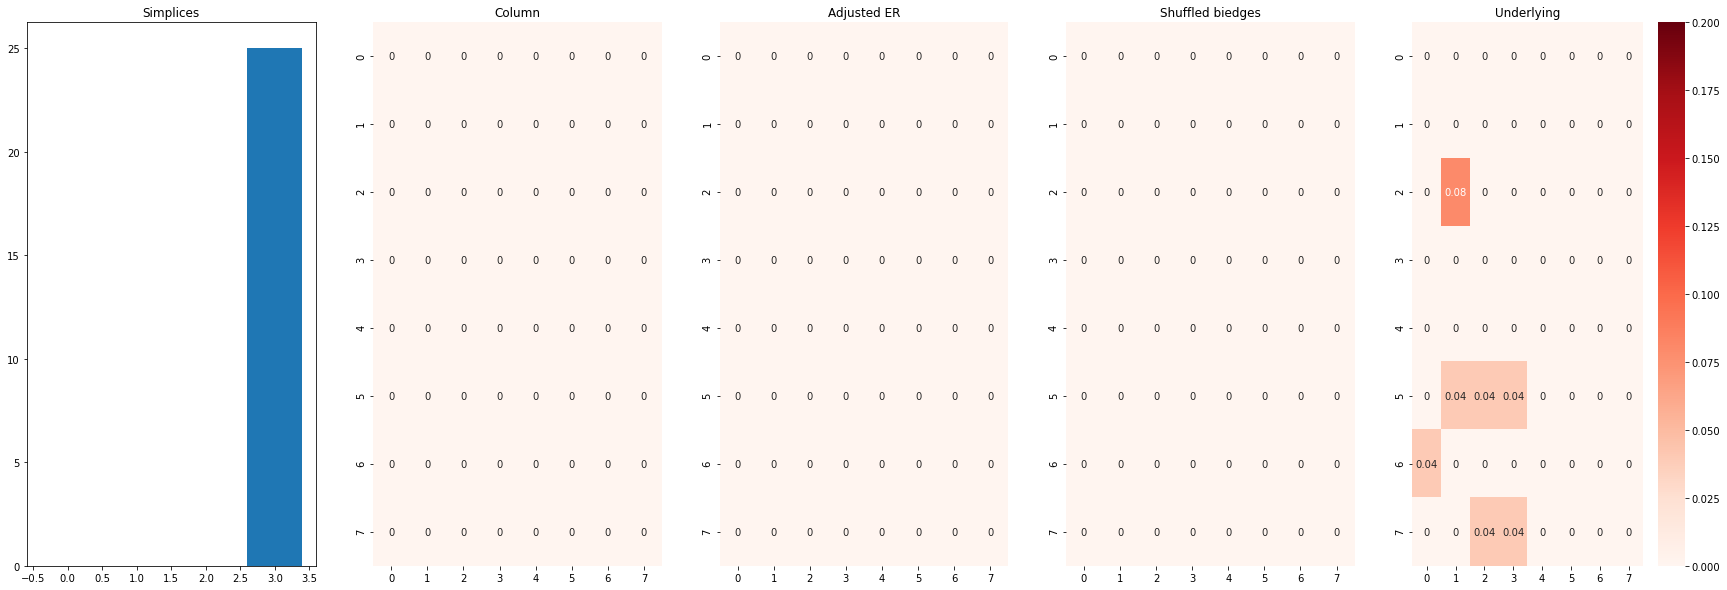

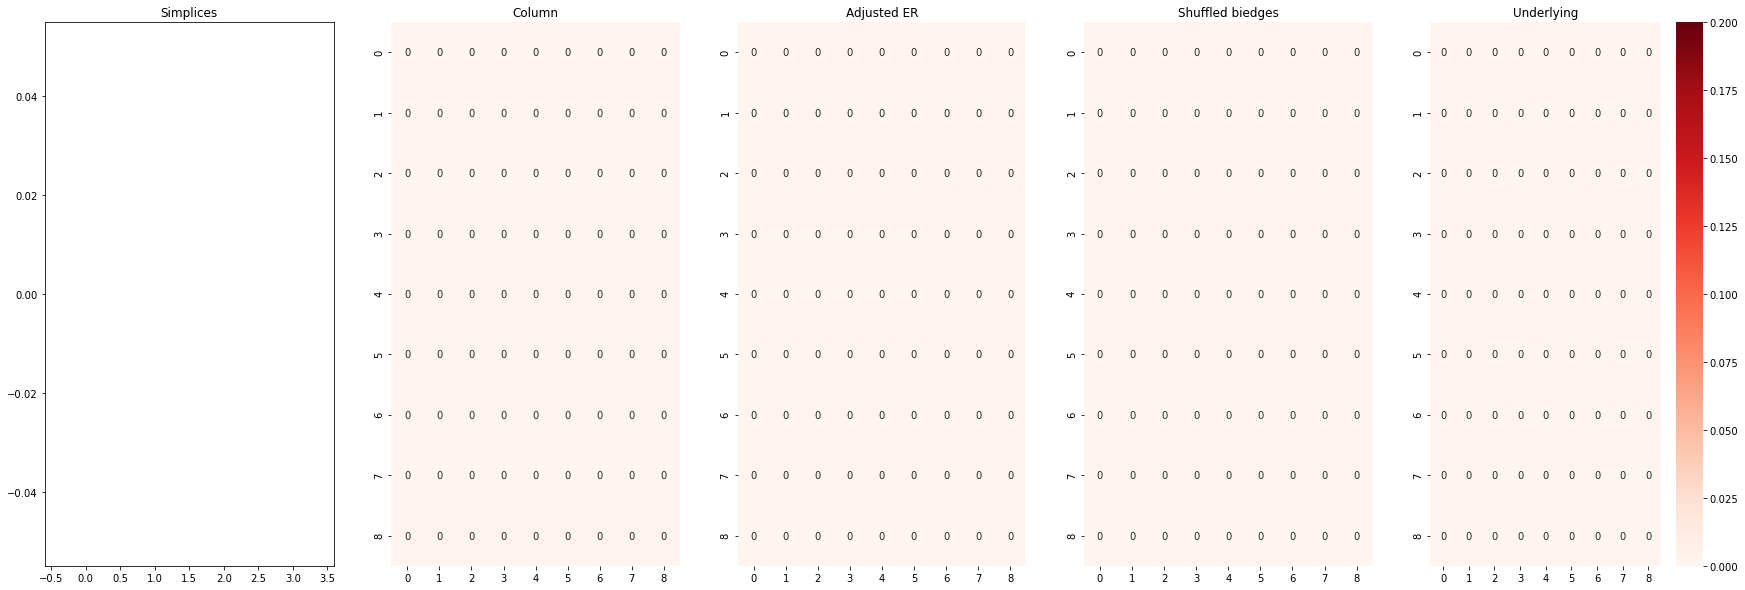

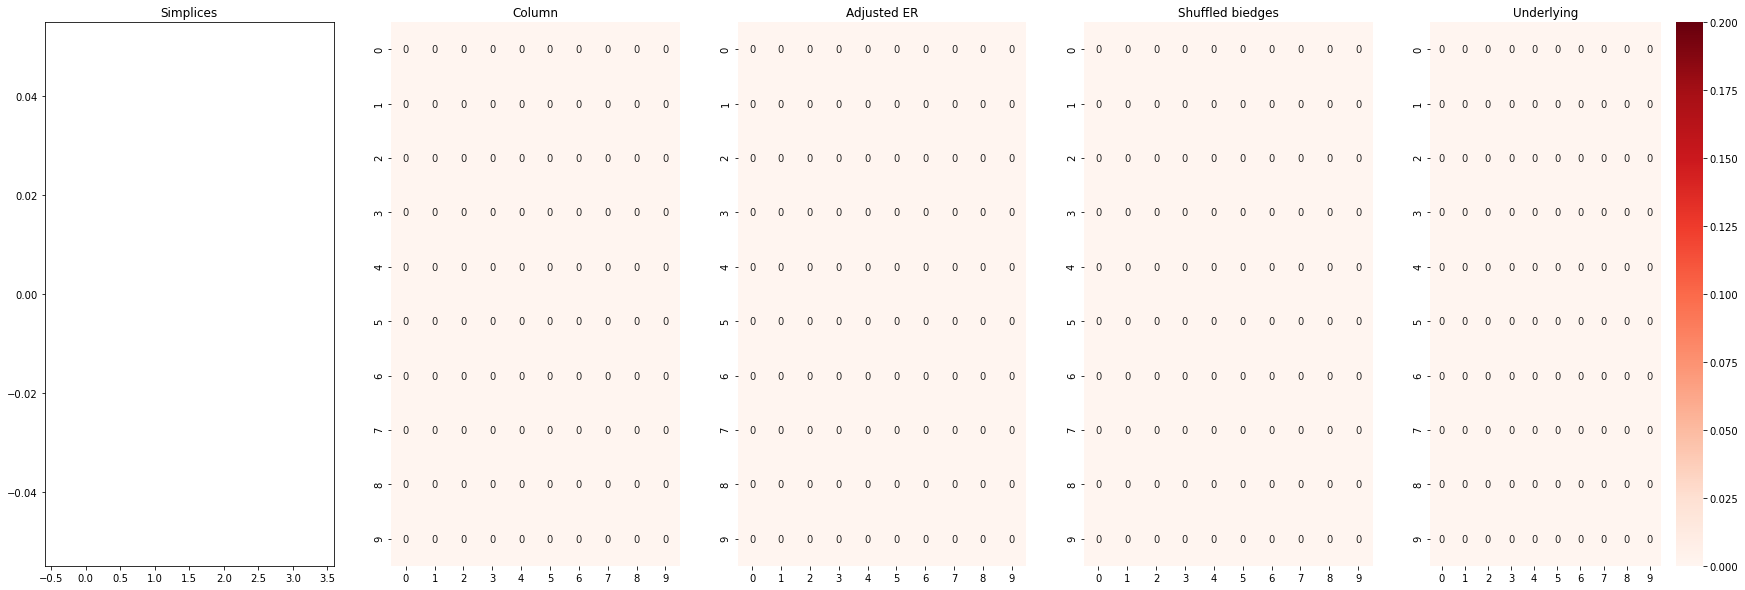

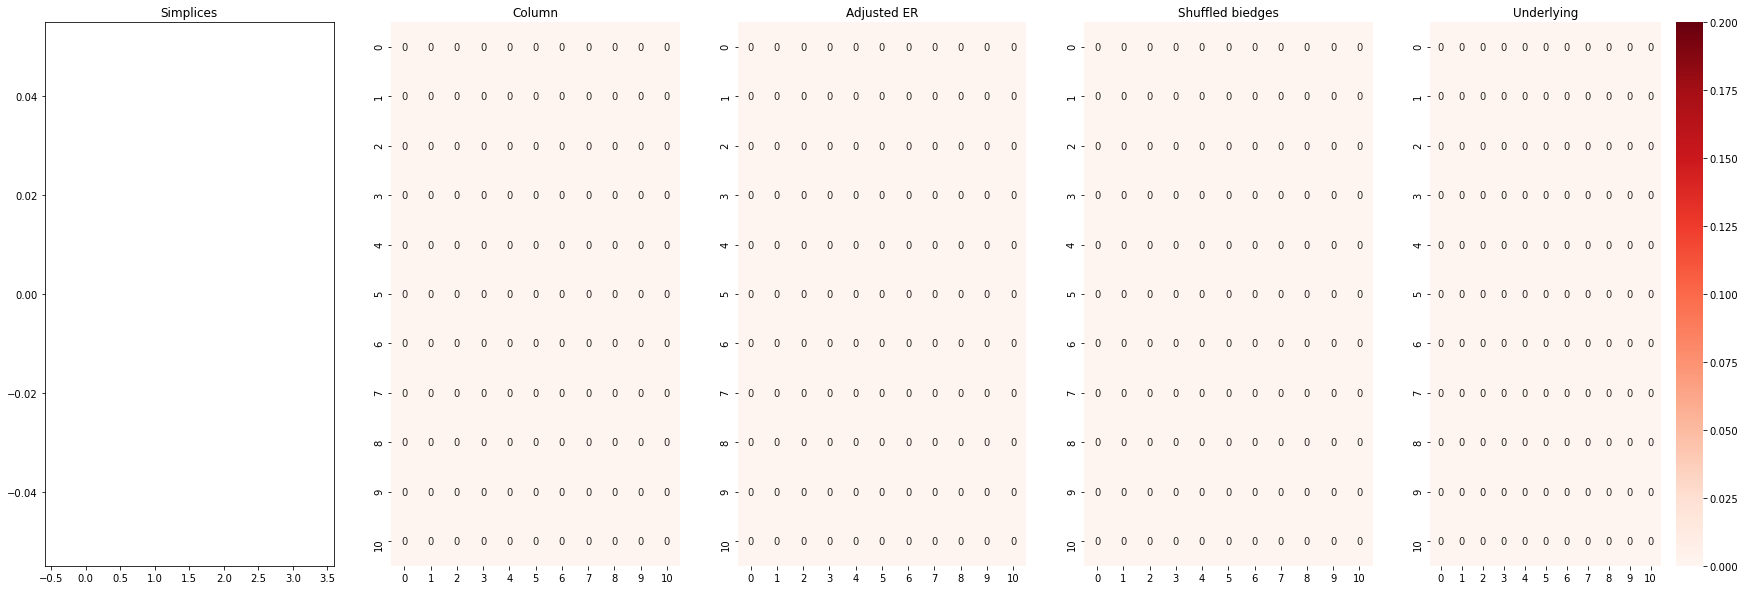

In [23]:
compare_graphs_normalized([a,b0,c0,d0], 1, "bcounts_norm")

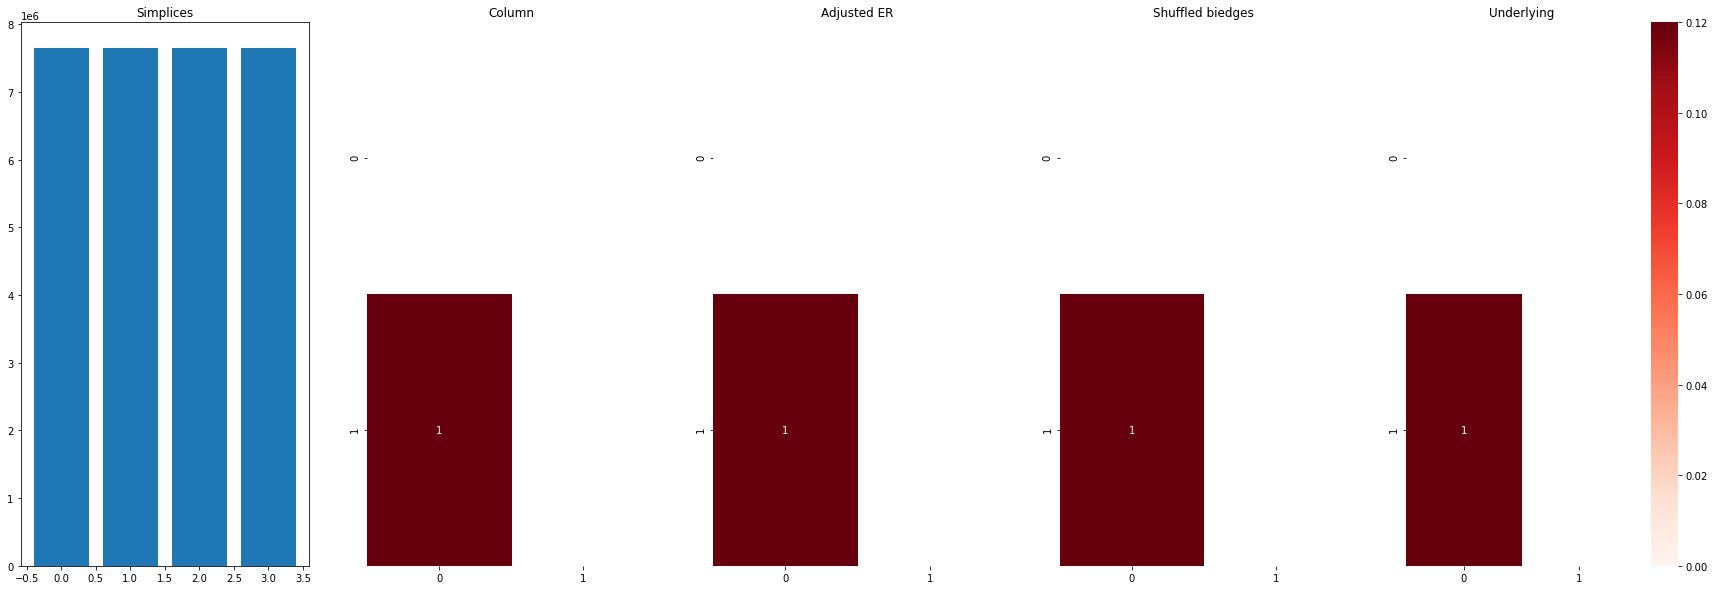

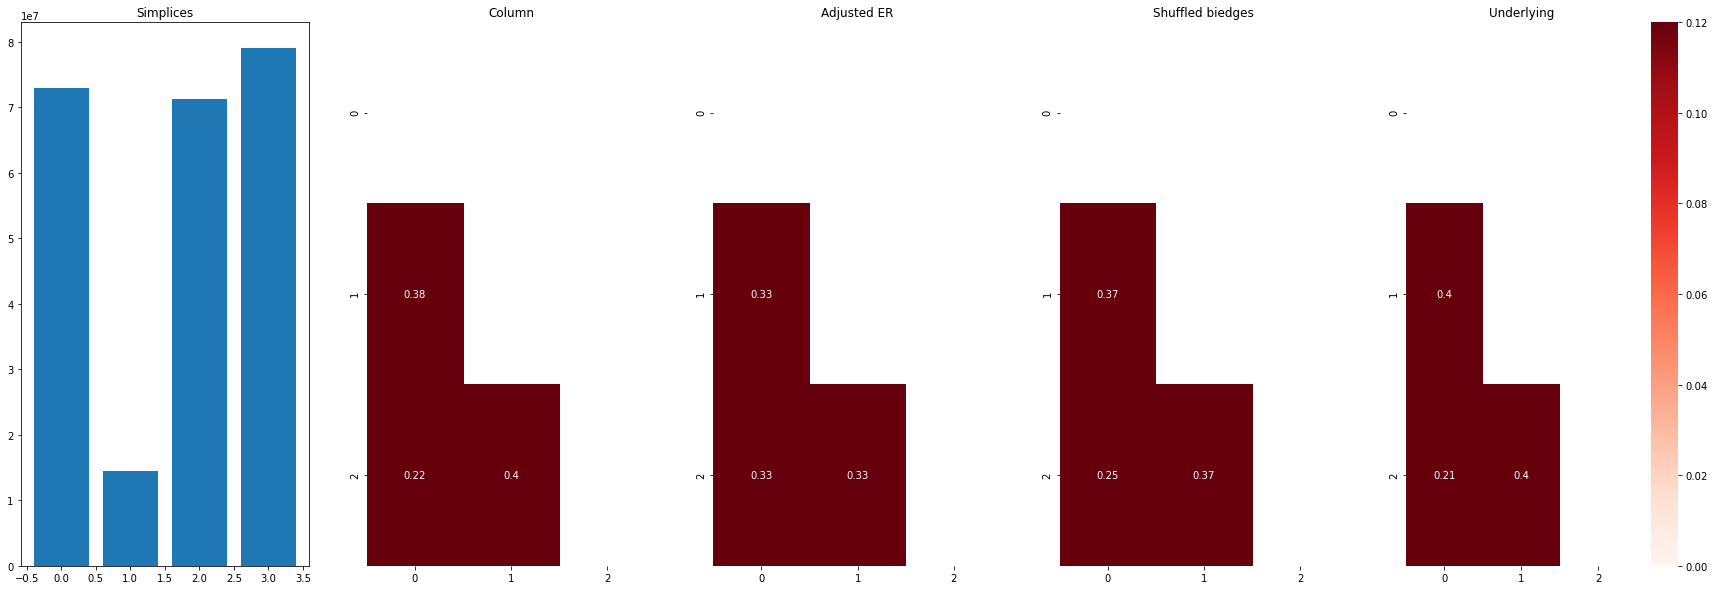

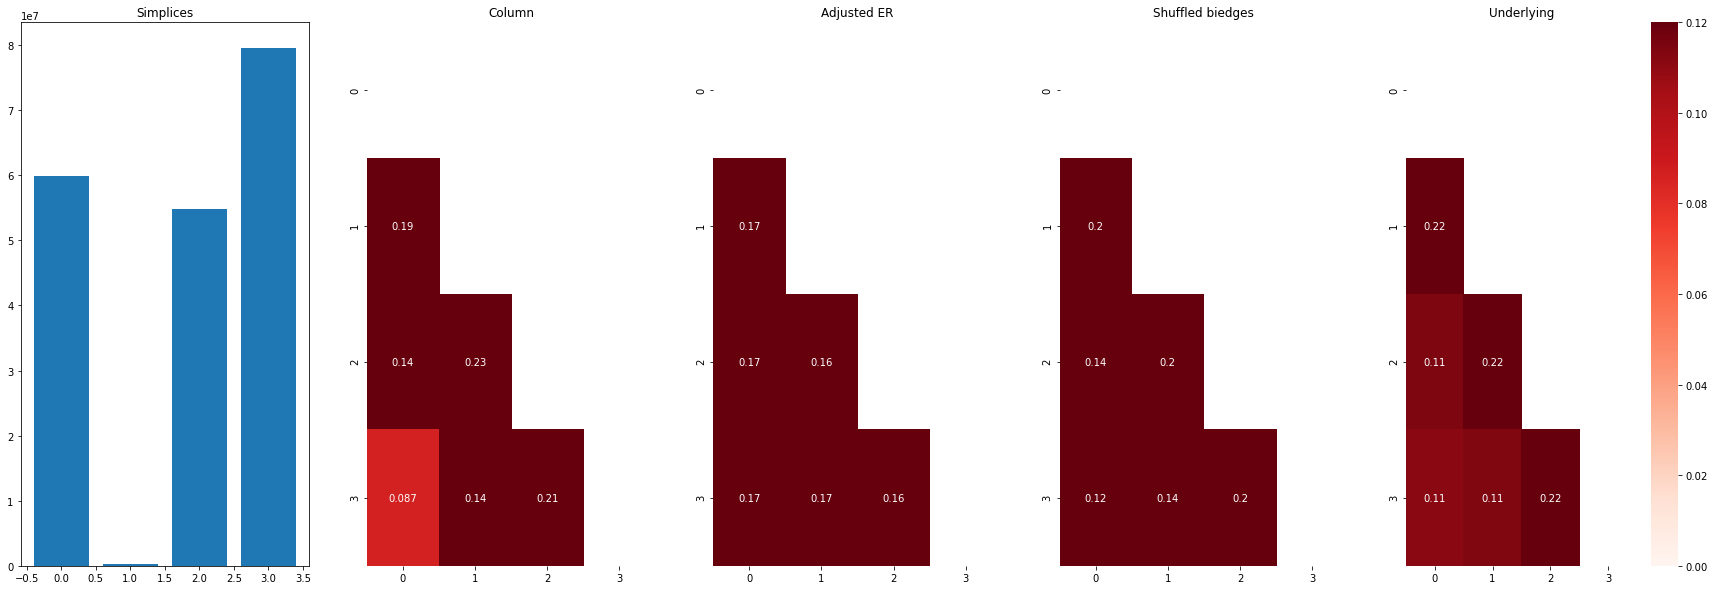

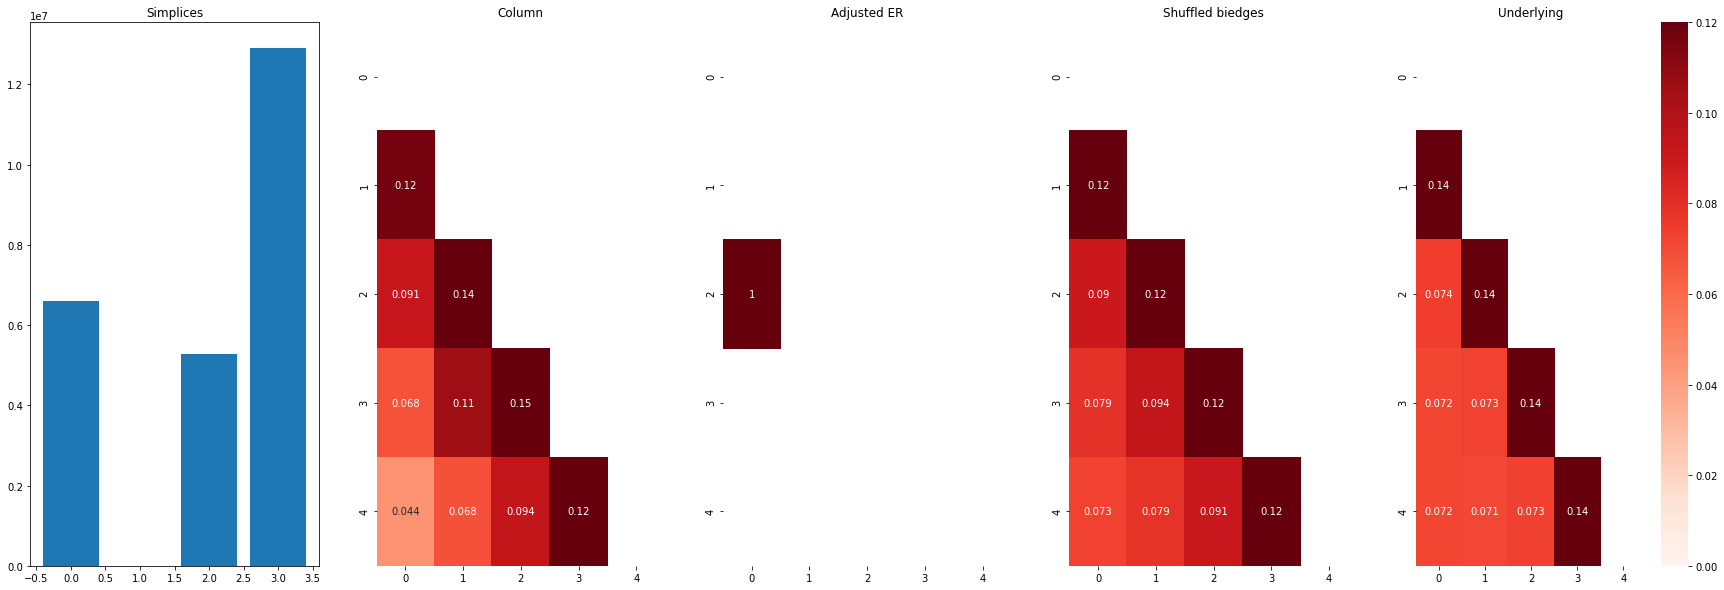

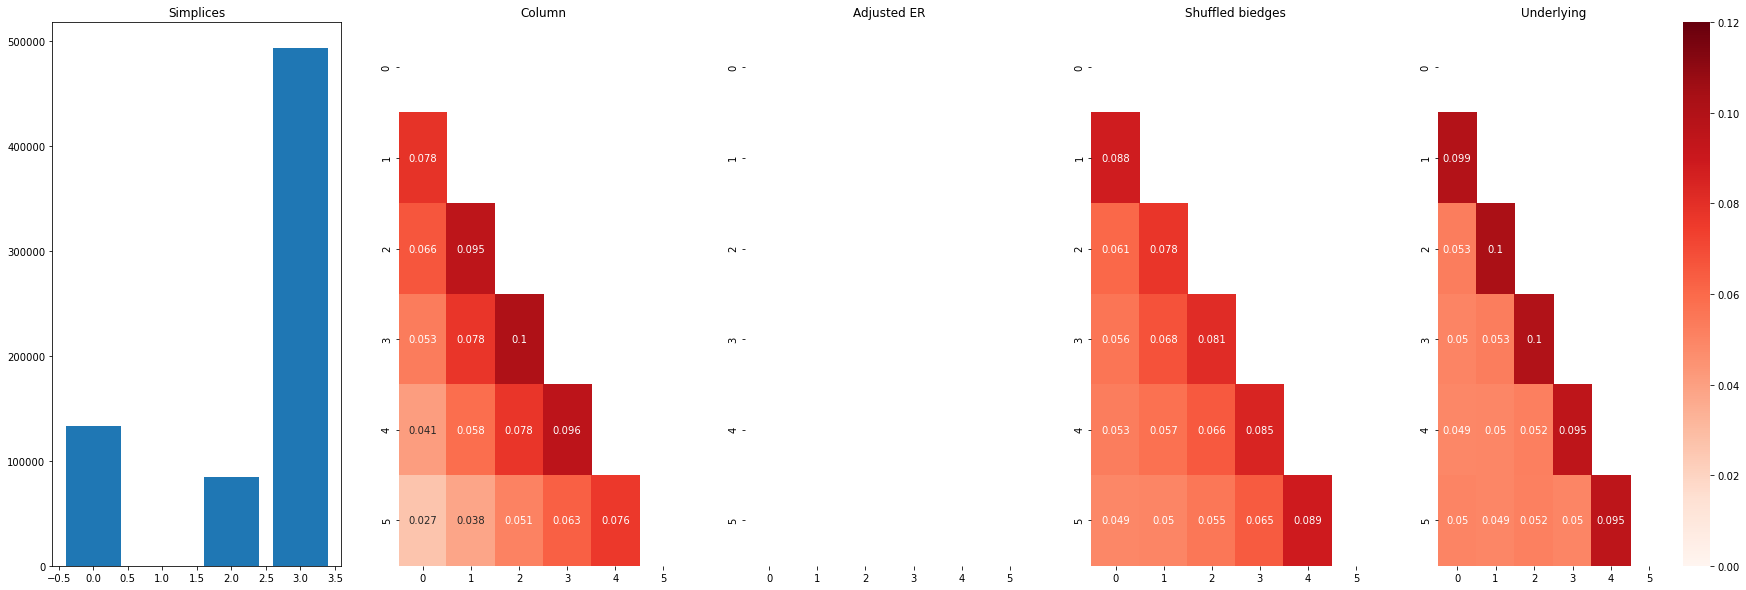

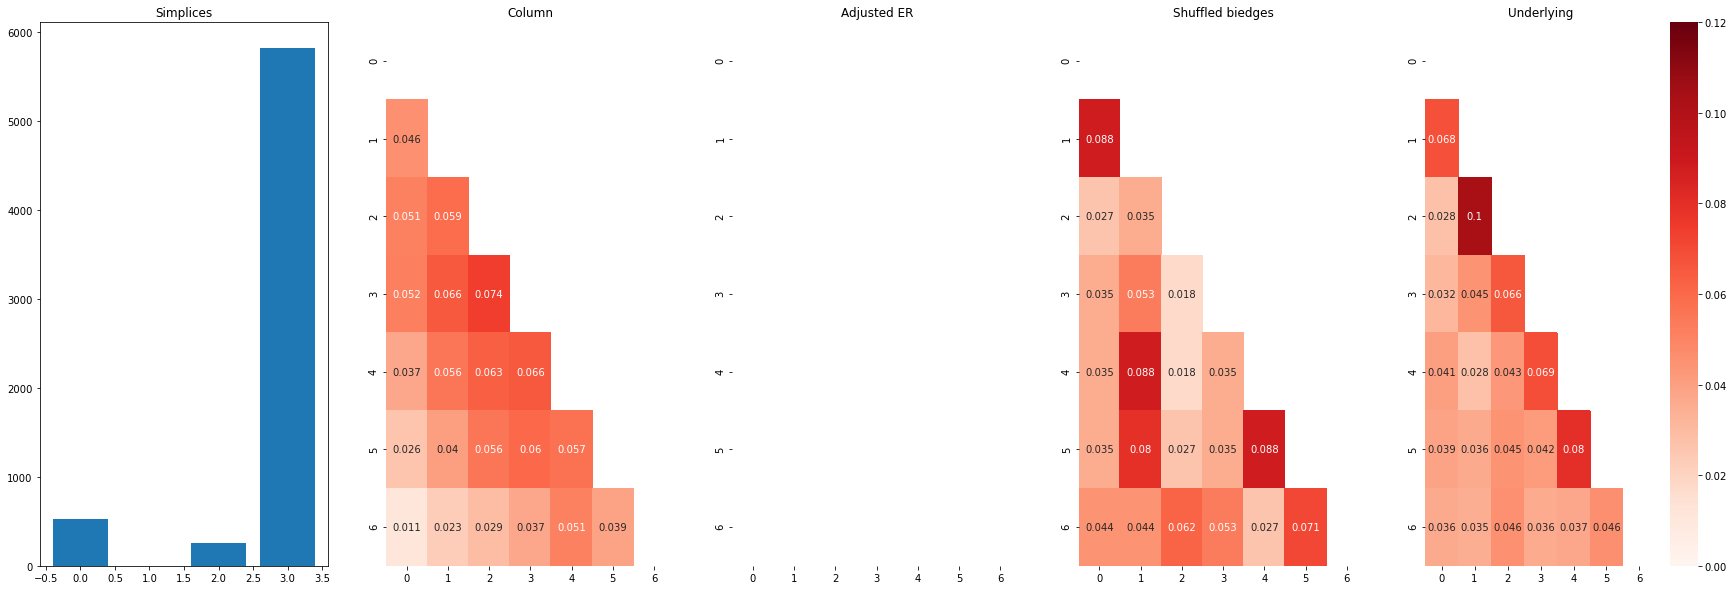

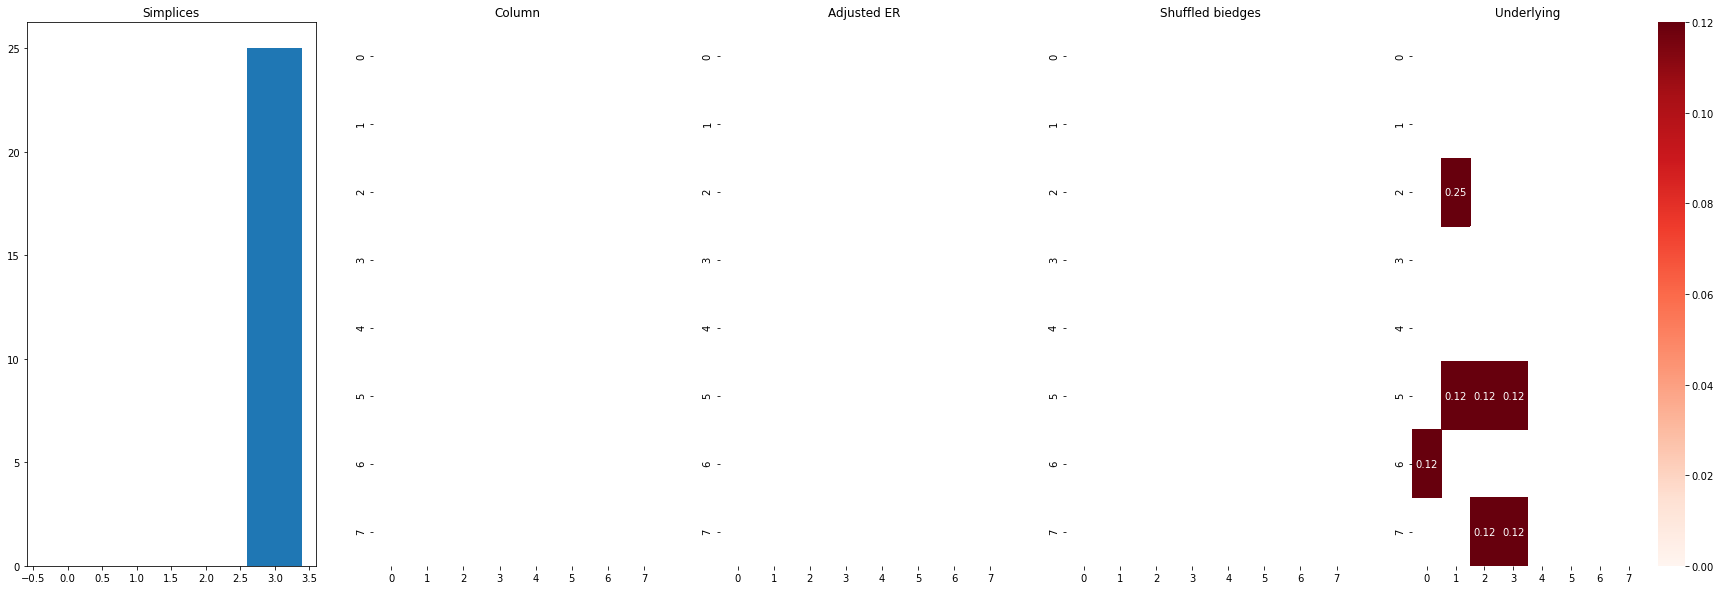

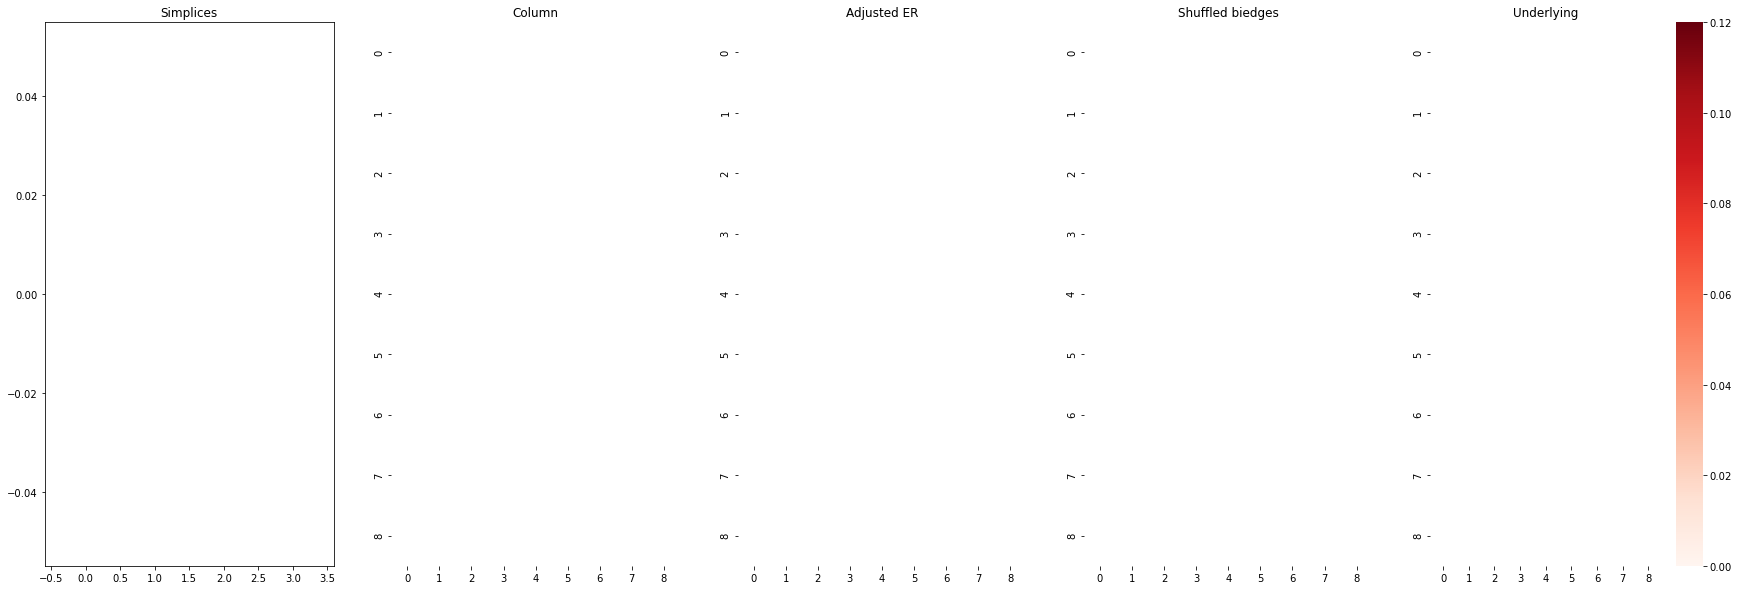

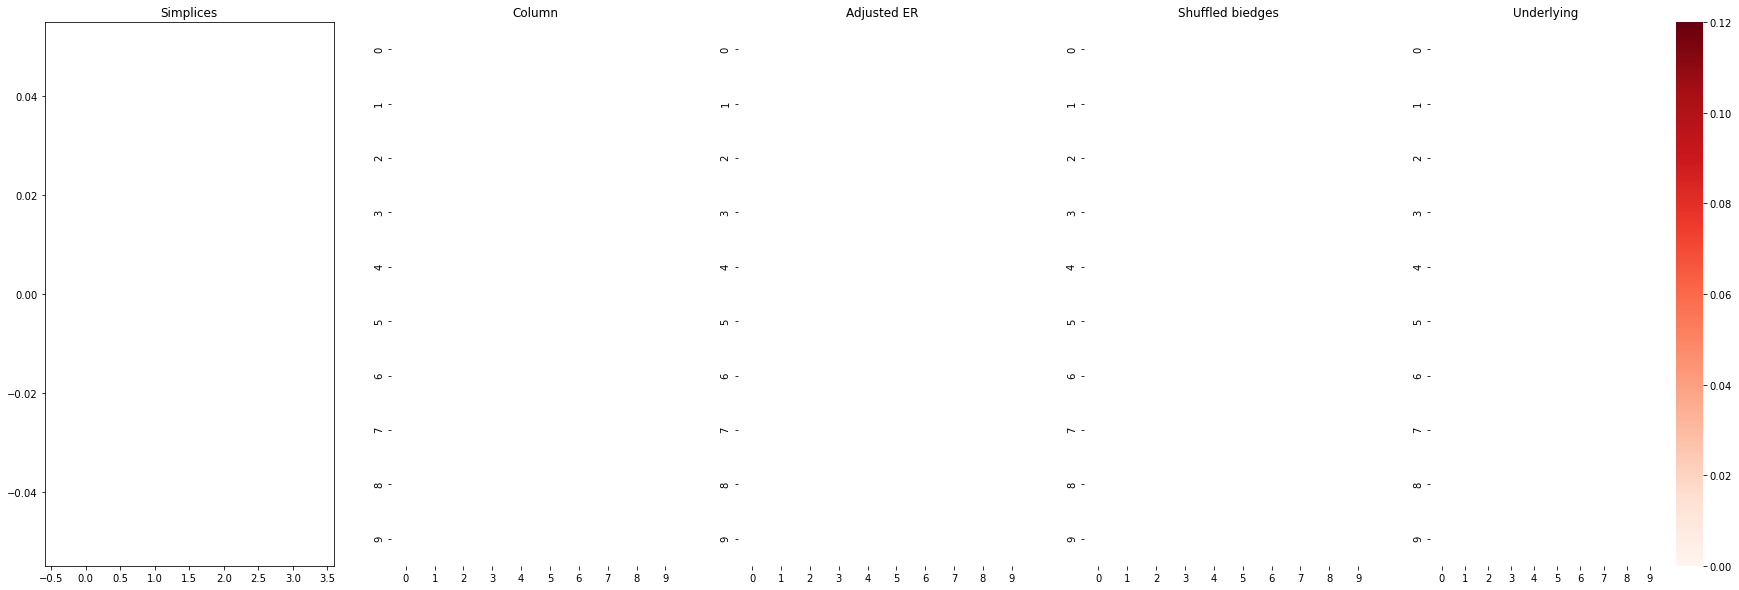

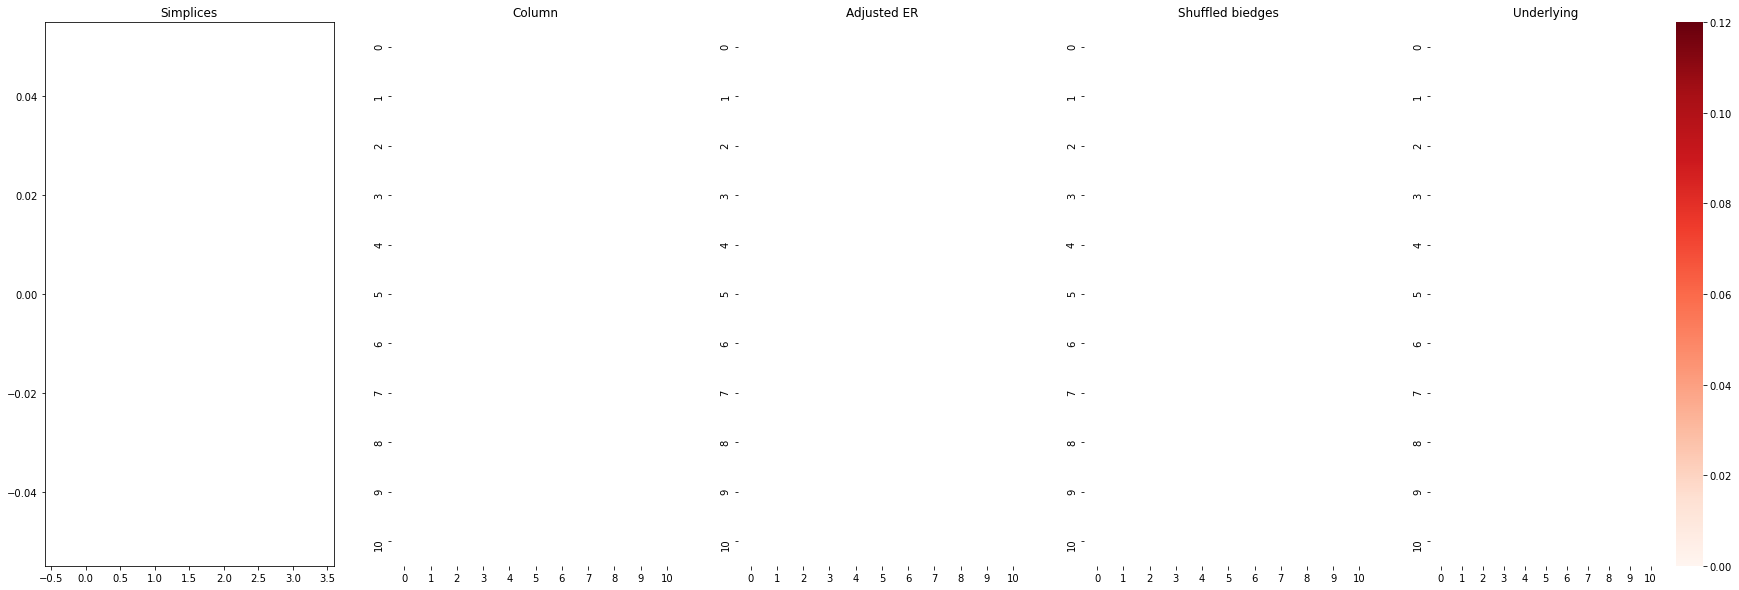

In [24]:
compare_graphs_percent([a,b0,c0,d0], 1, "bcounts_percent")

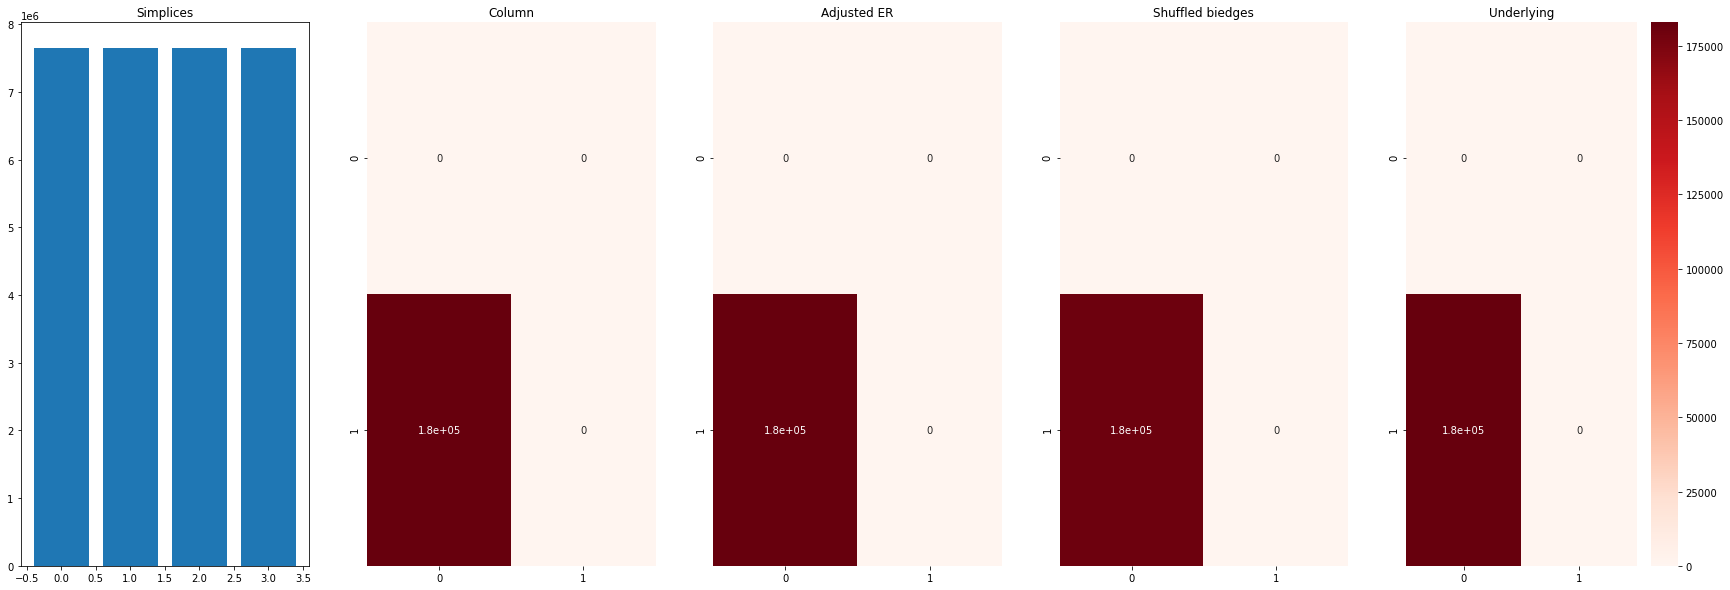

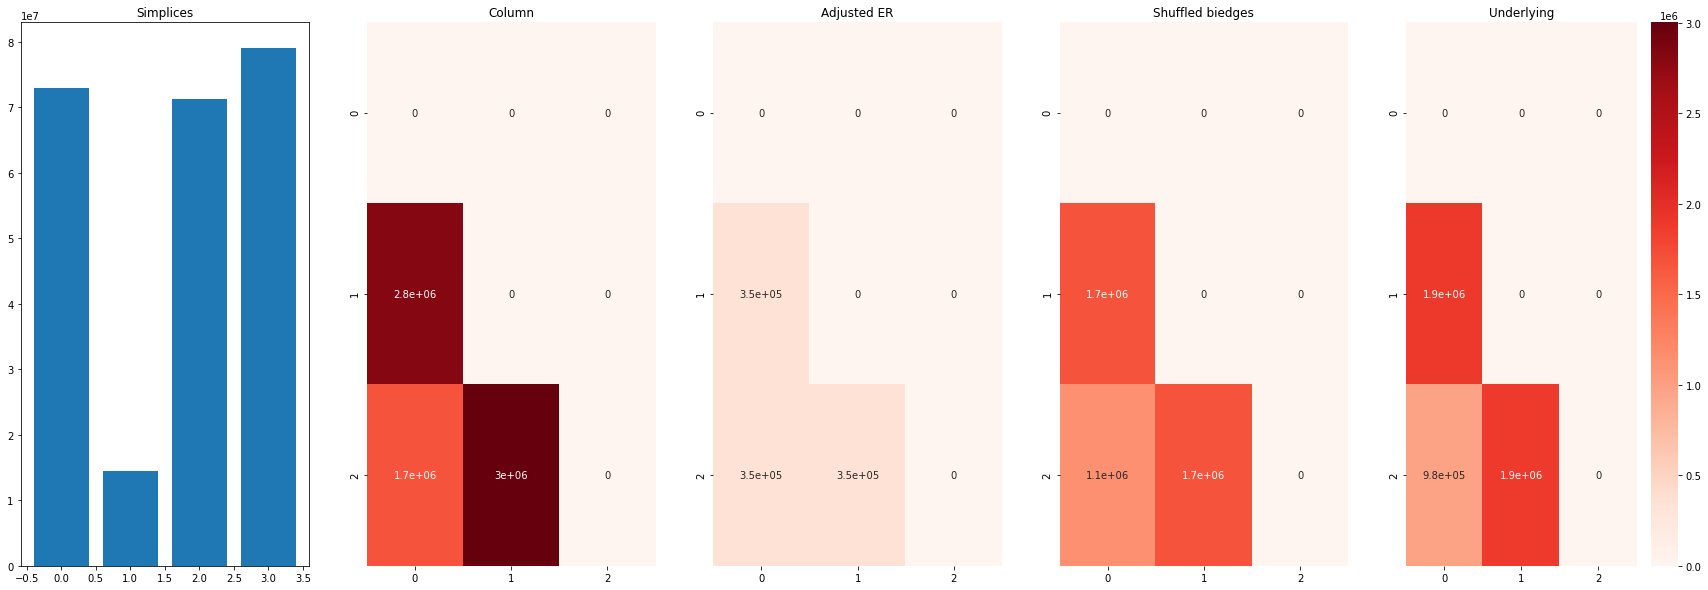

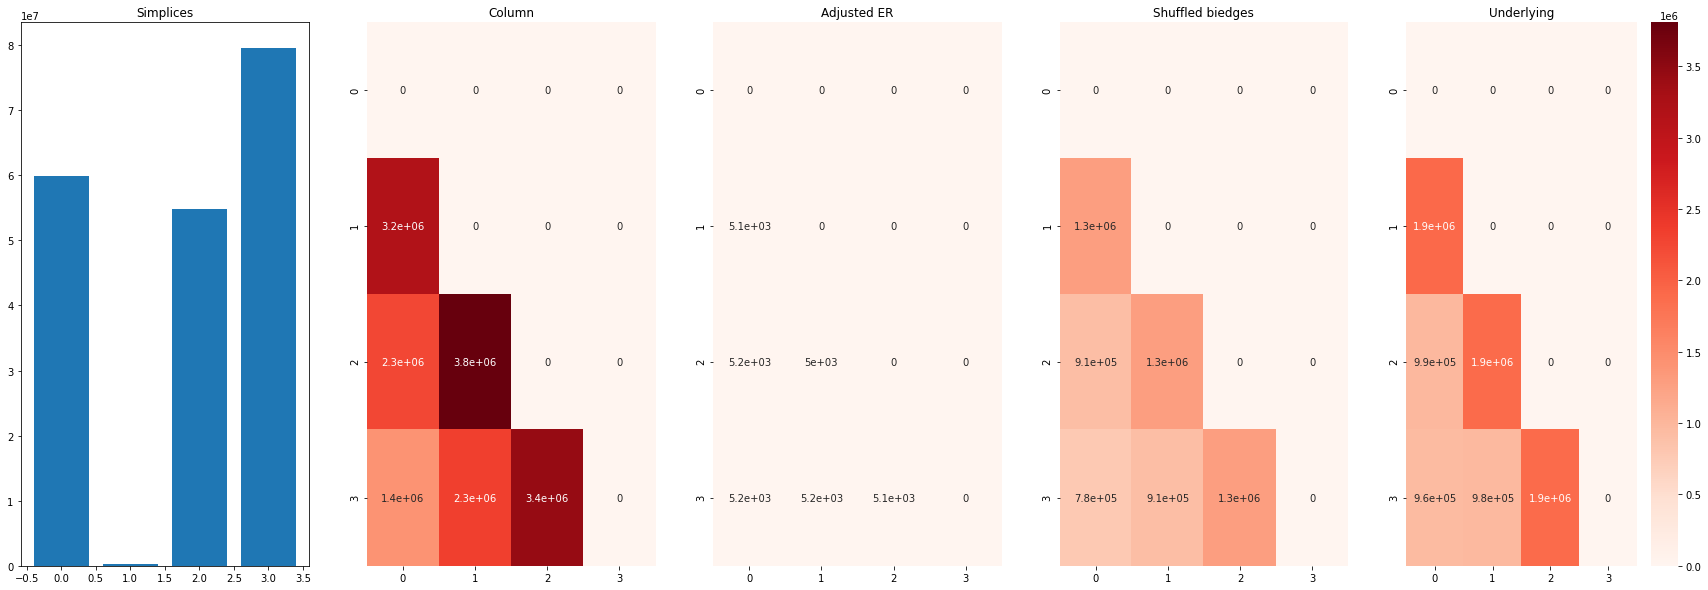

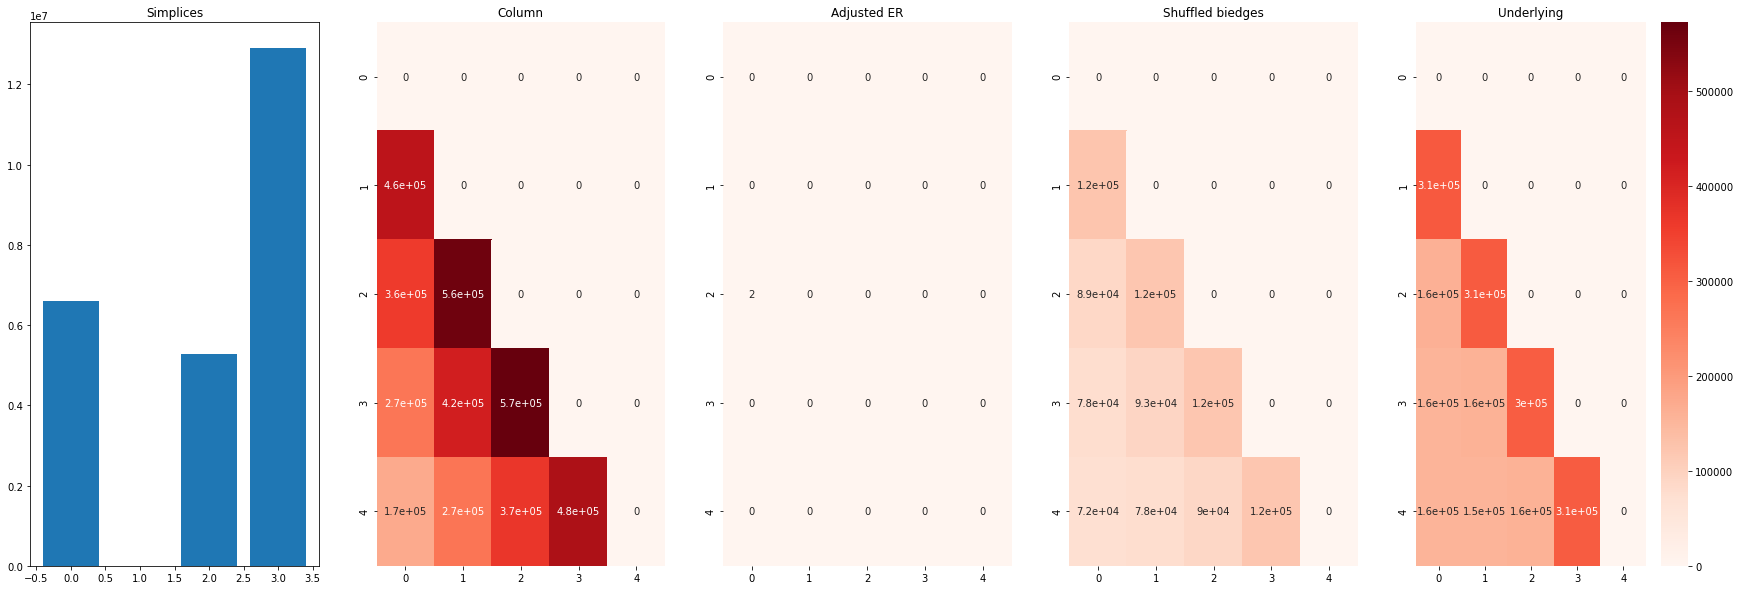

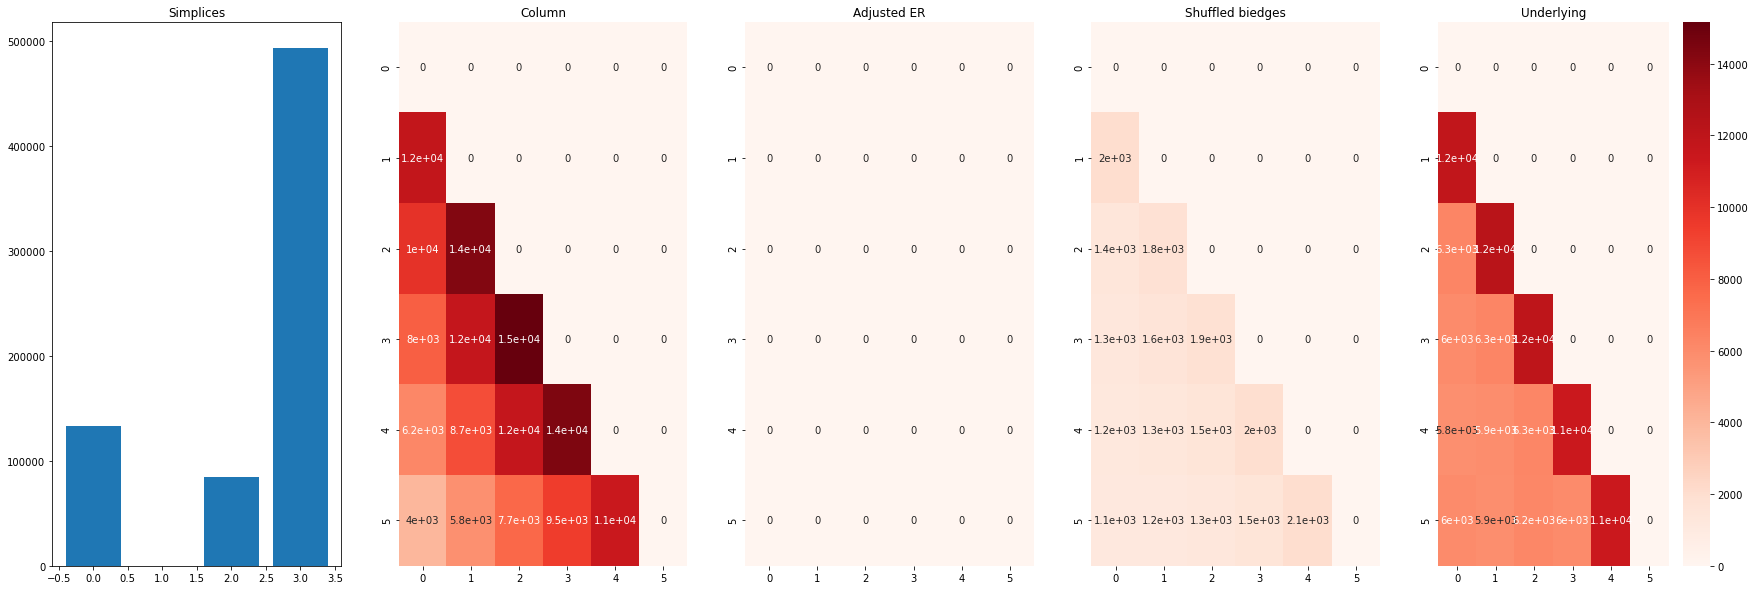

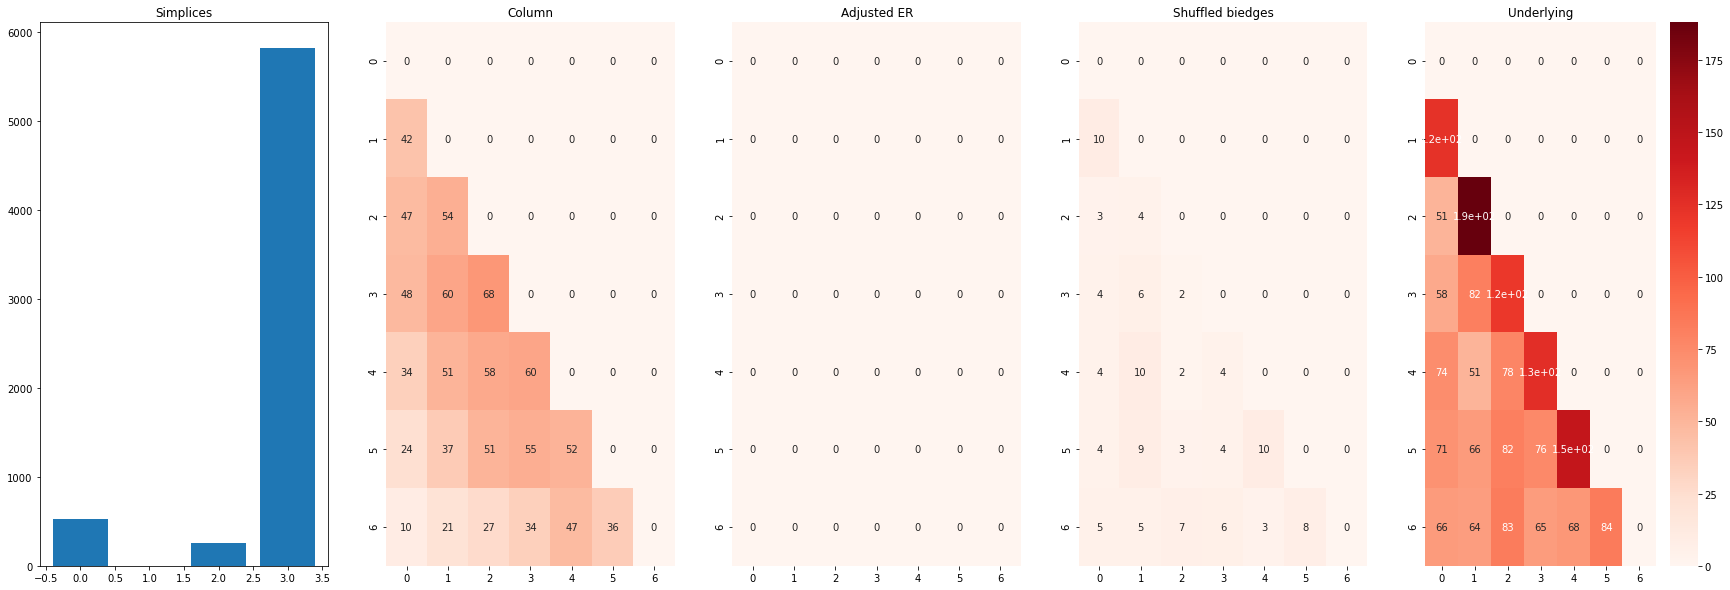

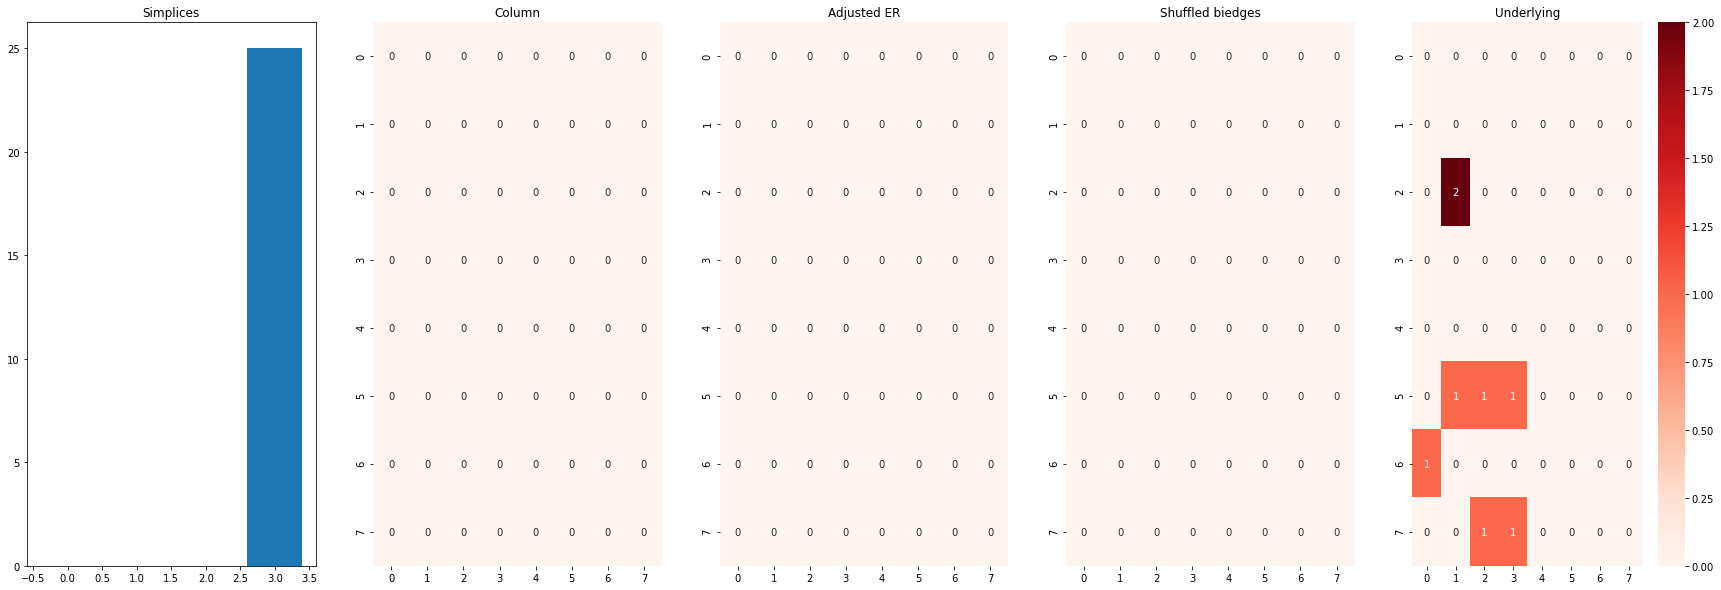

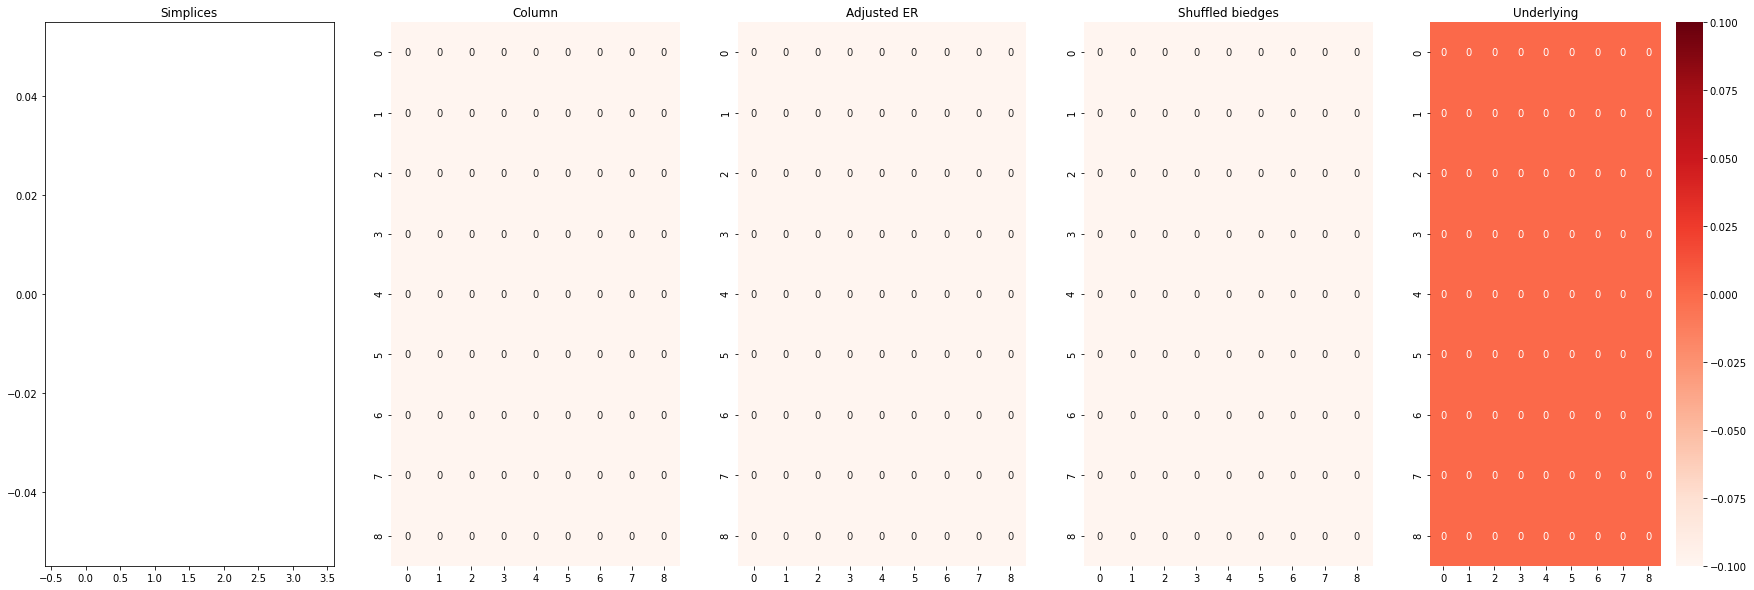

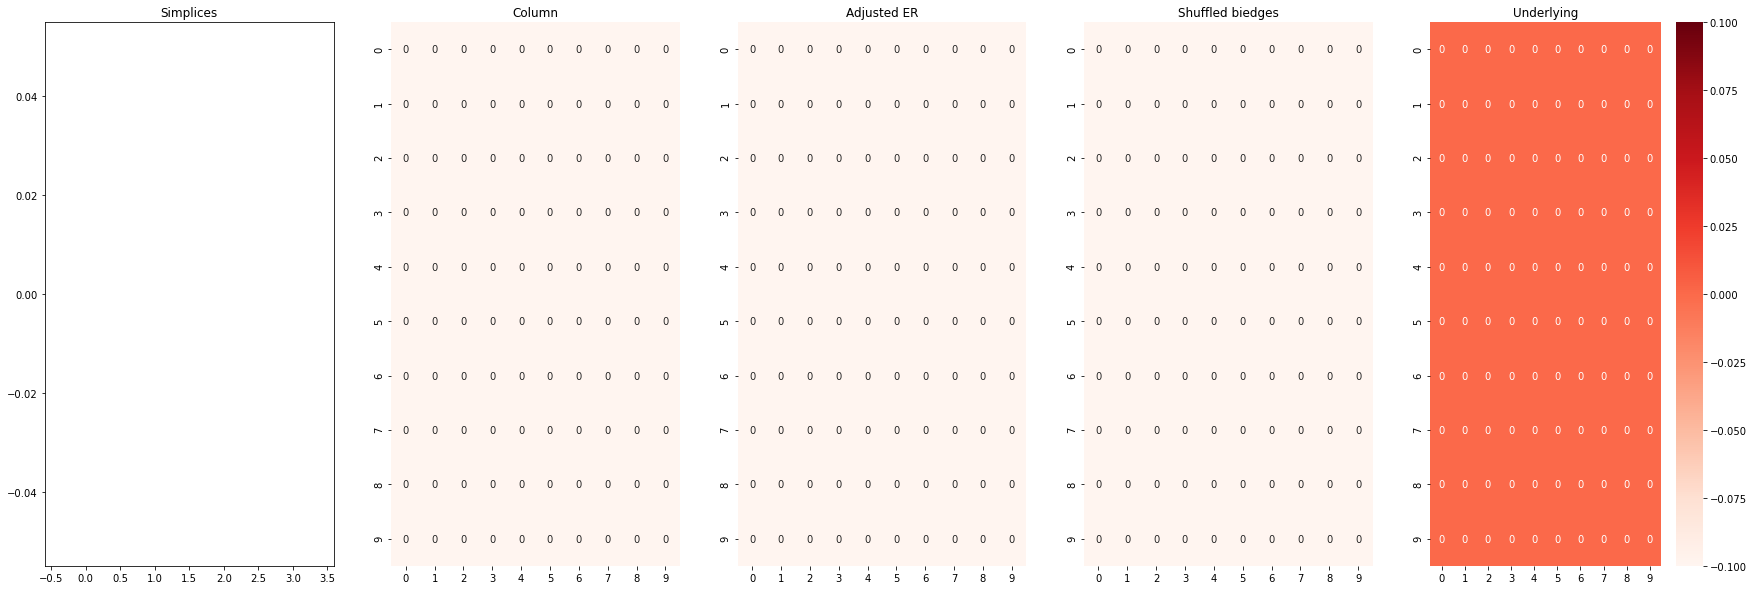

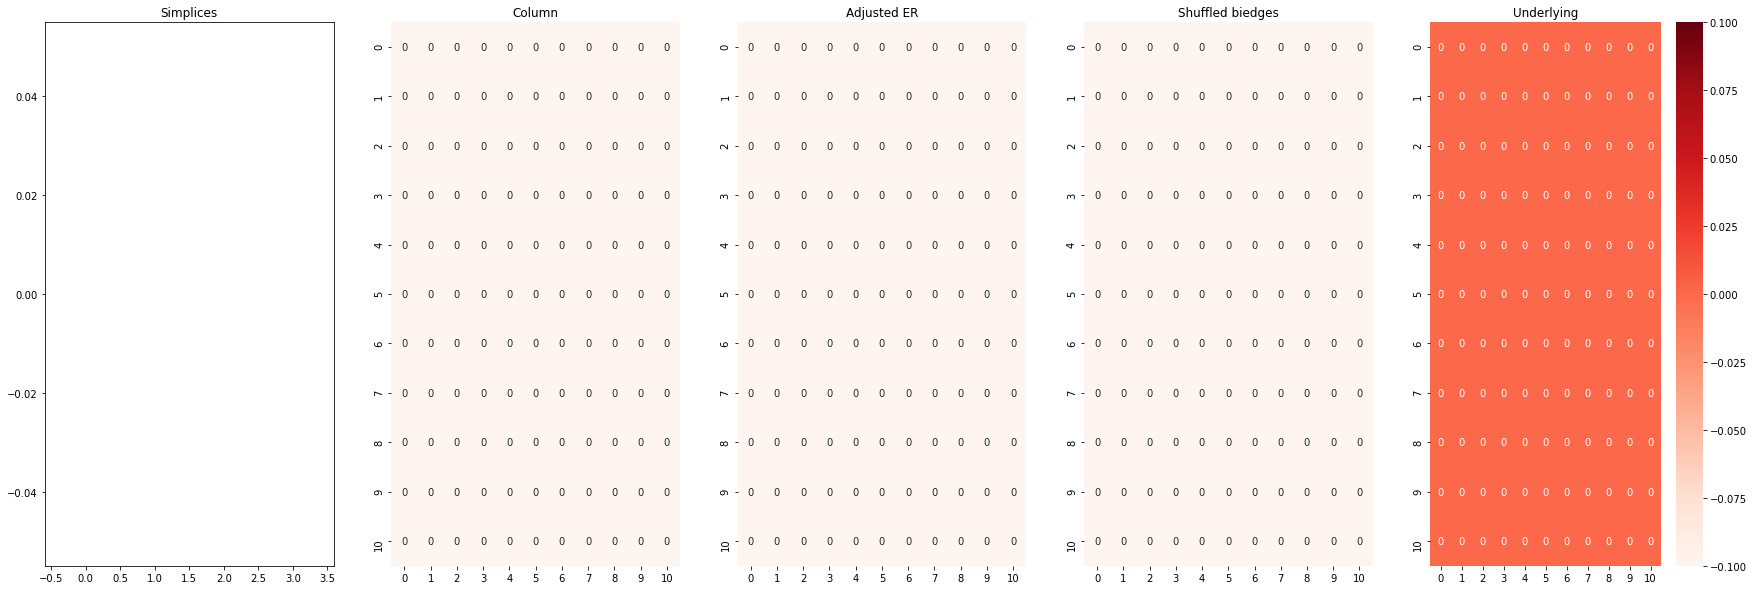

In [25]:
compare_graphs([a,b0,c0,d0], 1, "bcounts_dim")

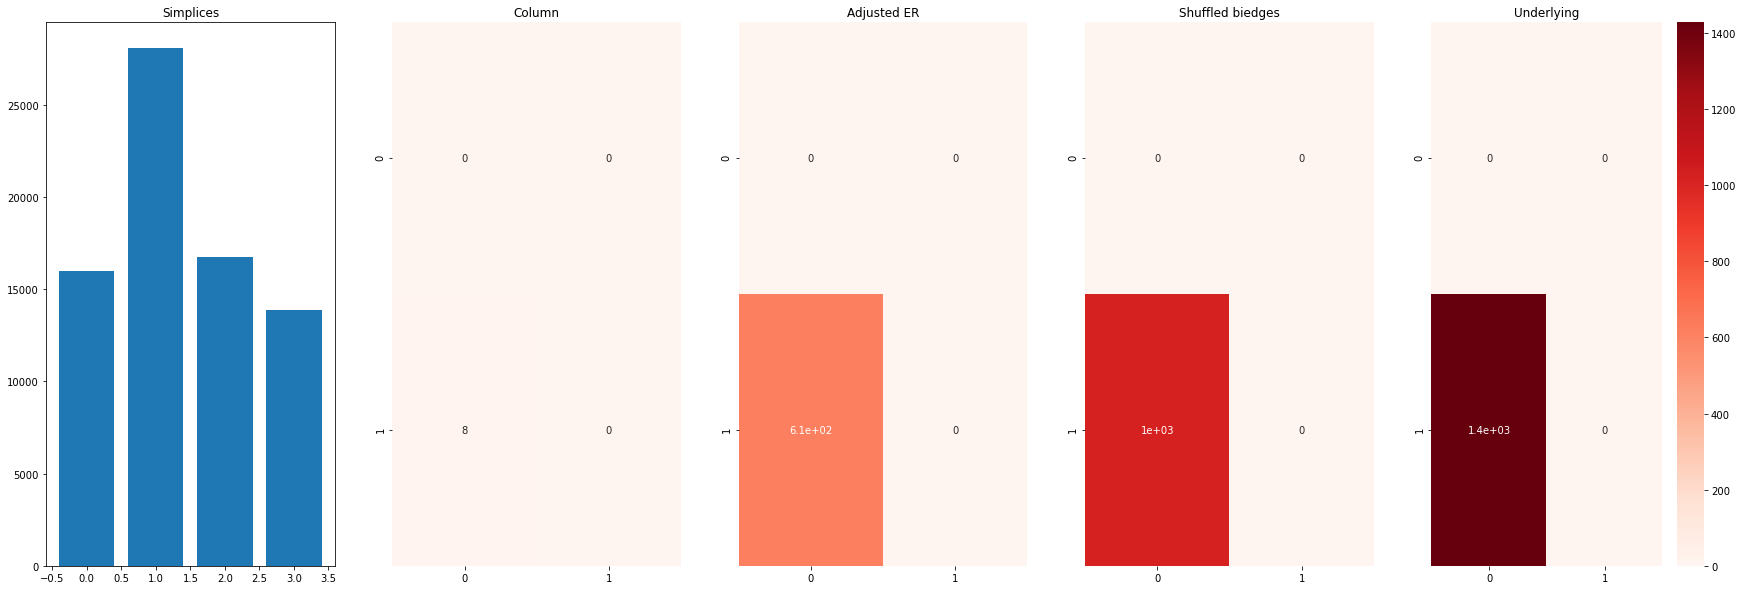

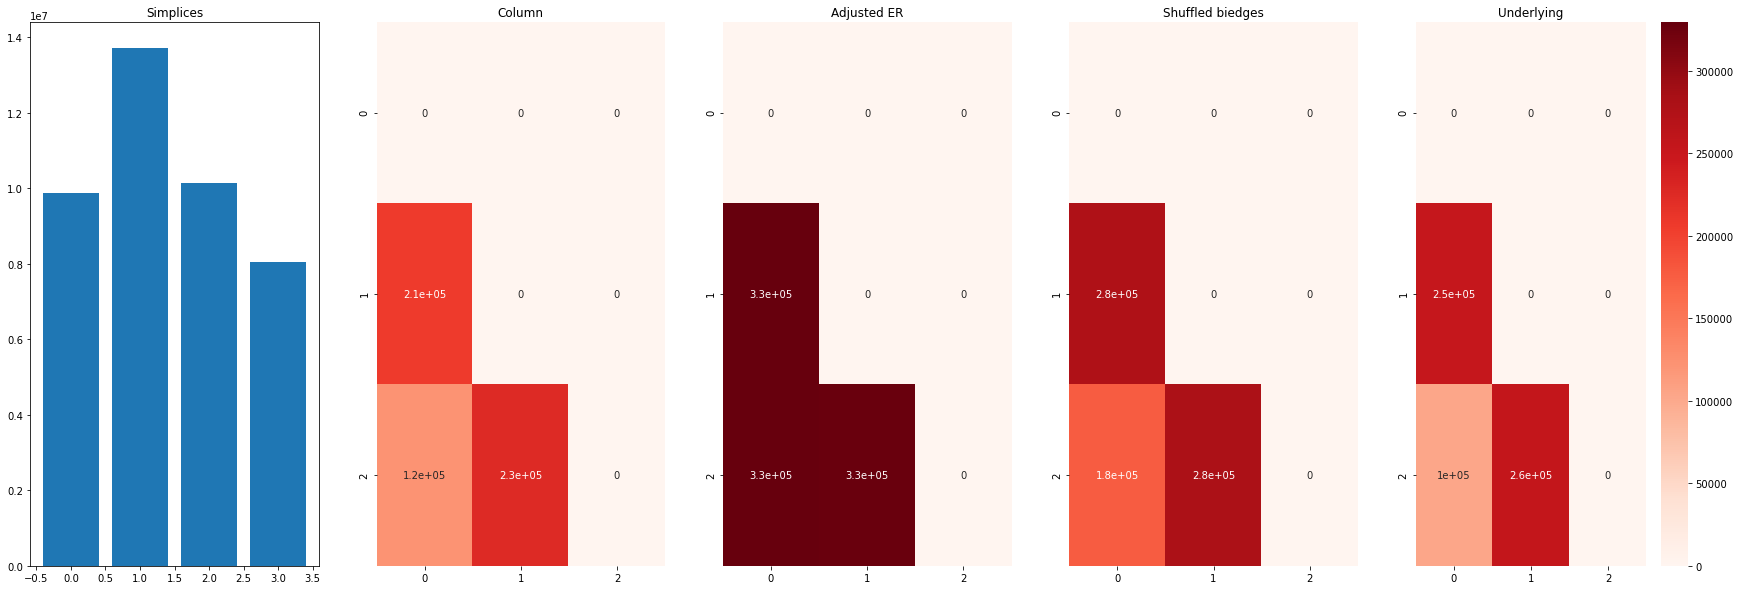

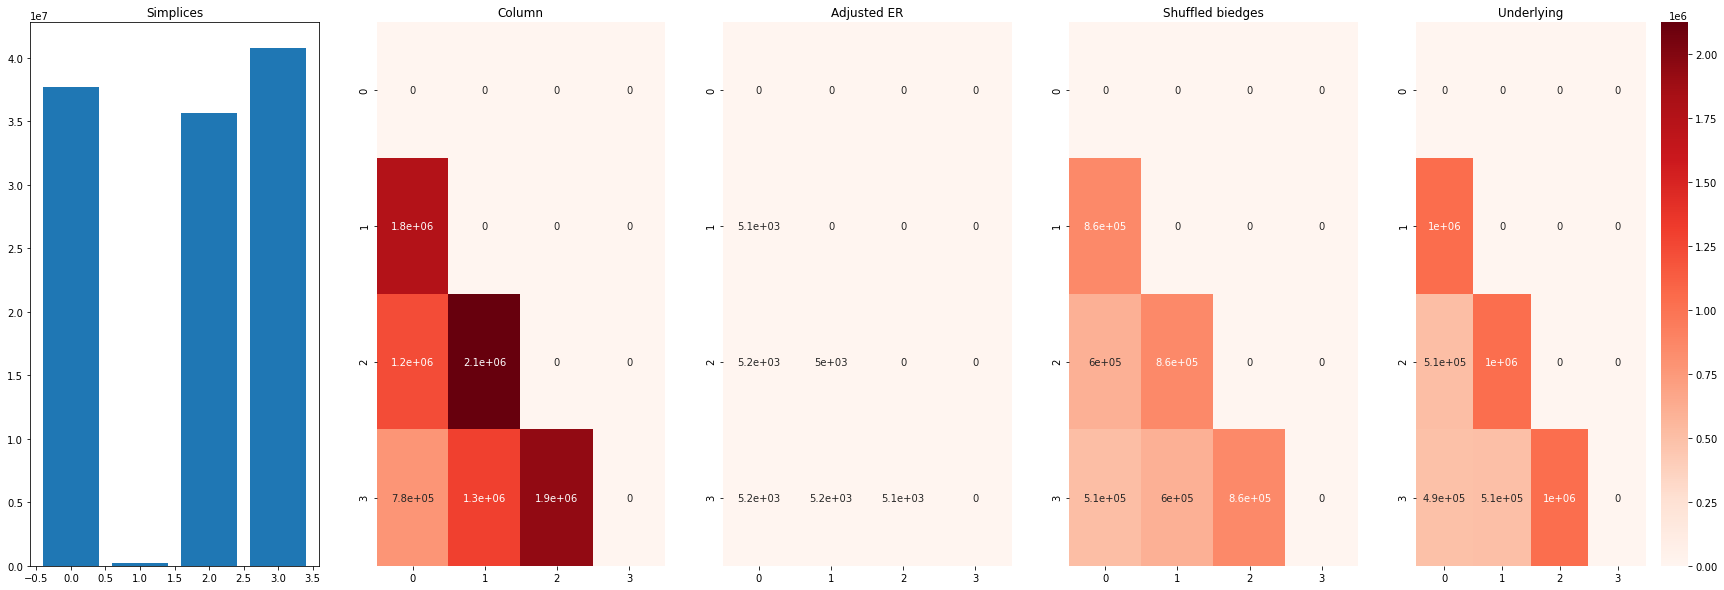

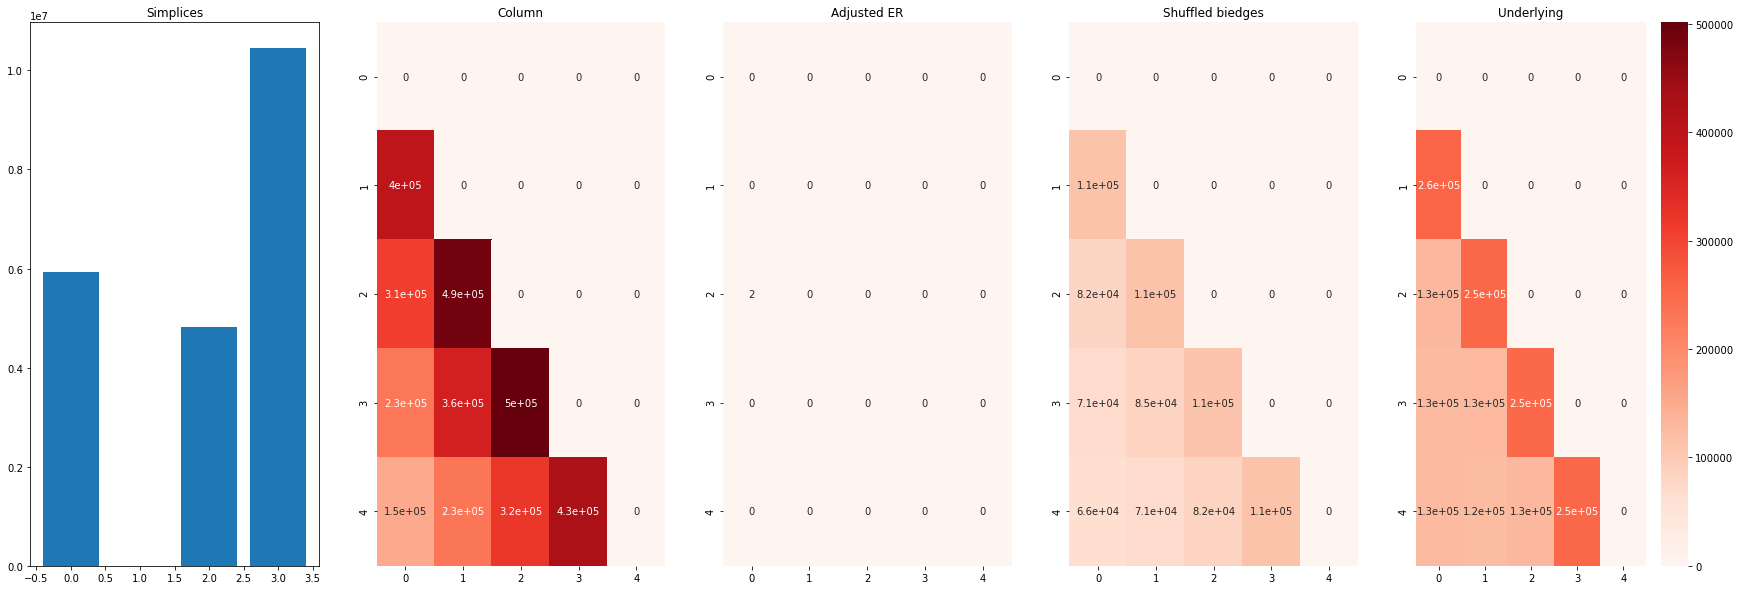

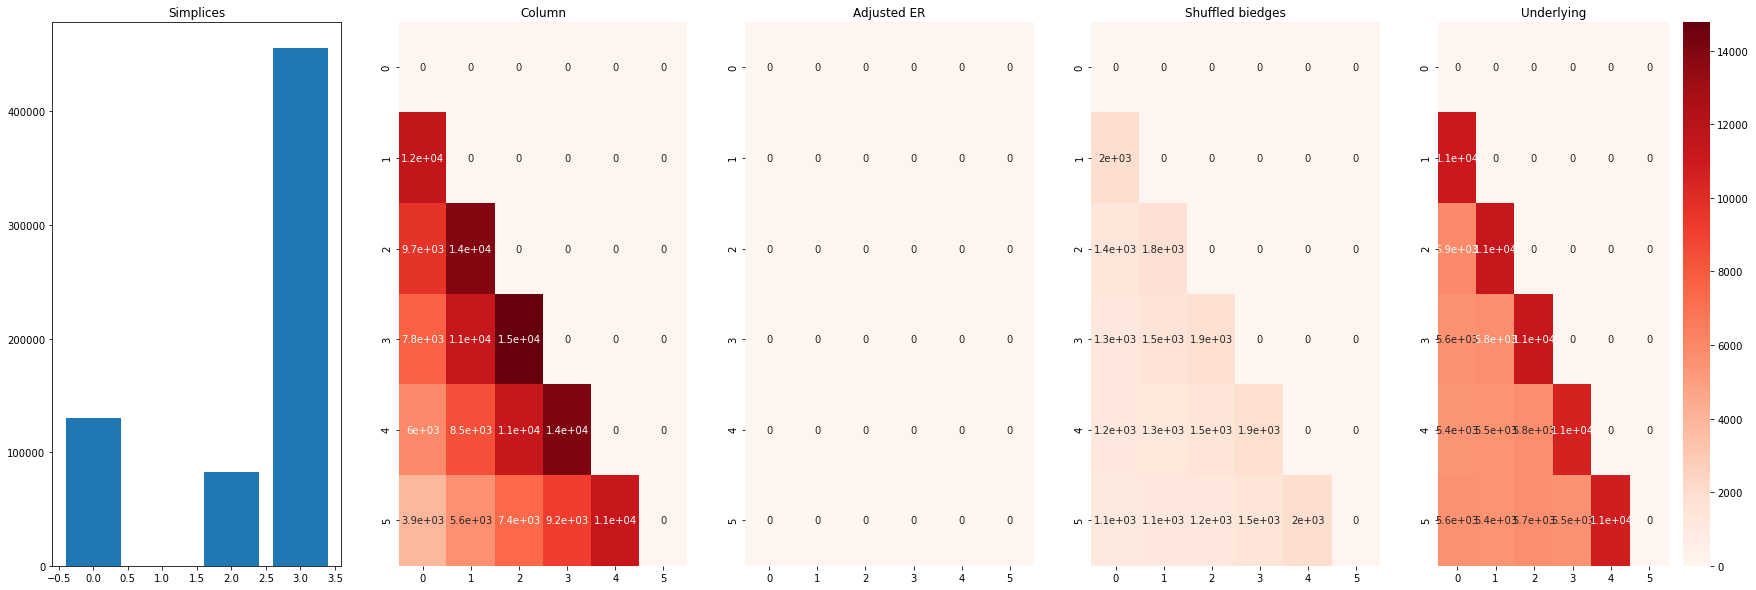

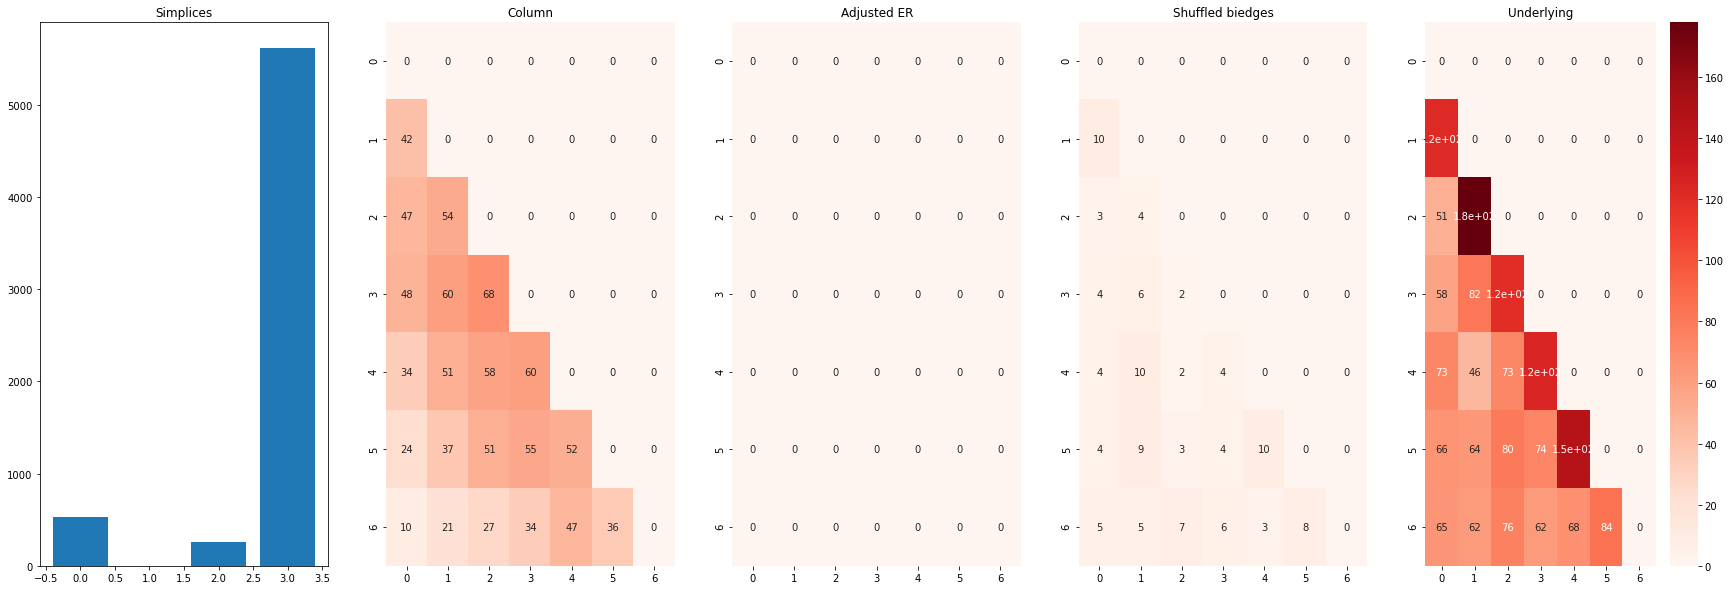

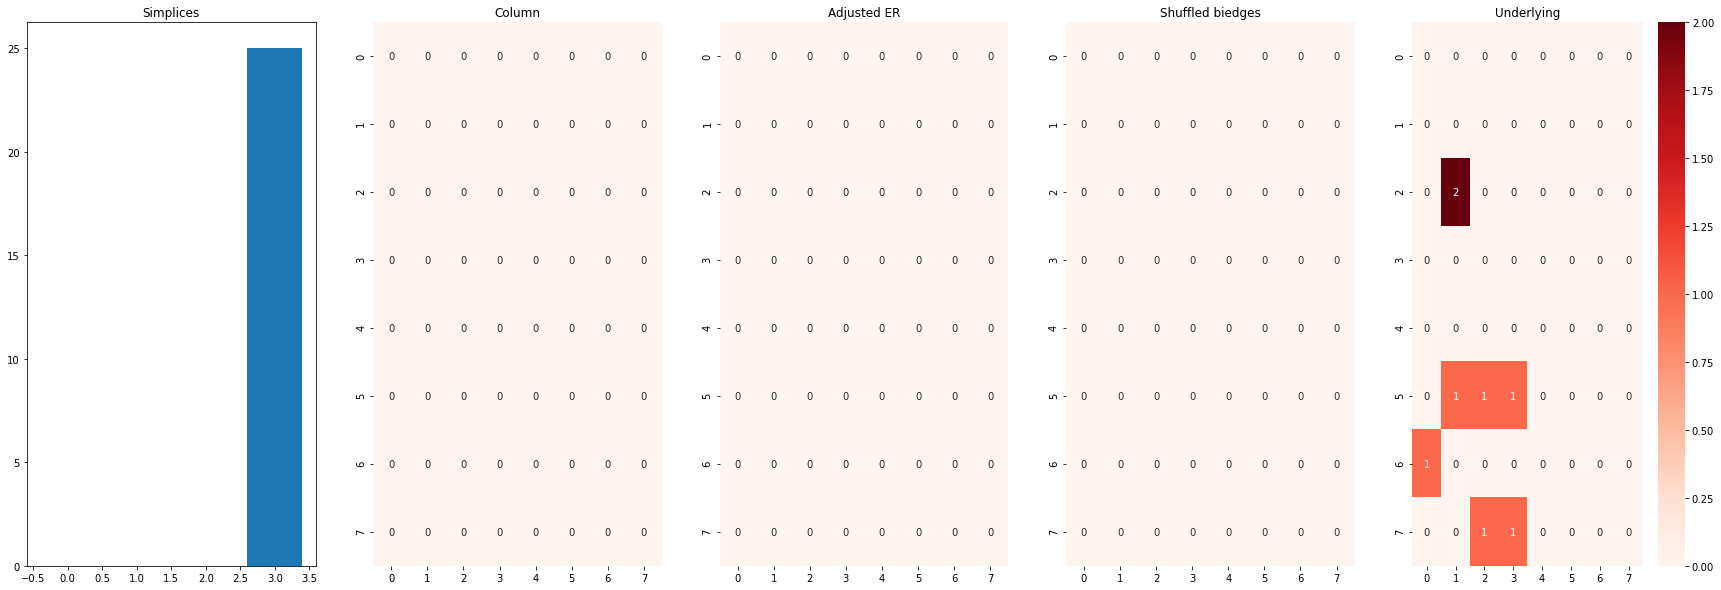

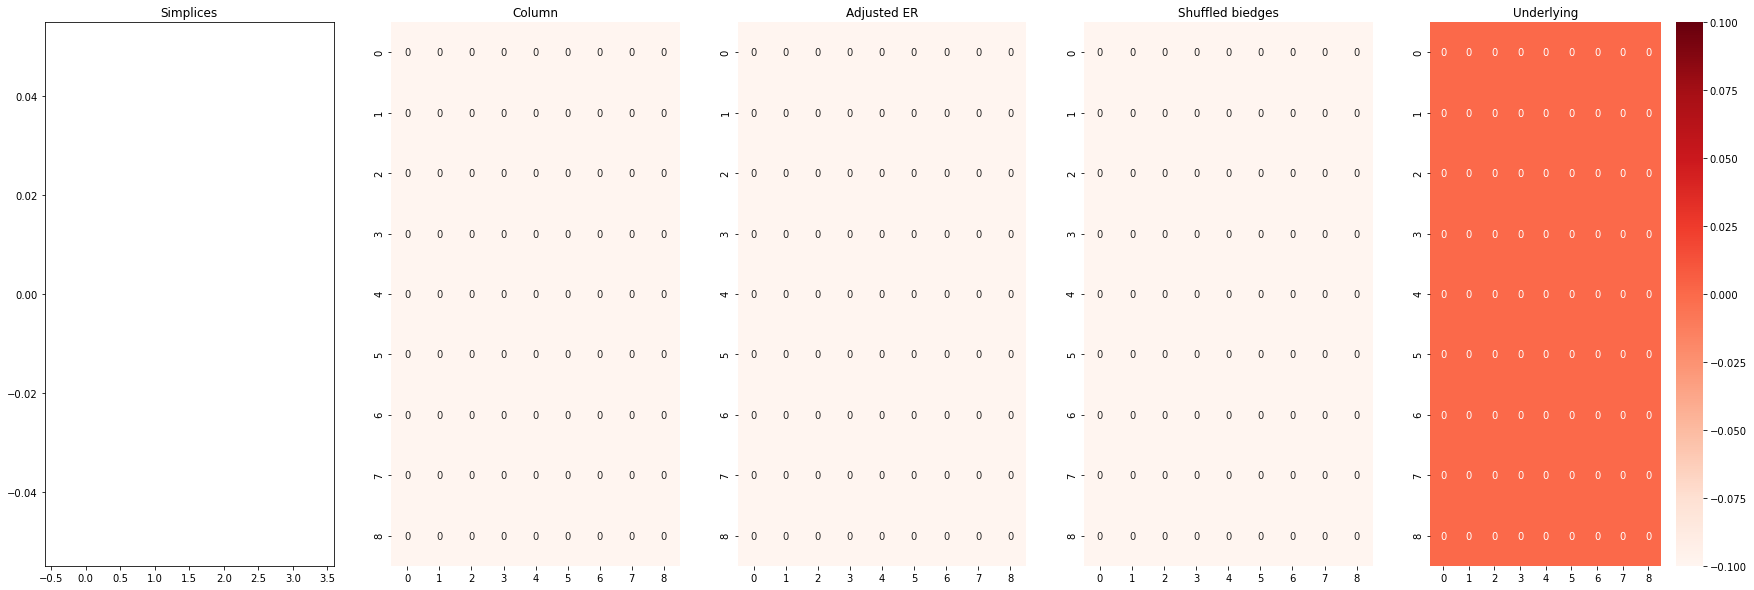

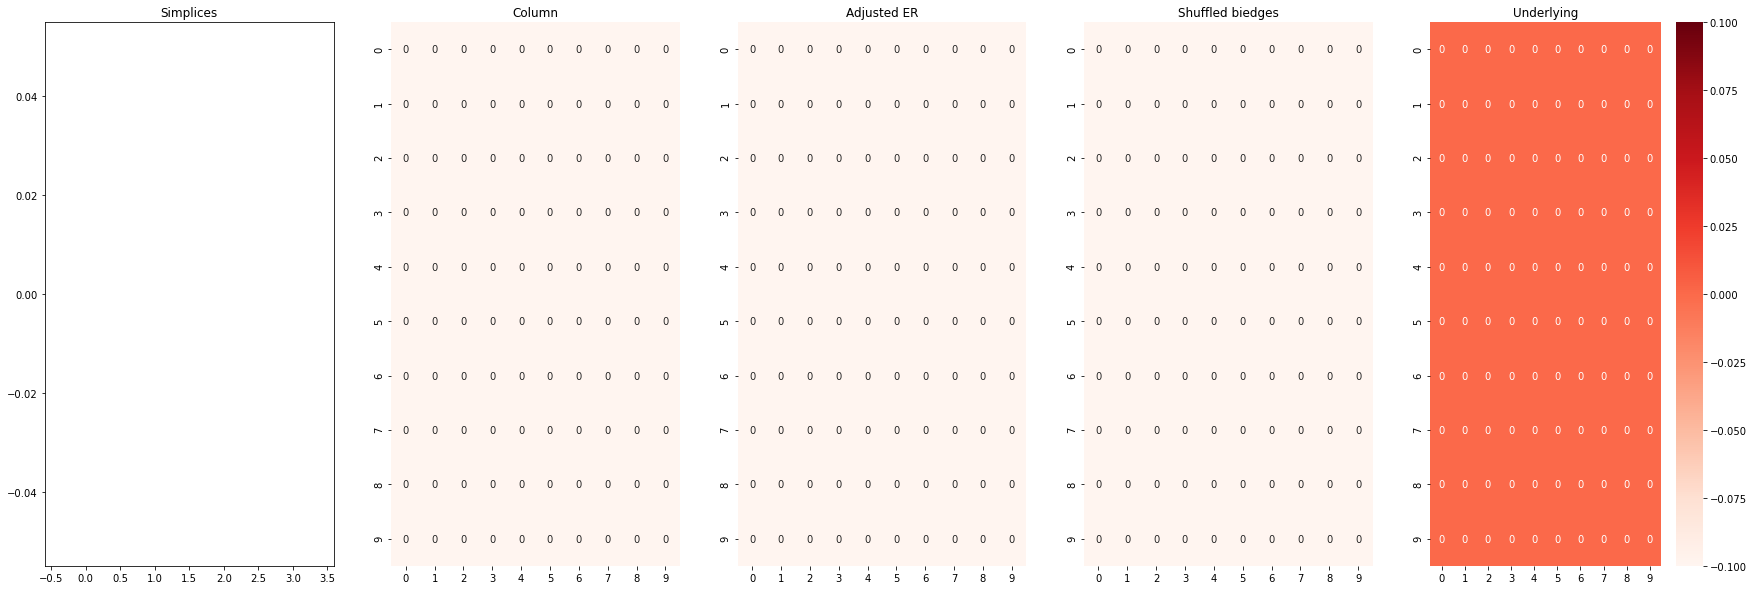

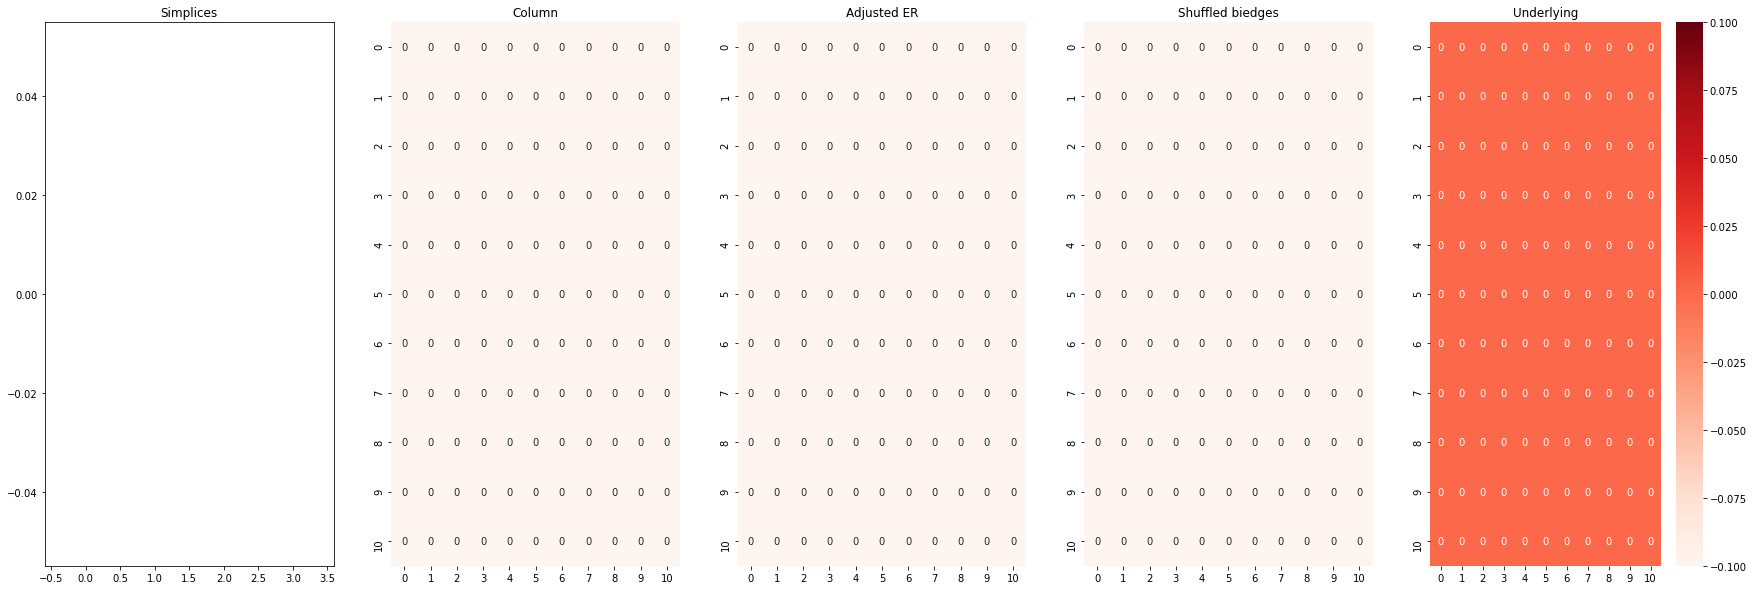

In [26]:
compare_graphs([am,bm,cm,dm], 1, "mbcounts_dim")

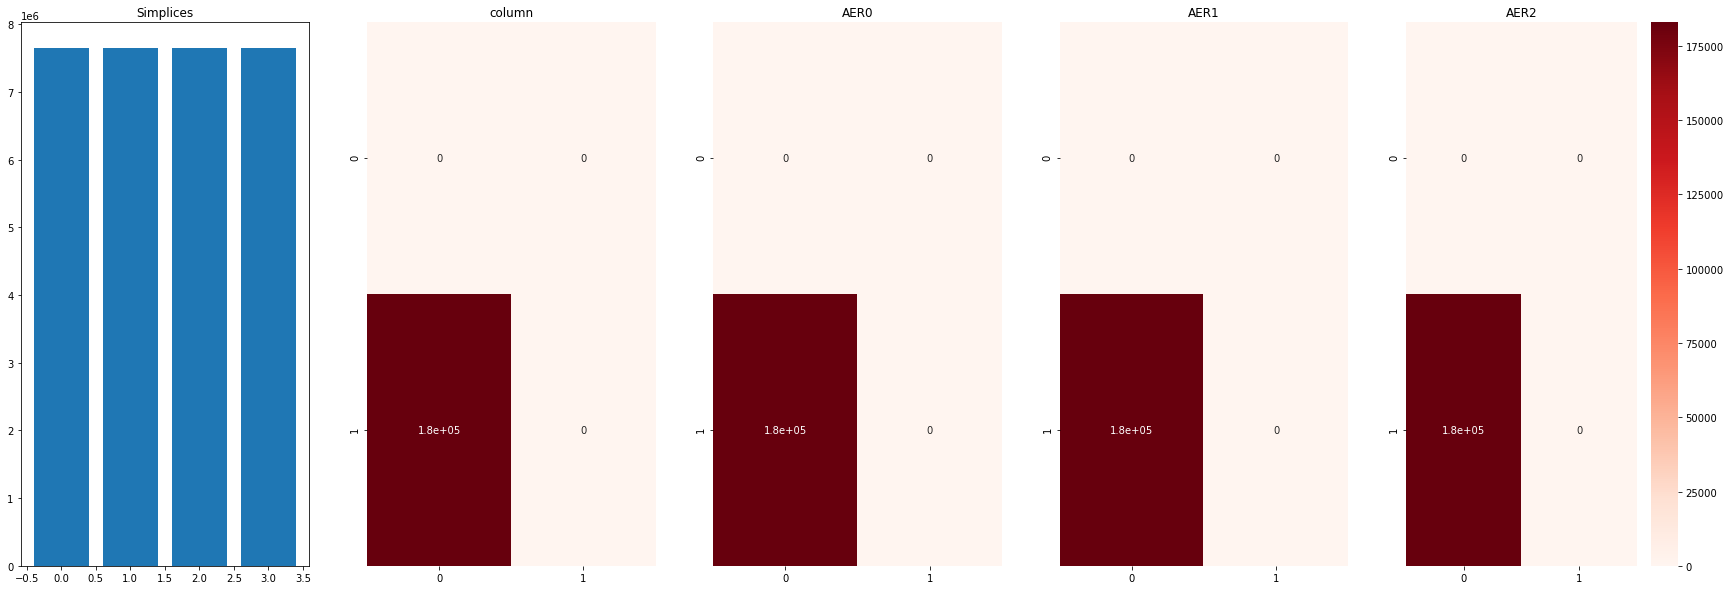

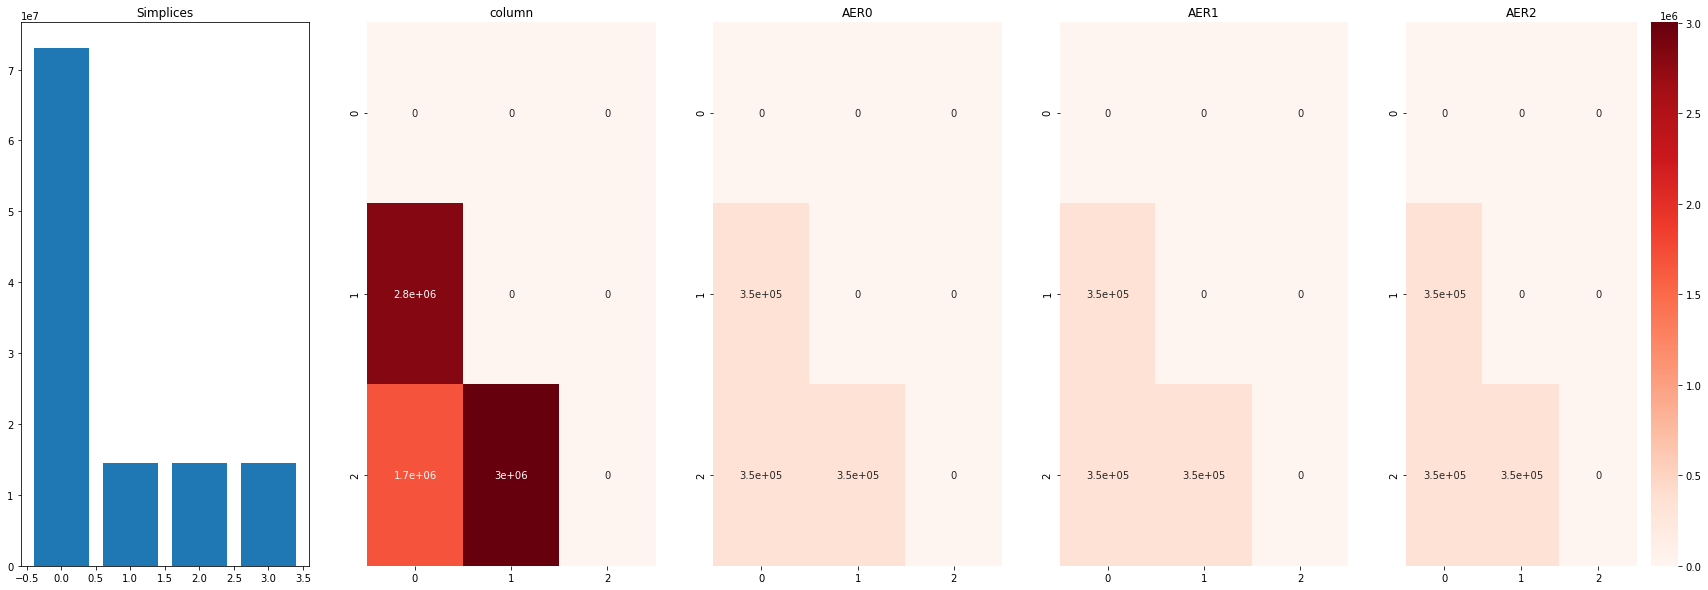

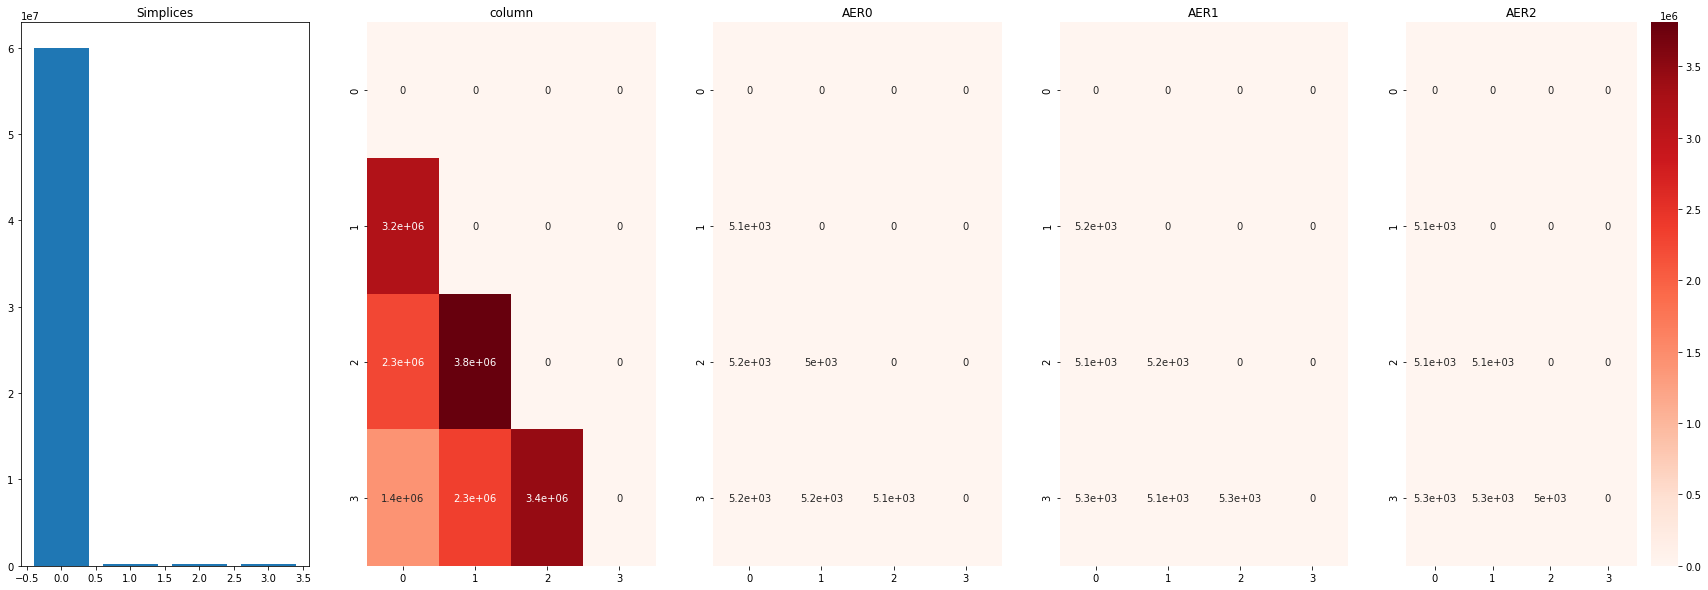

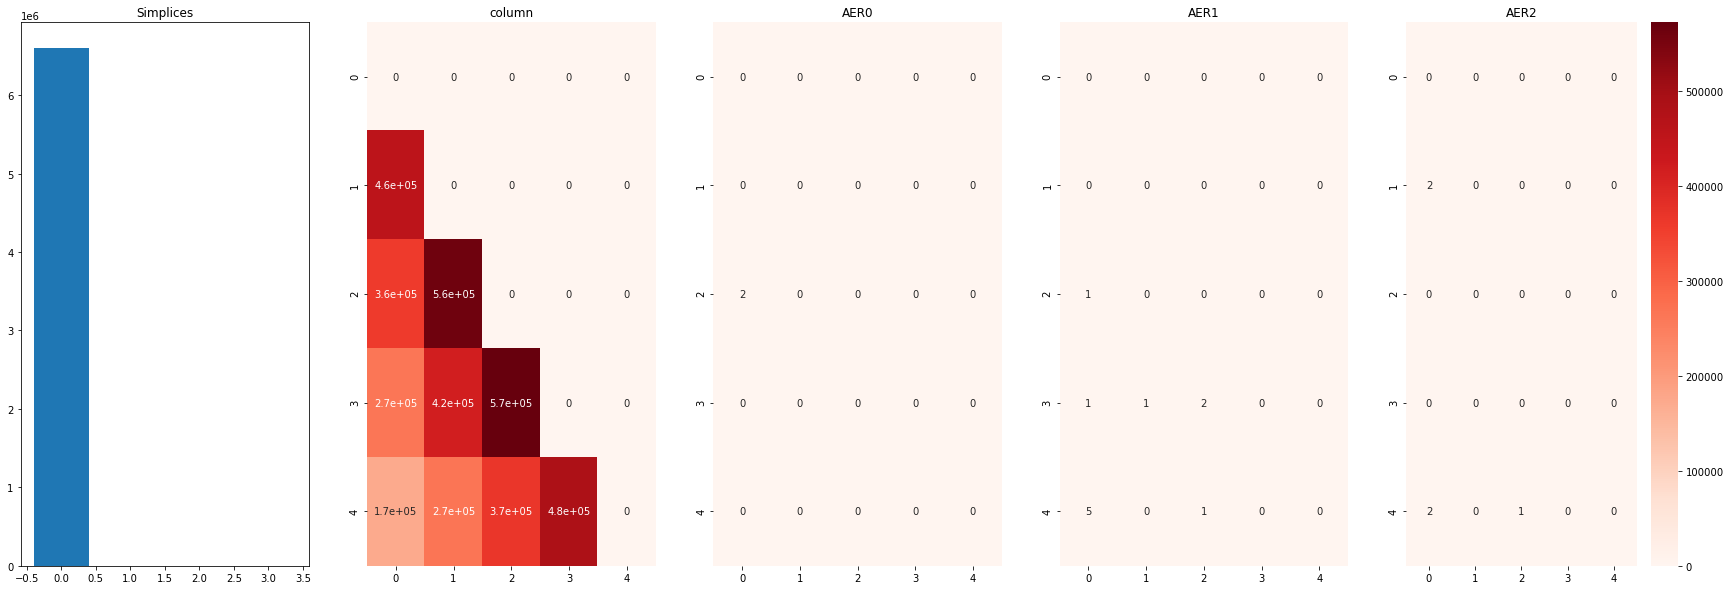

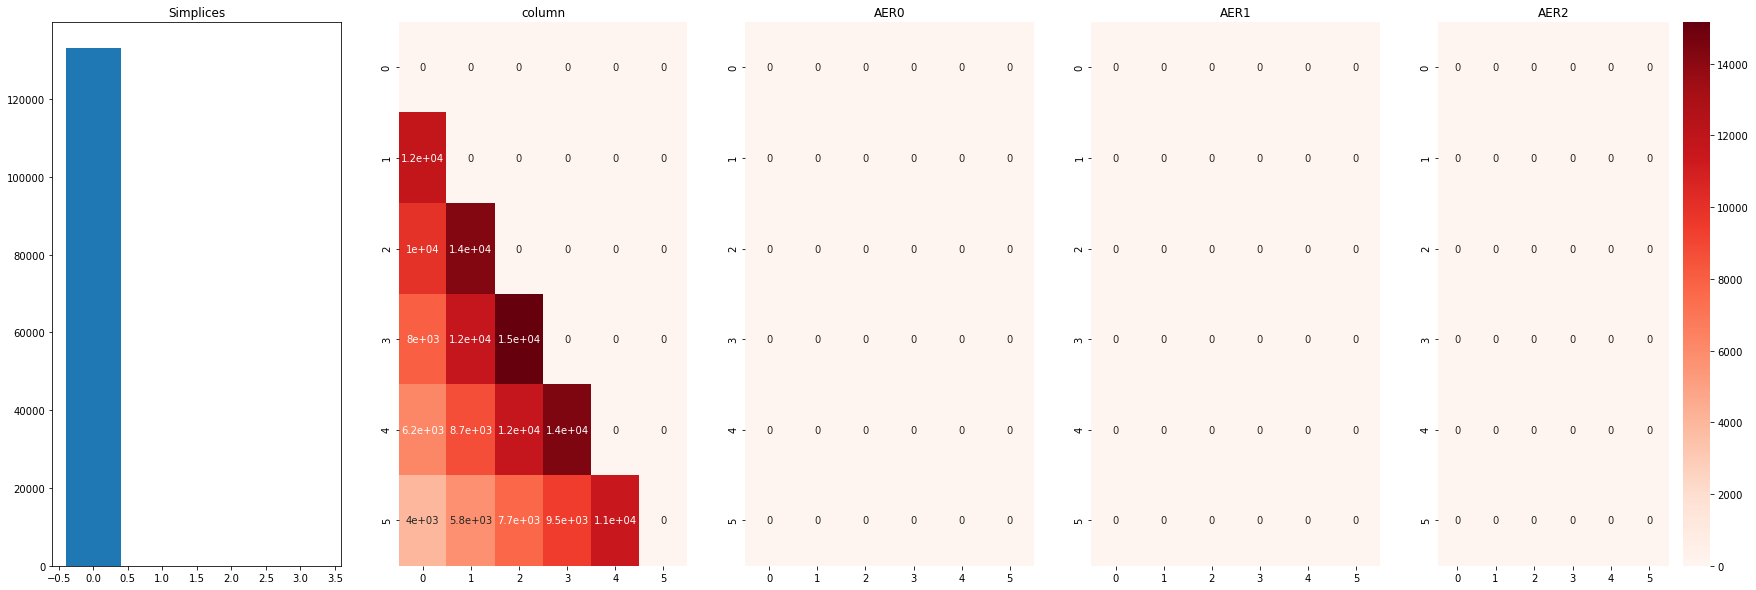

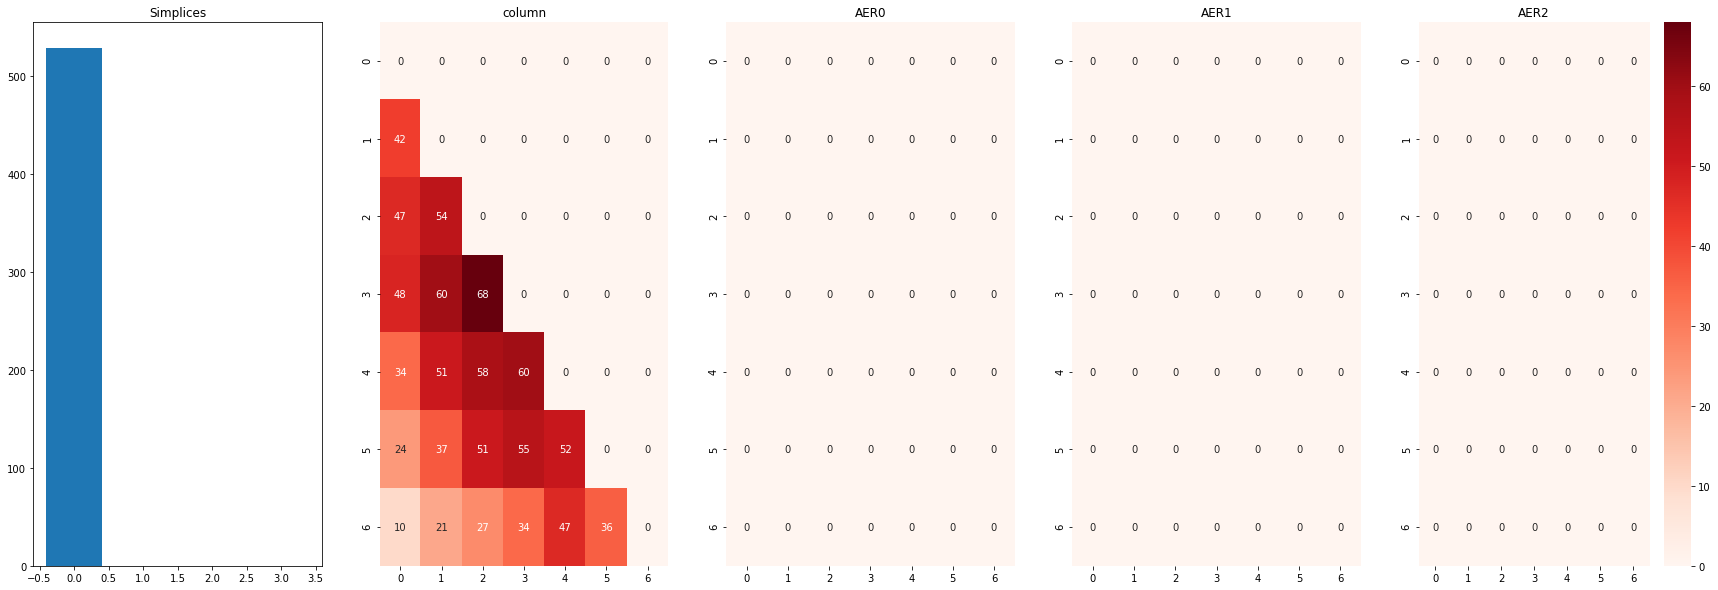

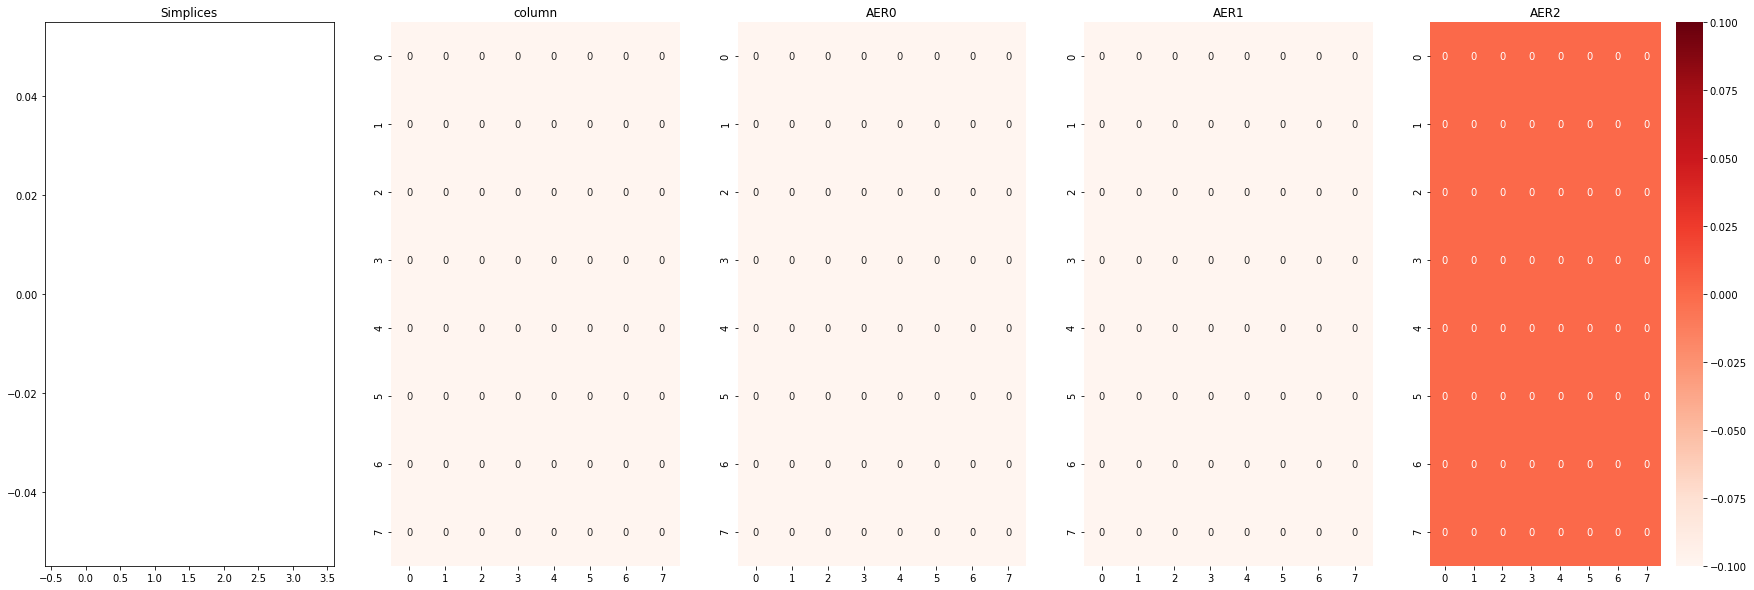

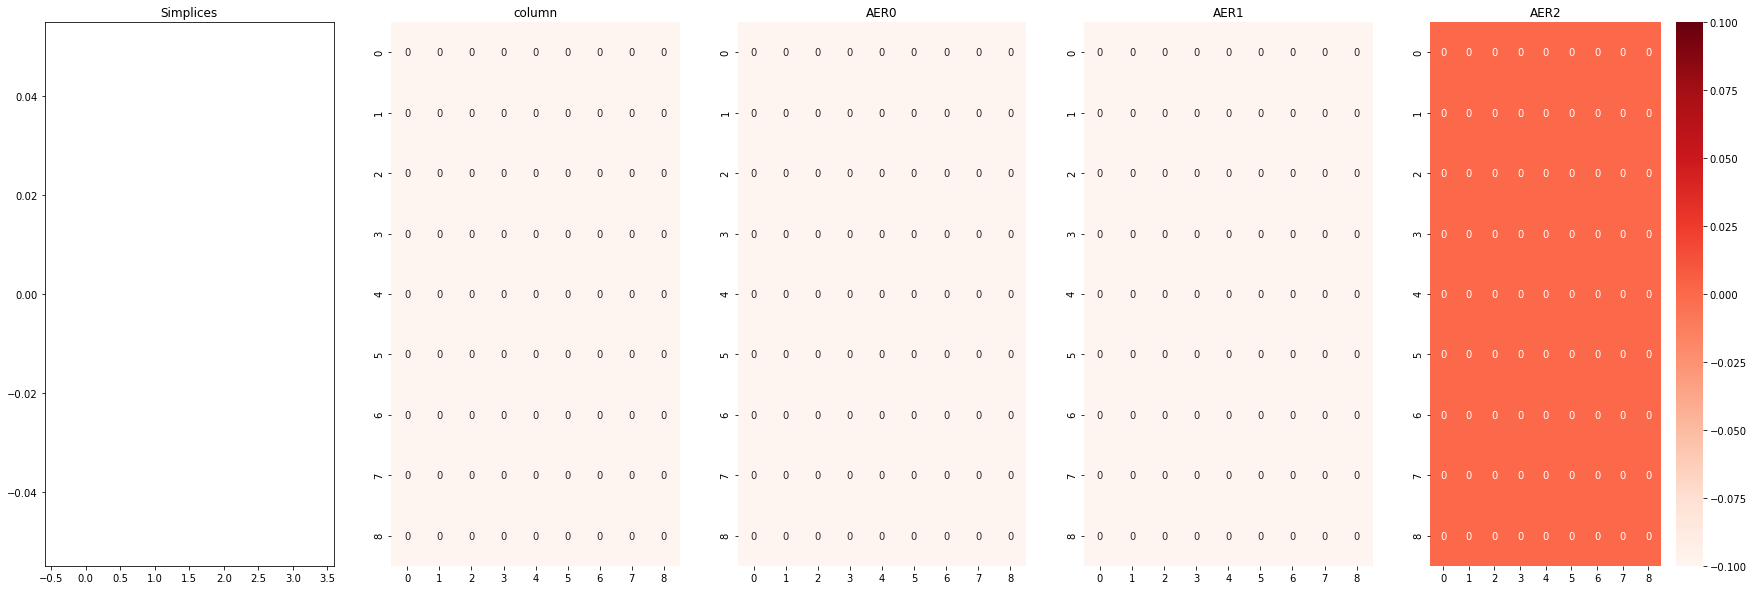

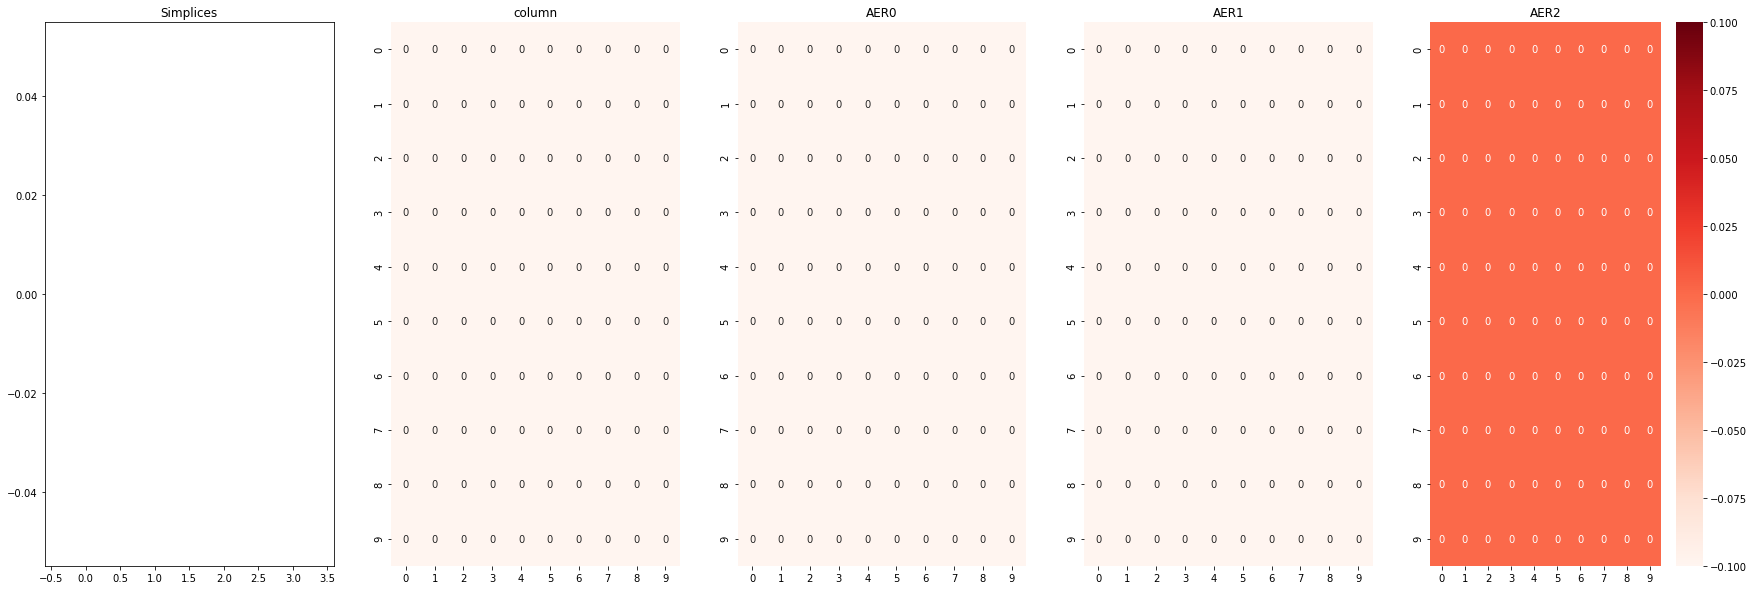

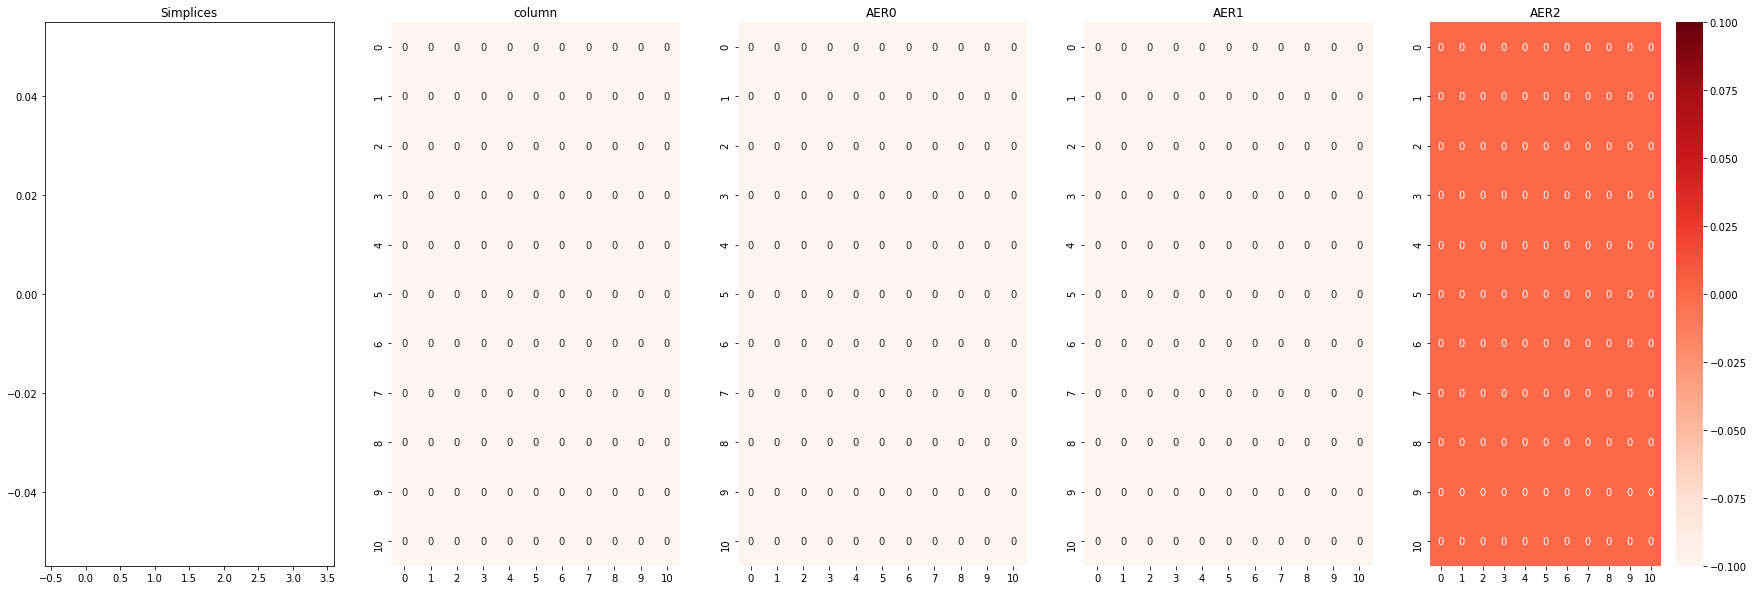

In [27]:
compare_graphs([a,b0,b1,b2], 1, "variance_dim", title_list = ["Simplices", "column", "AER0", "AER1", "AER2"])

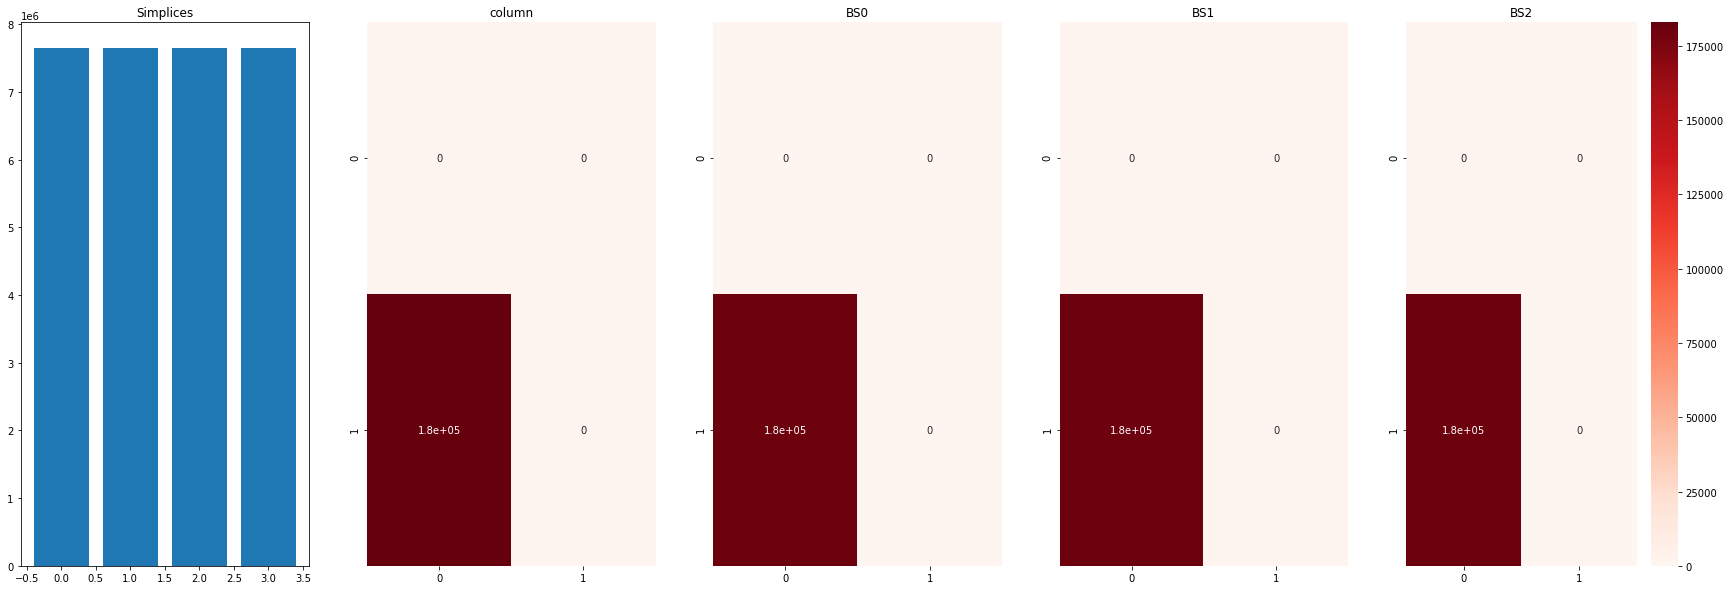

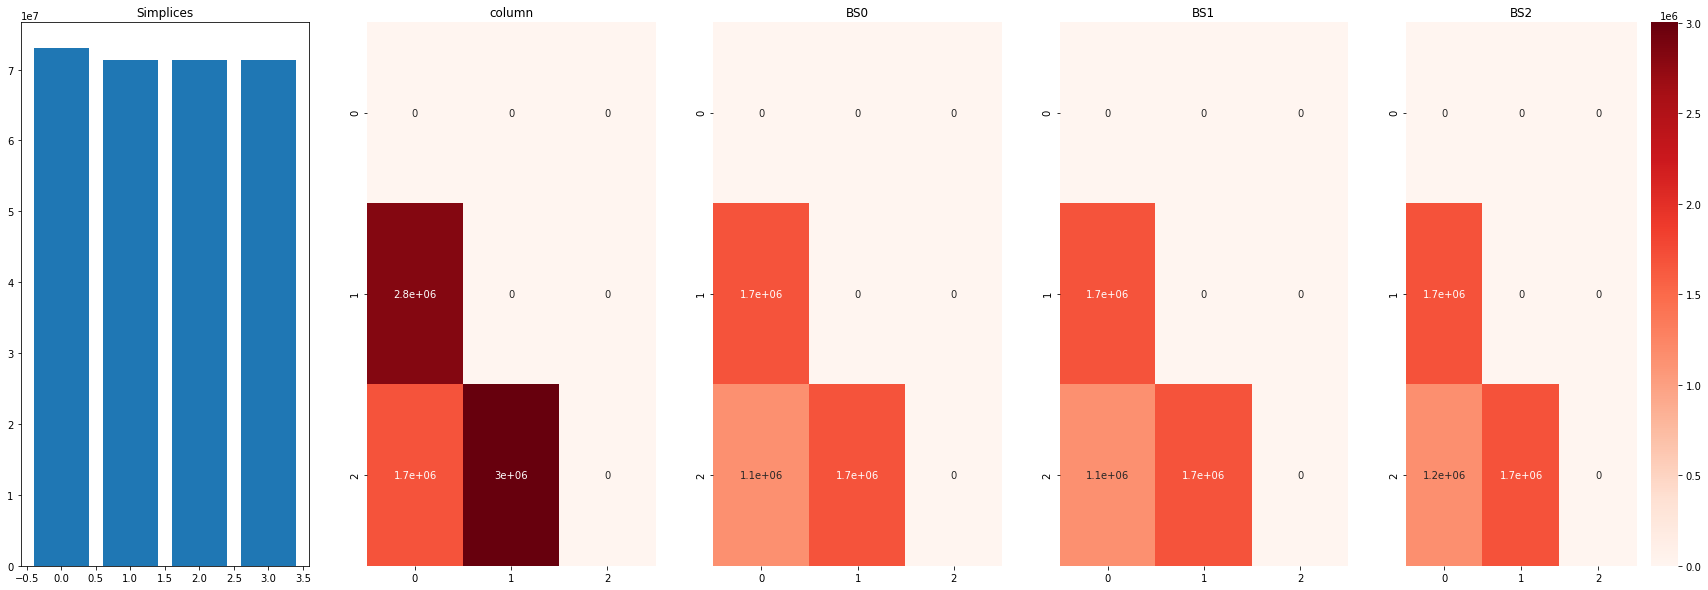

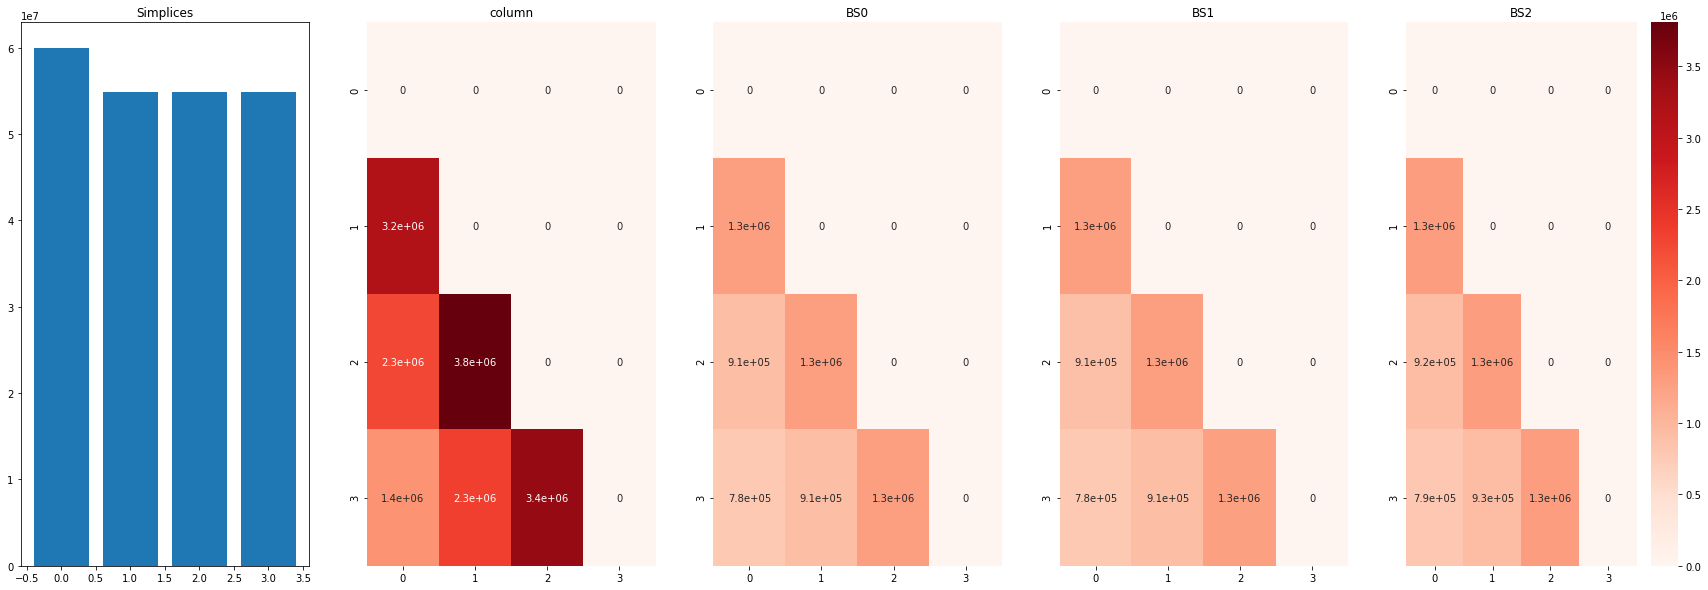

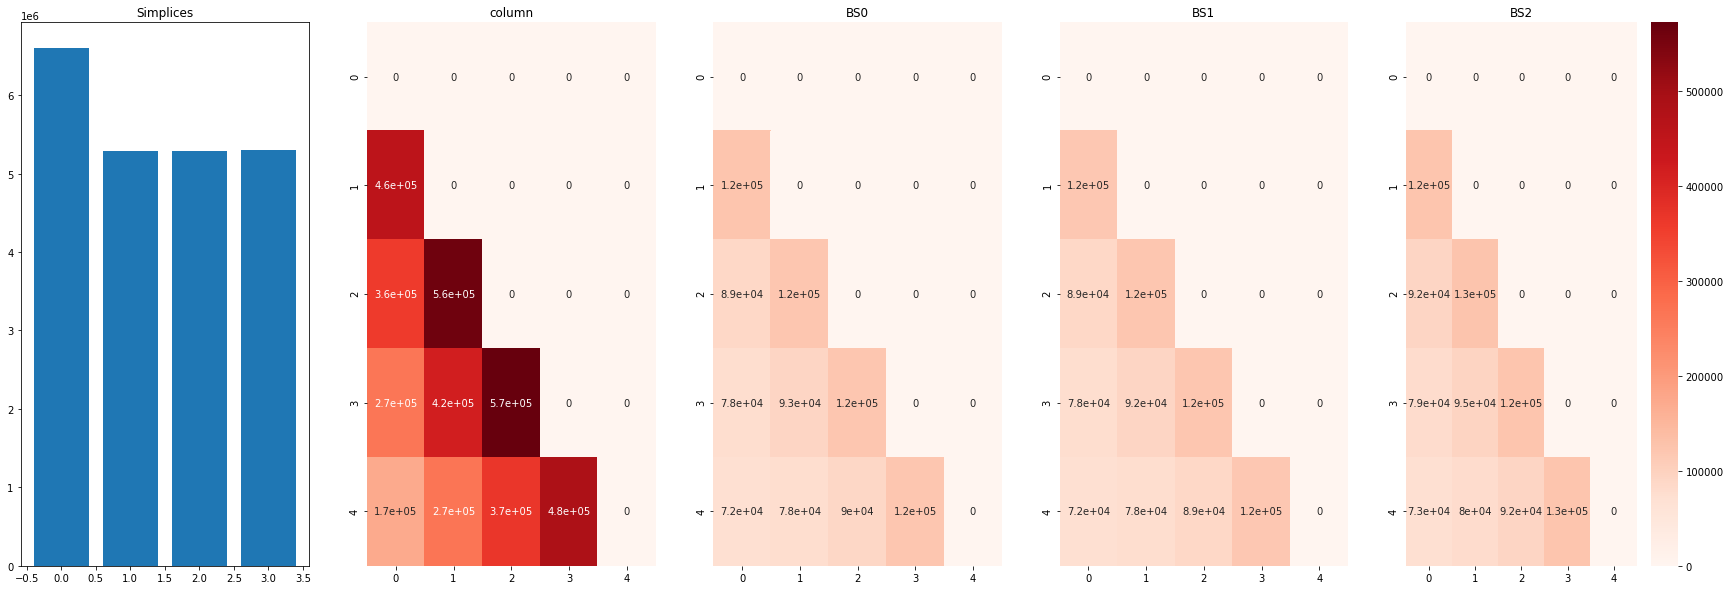

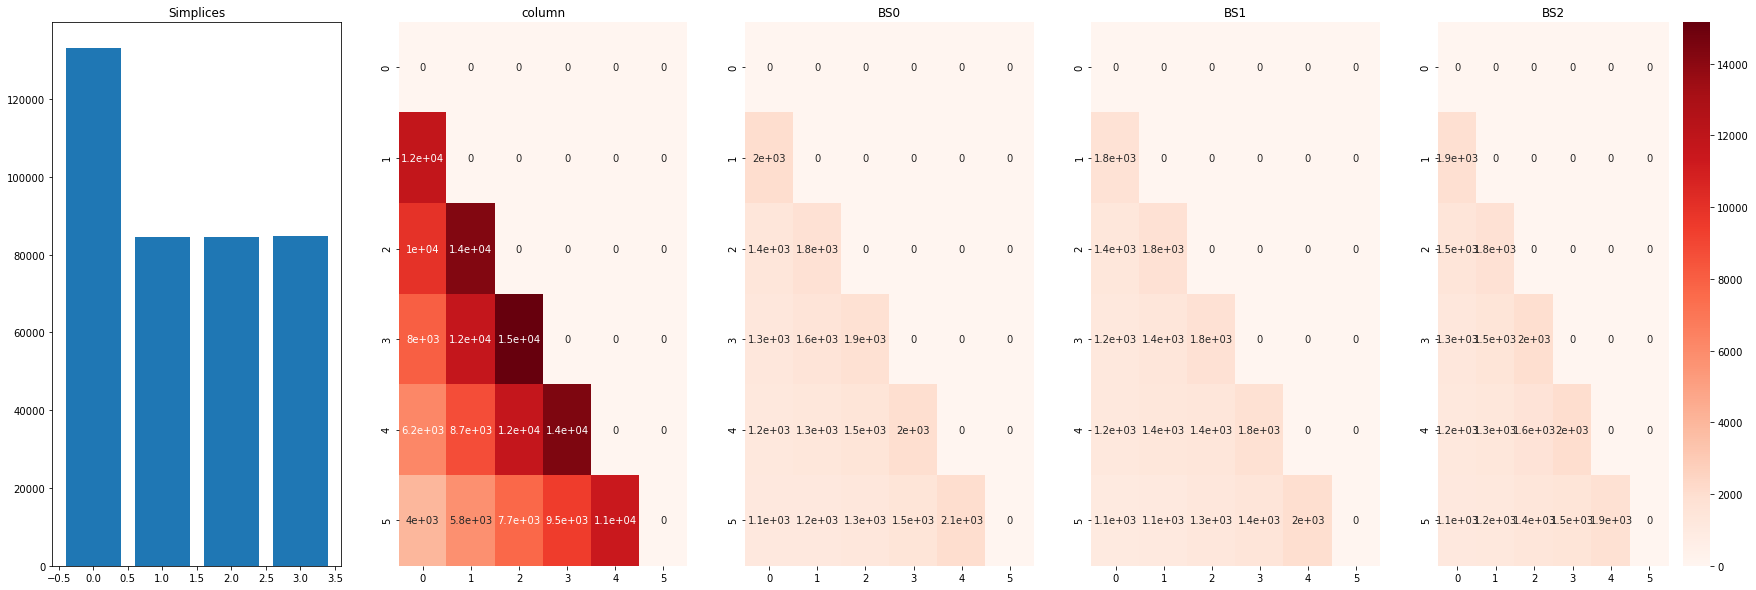

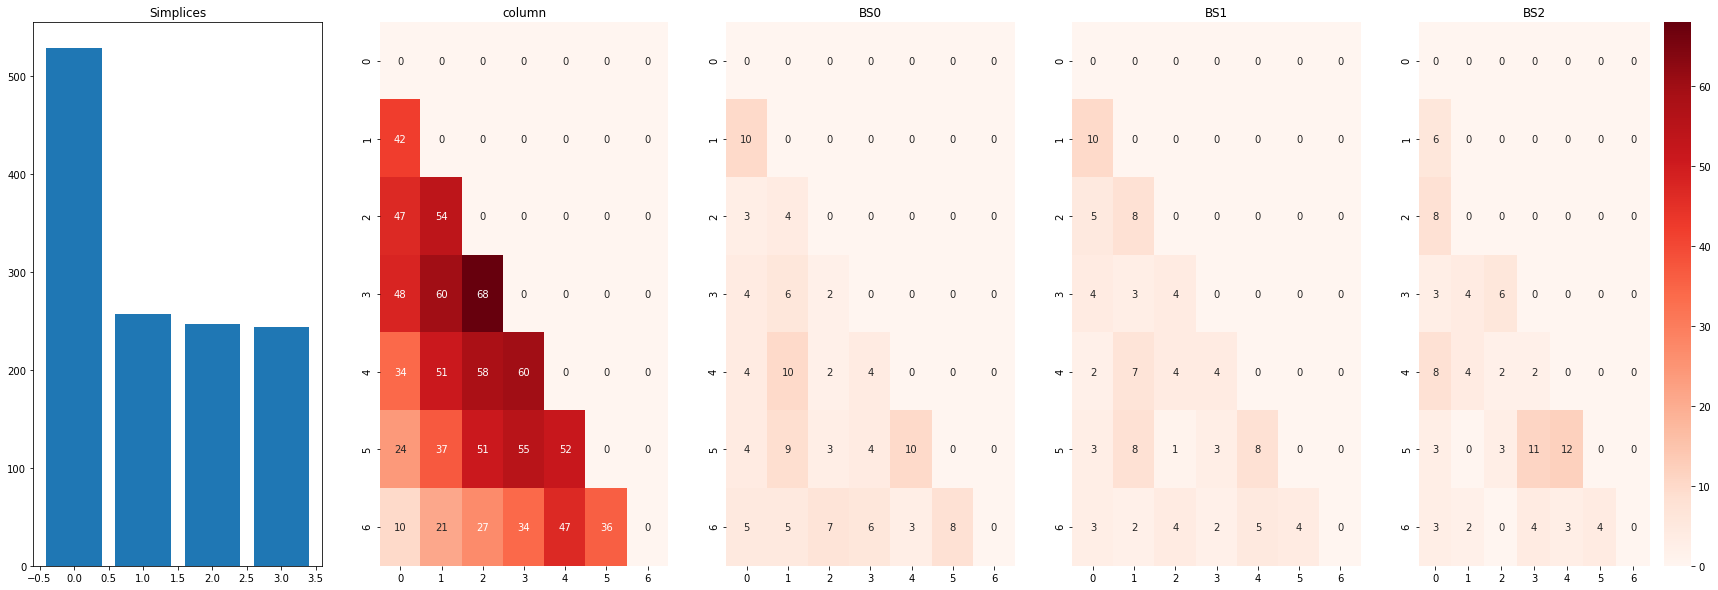

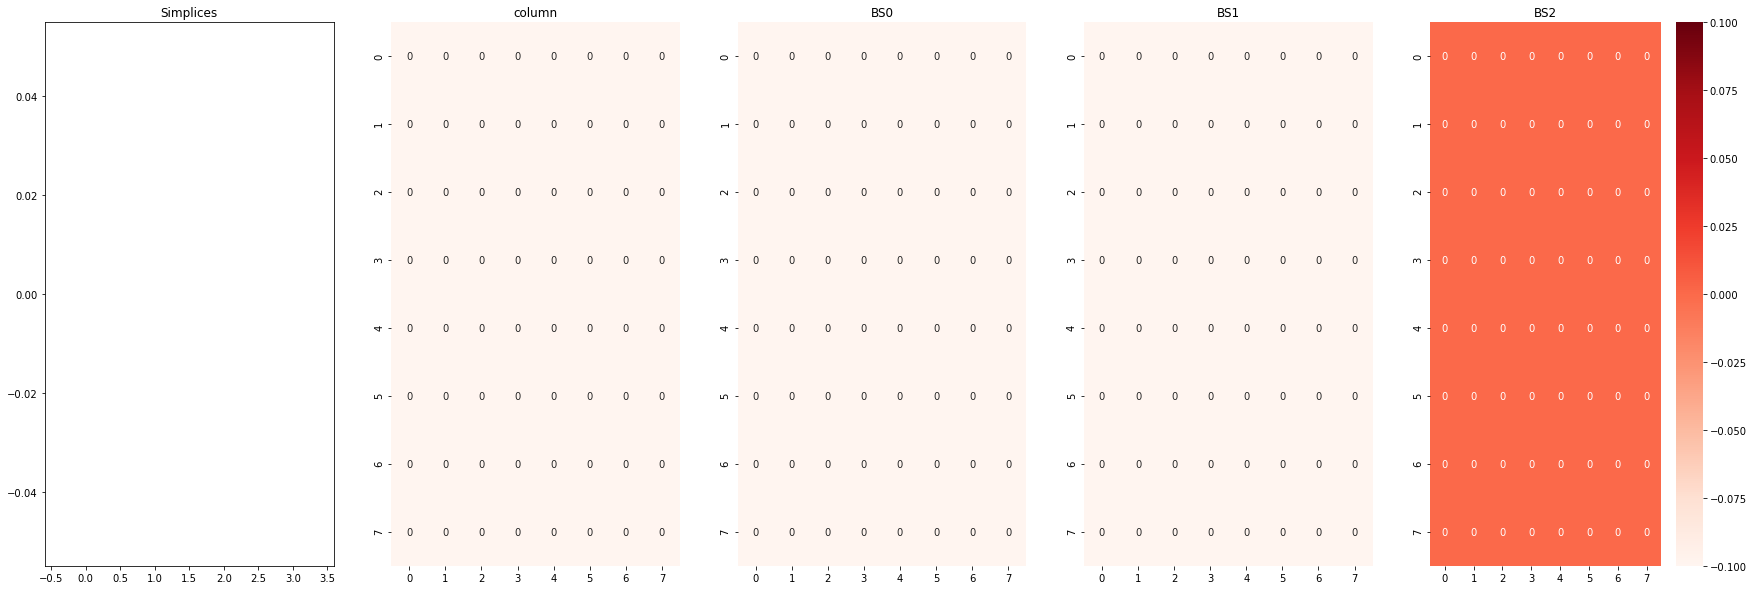

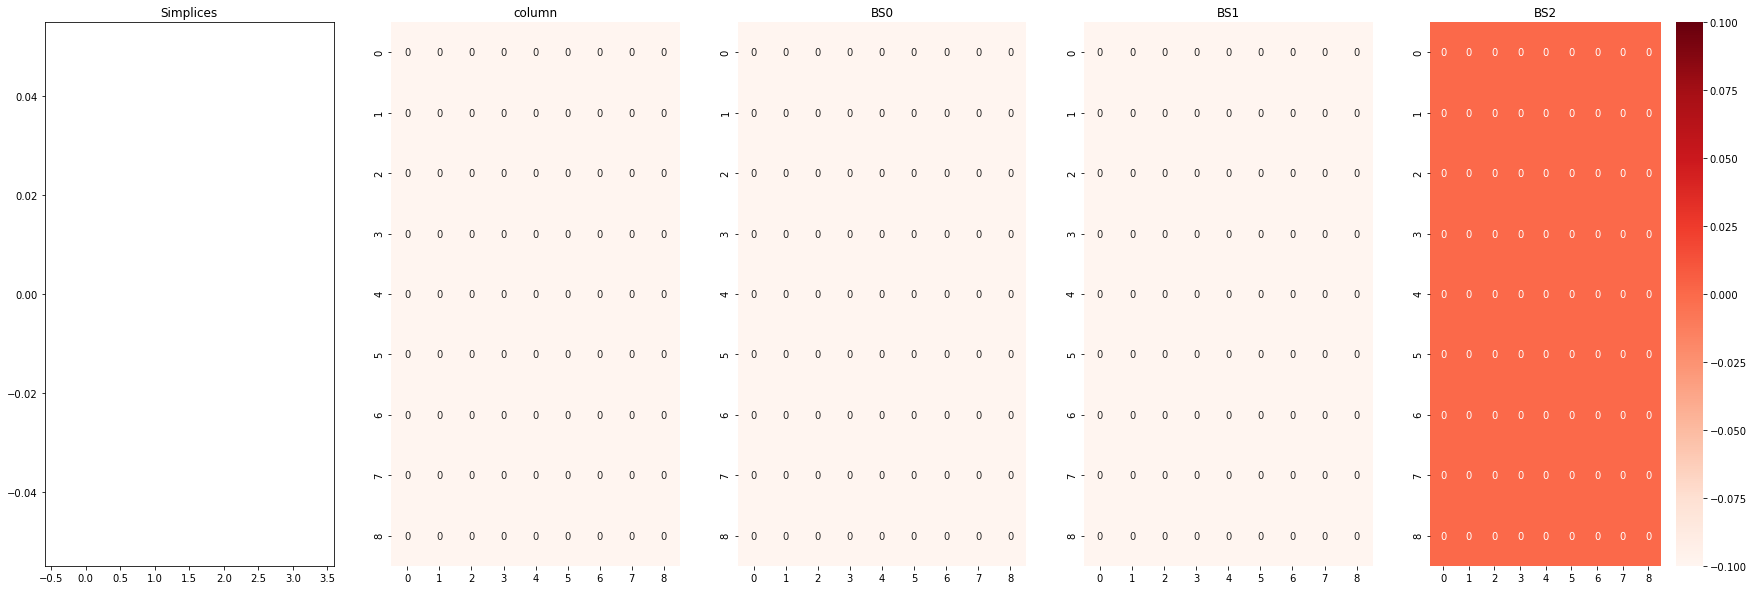

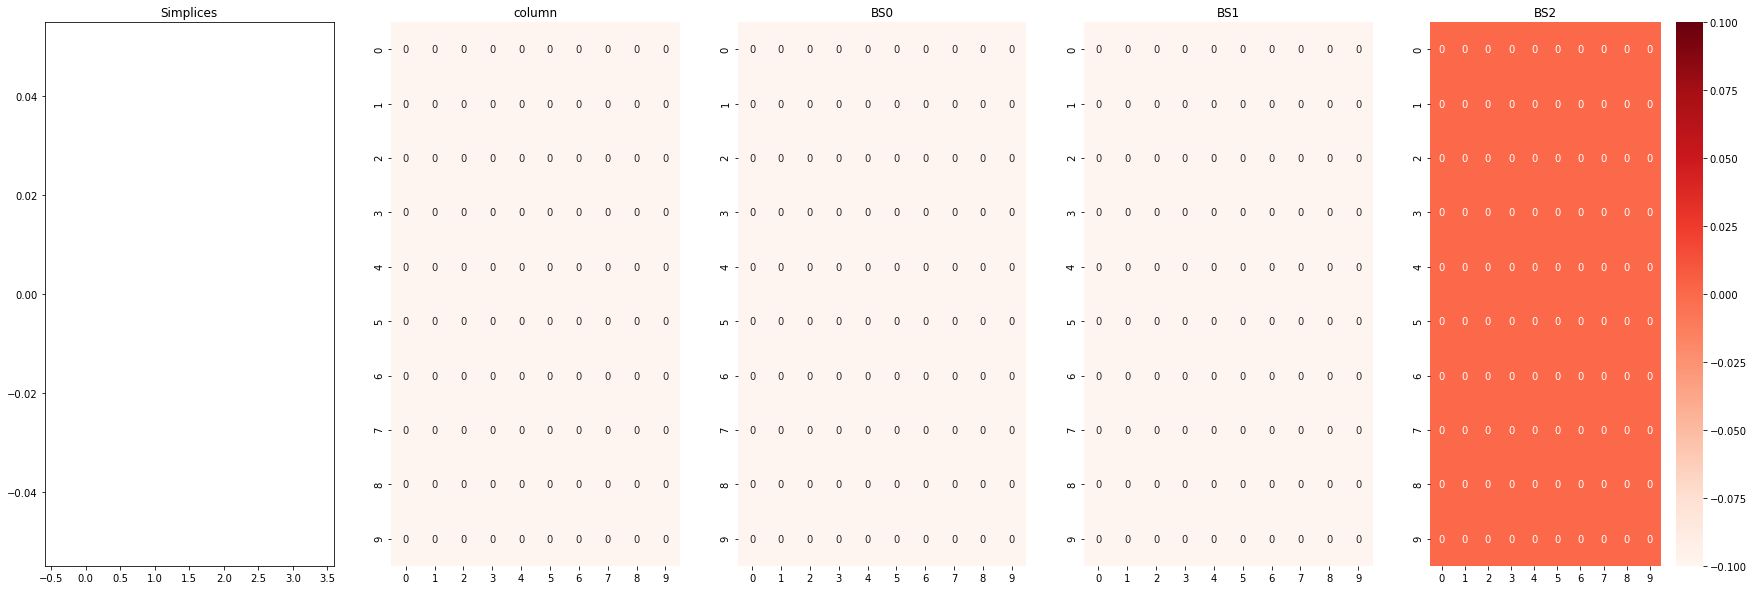

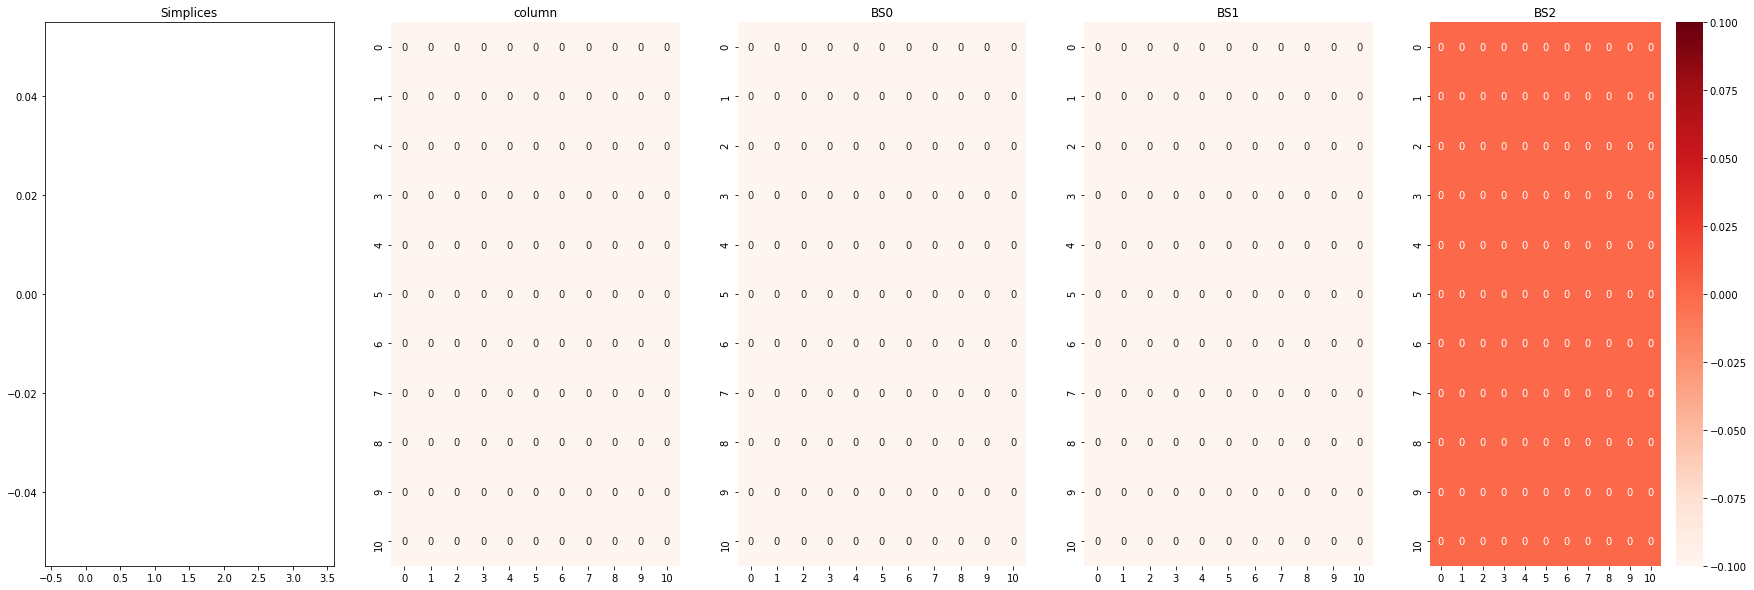

In [28]:
compare_graphs([a,c0,c1,c2], 1, "variance_dim_bshuffled", title_list = ["Simplices", "column", "BS0", "BS1", "BS2"])

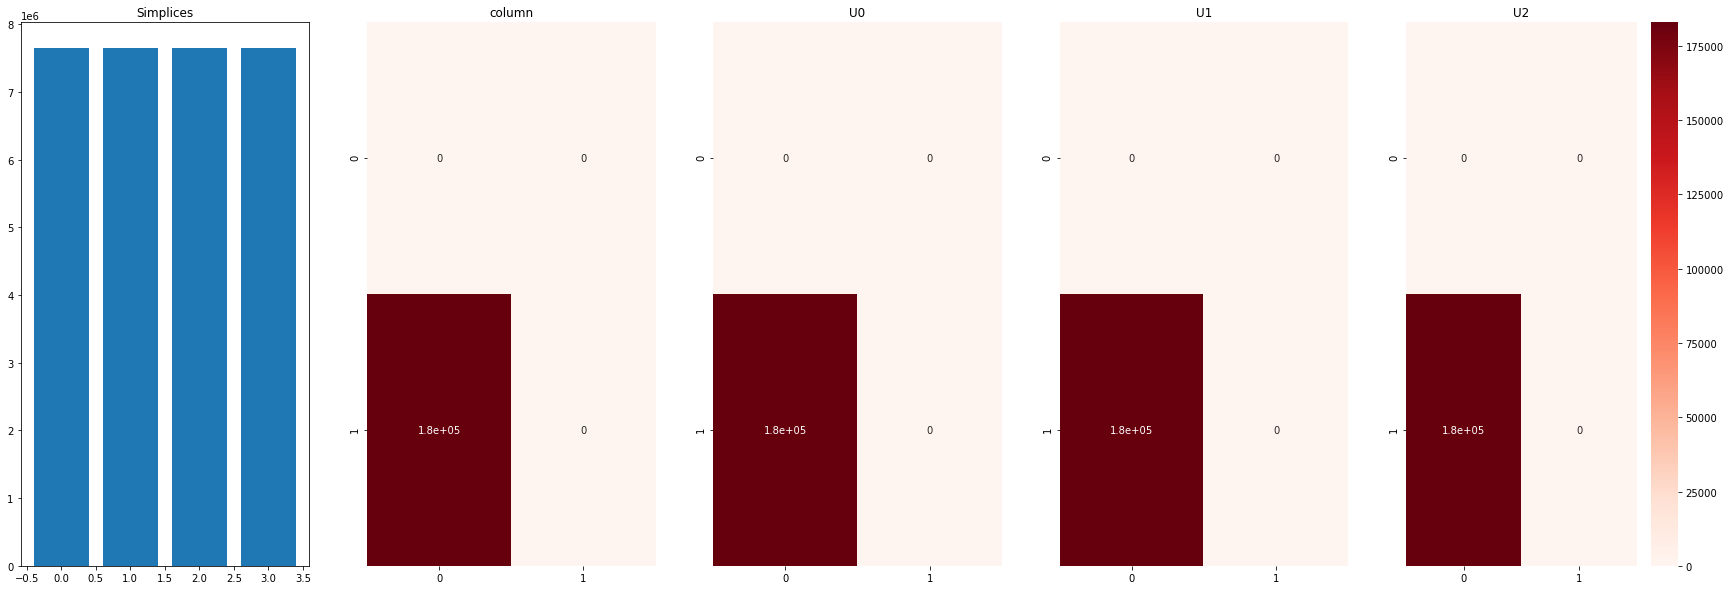

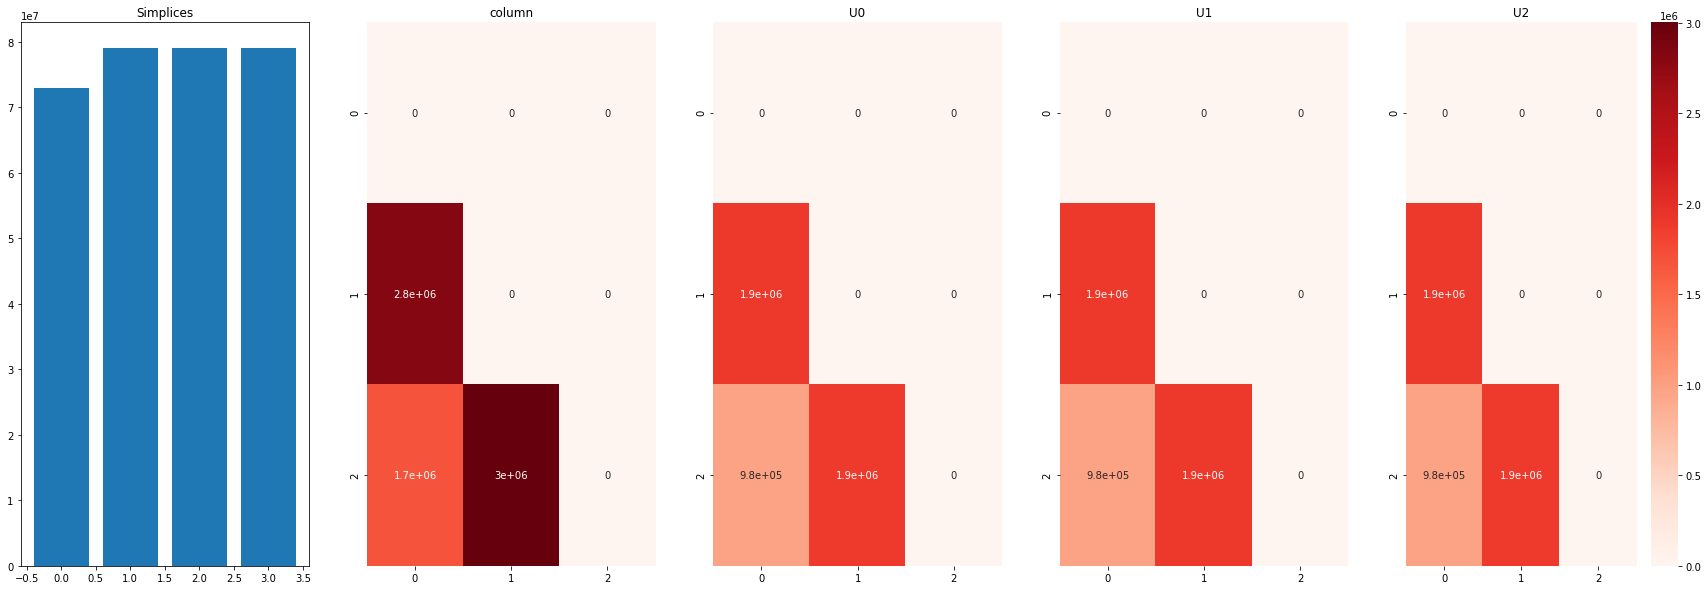

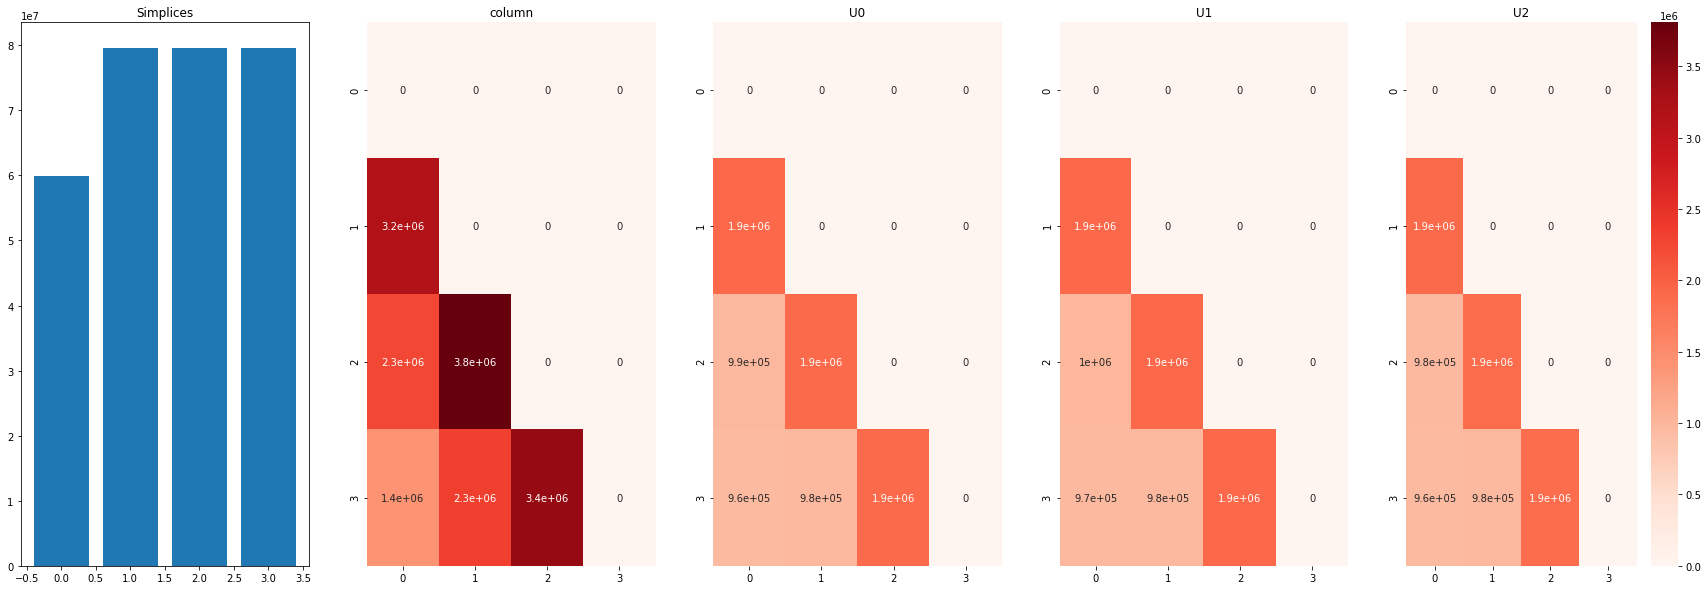

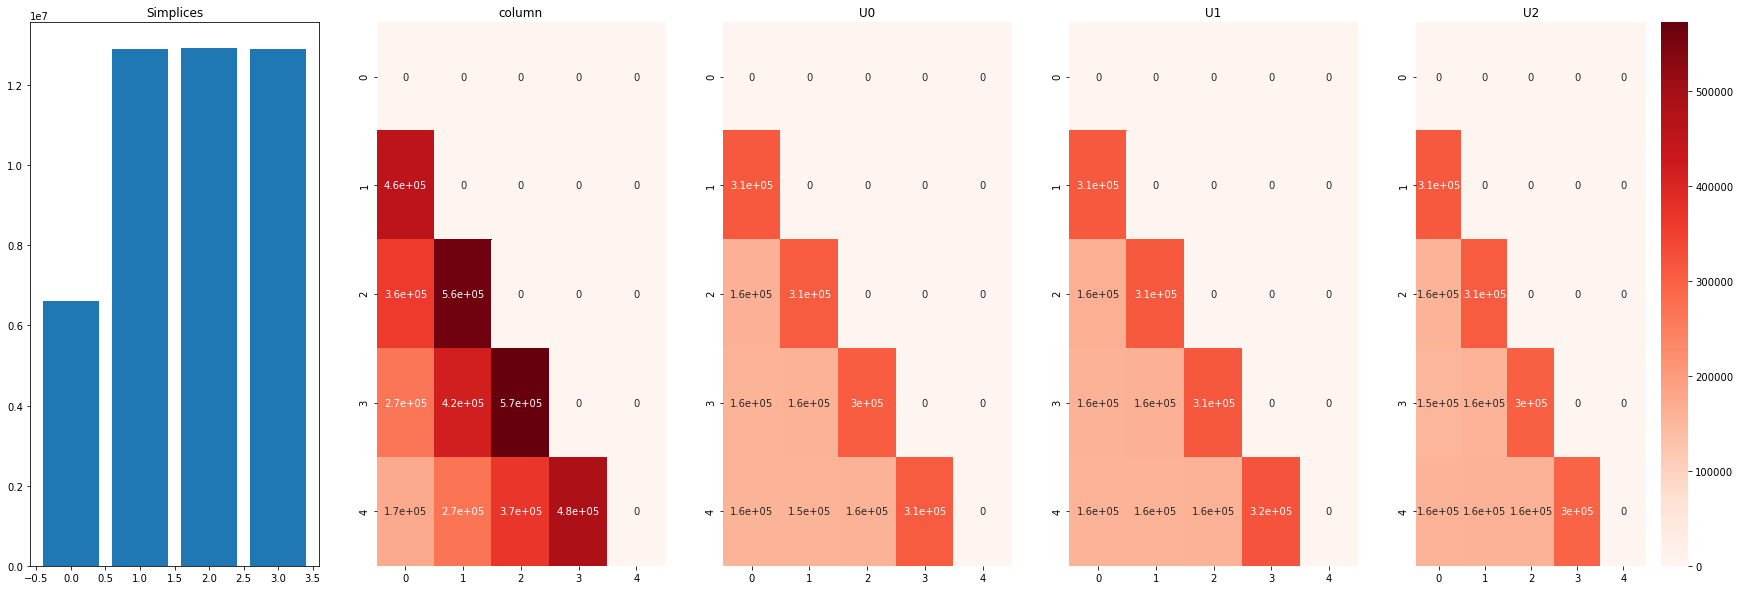

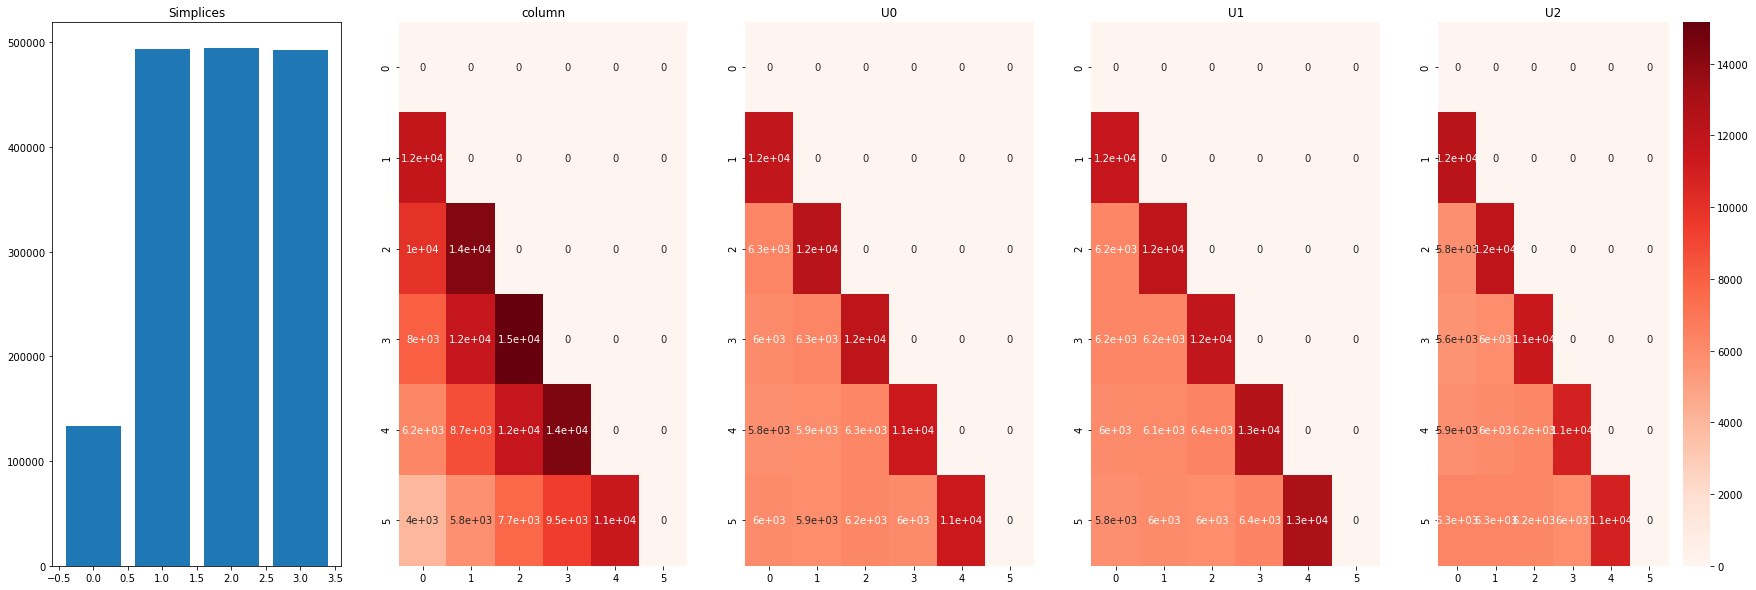

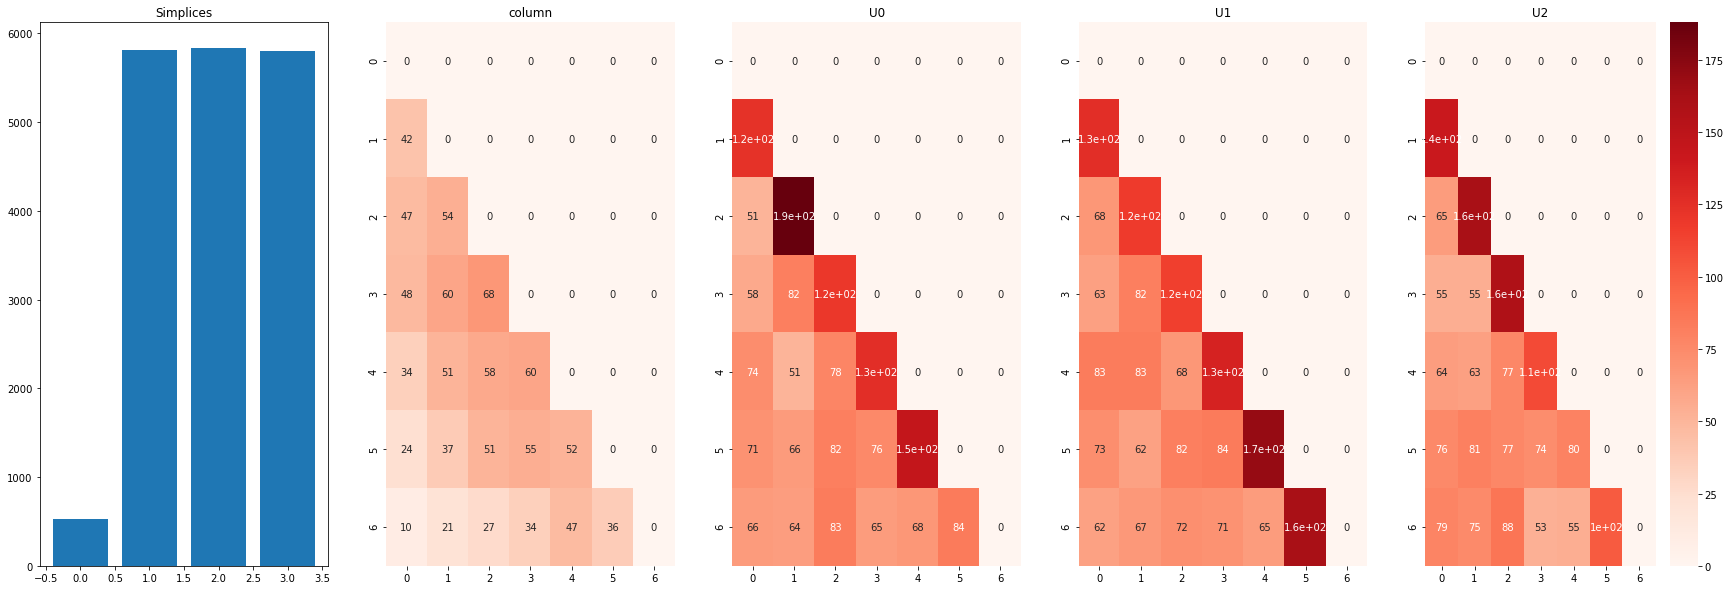

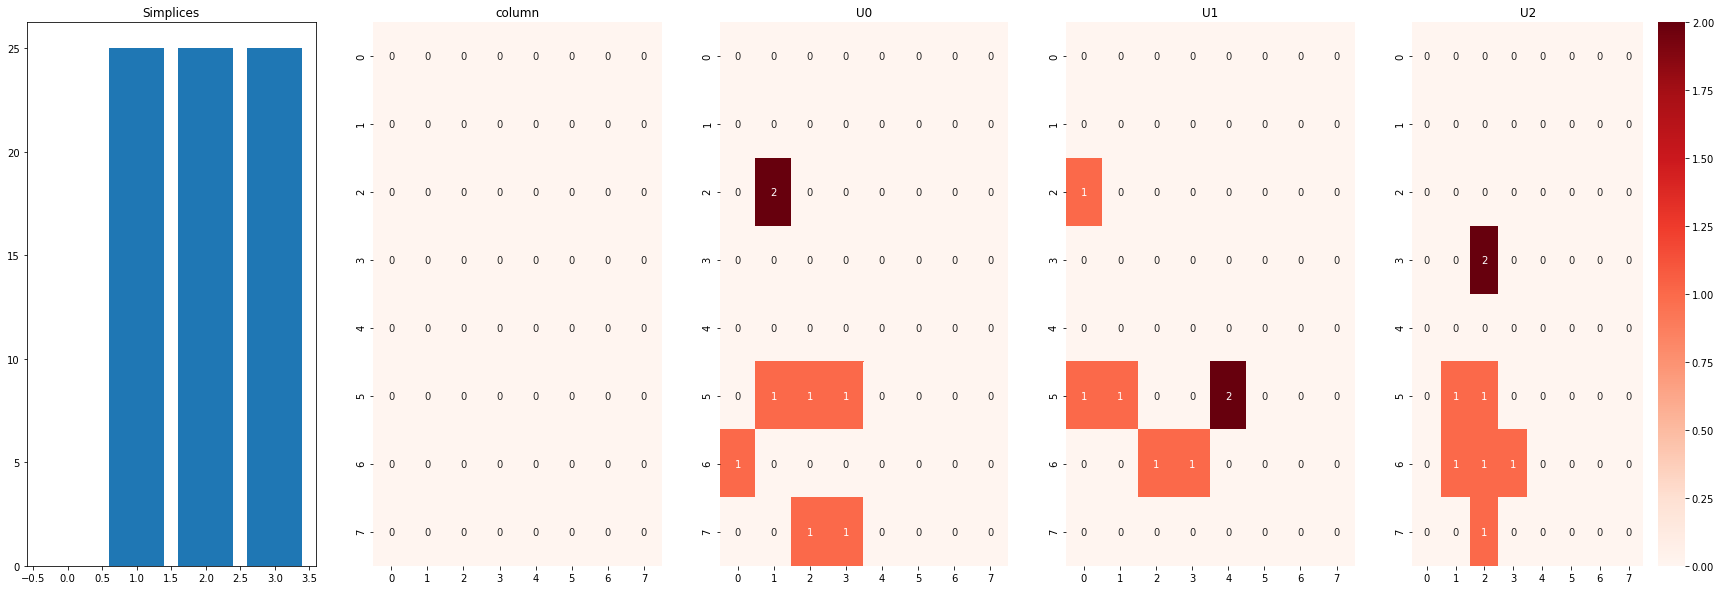

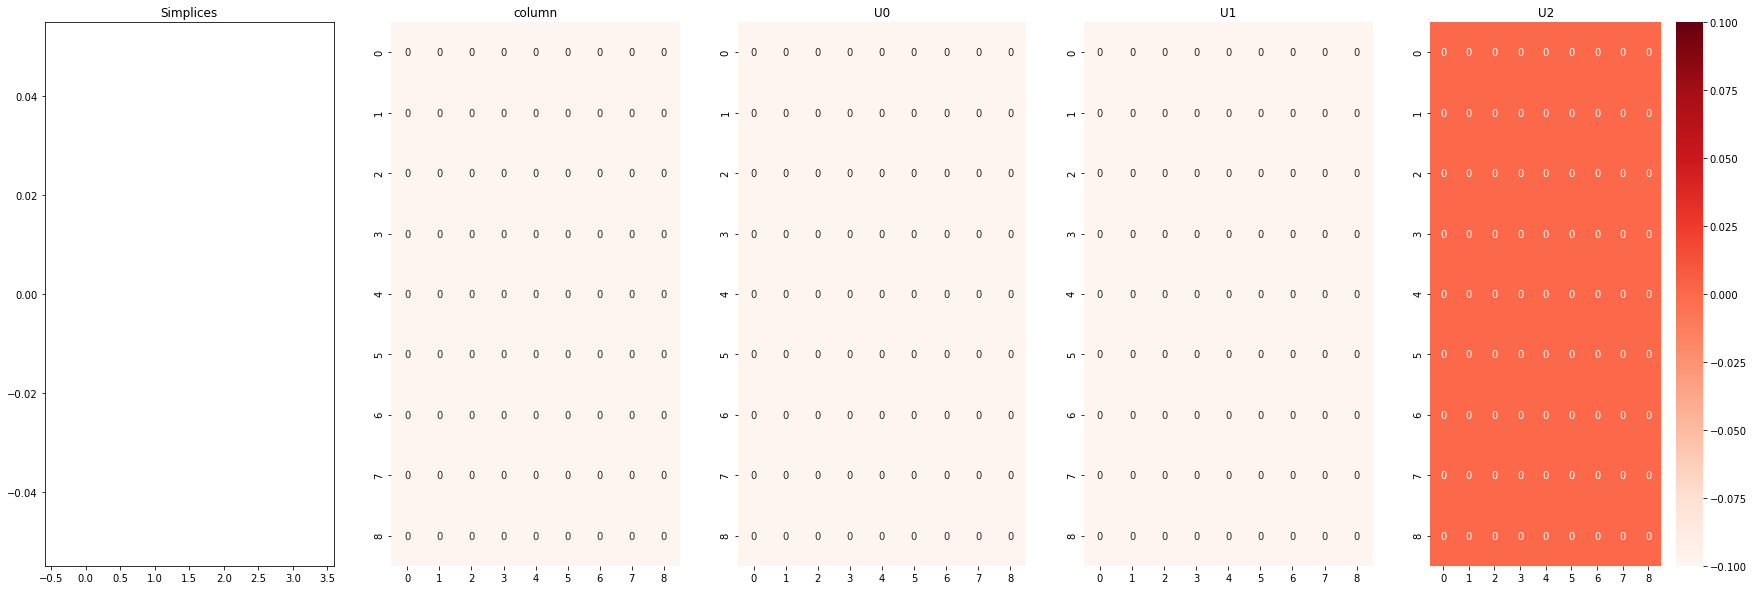

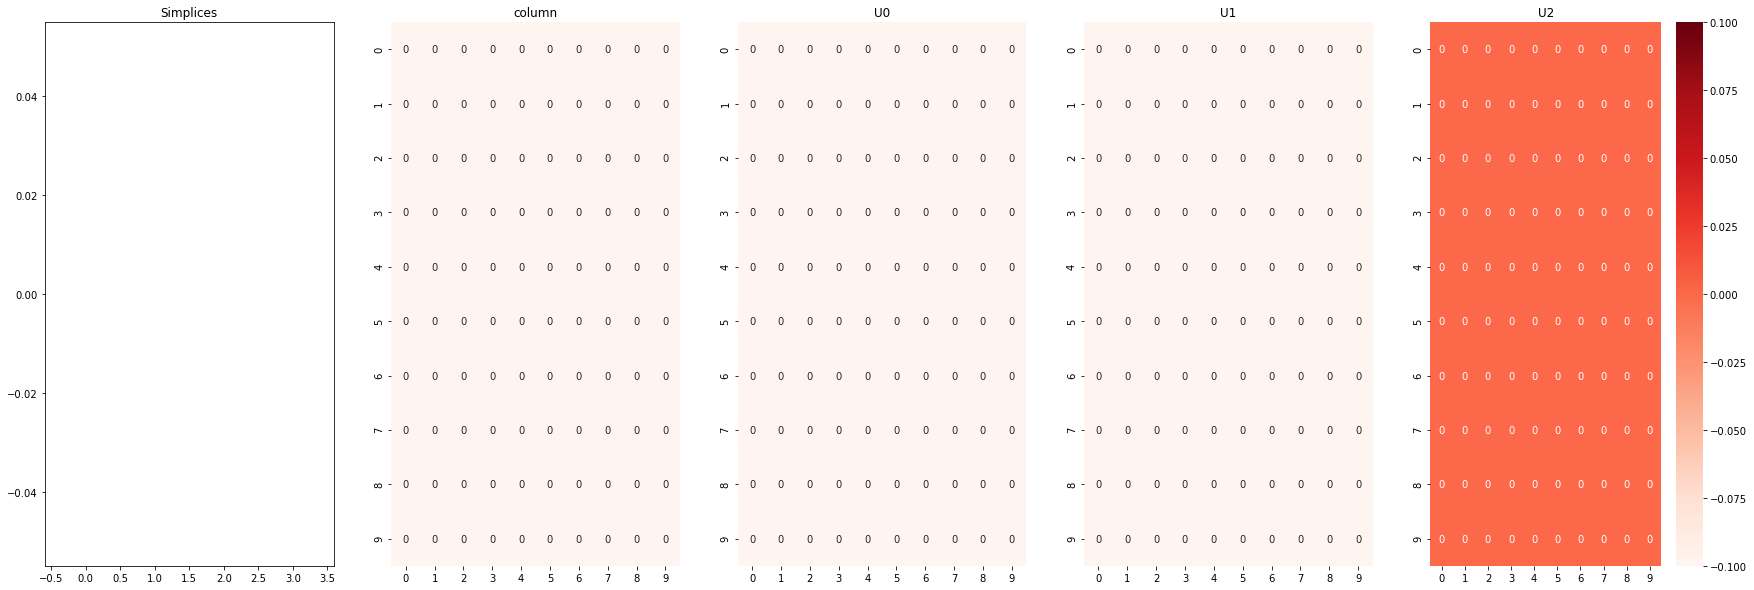

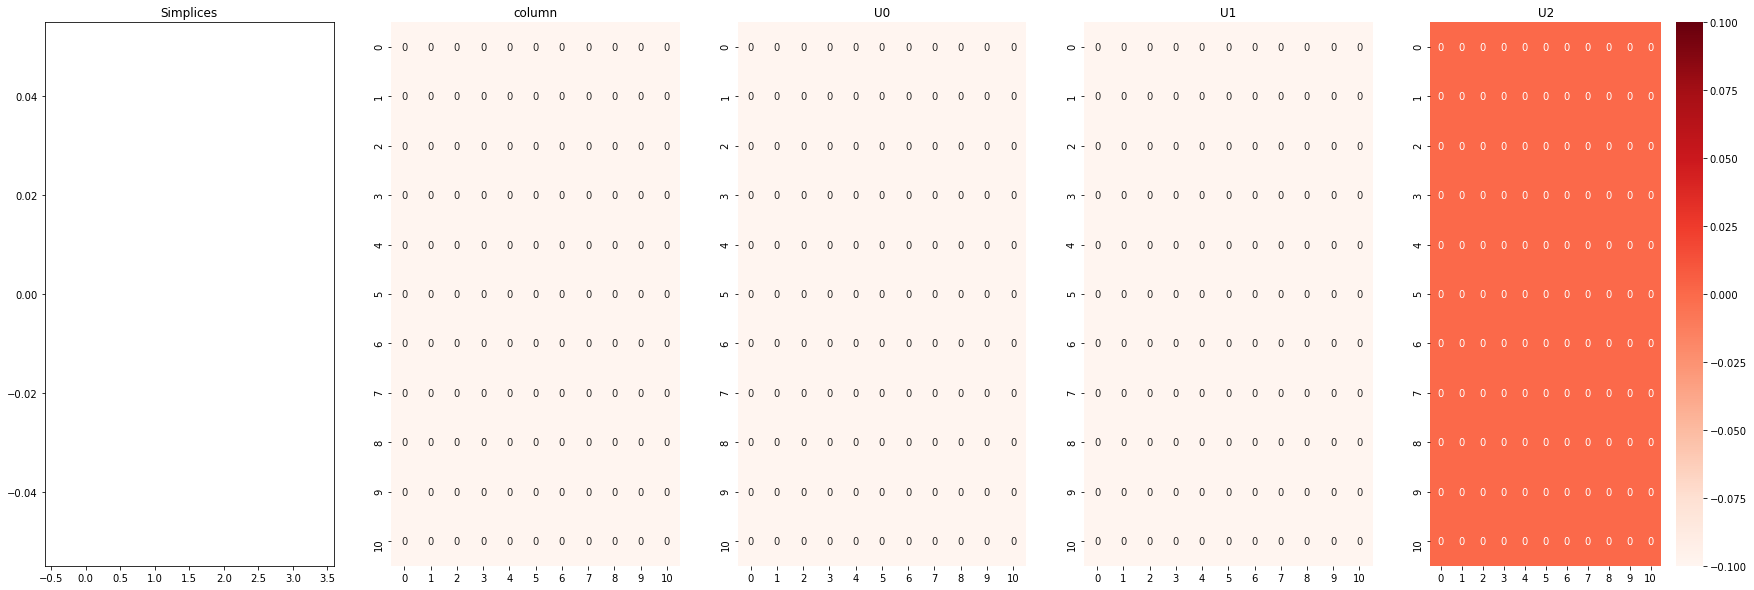

In [29]:
compare_graphs([a,d0,d1,d2], 1, "variance_dim_underlying", title_list = ["Simplices", "column", "U0", "U1", "U2"])

In [ ]:
for ee in range(1,10):
    a = pickle.load(open(Path(f"data/bcounts/test_1/dim5/ee{ee}/bcount.pkl"), 'rb'))
    fig = plt.figure()
    ax = fig.add_subplot()
    m = np.tril(a[4])
    m = m / np.sum(m)
    sns.heatmap(m, annot = True, cmap = 'Reds', ax = ax, vmax = 0.12)
    fig.savefig(f"Simplex5{ee}EEPC", facecolor = 'white')

FileNotFoundError: [Errno 2] No such file or directory: 'data/bcounts/test_1/dim4/ee7/bcount.pkl'

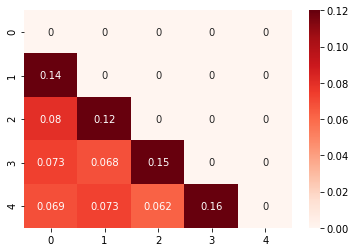

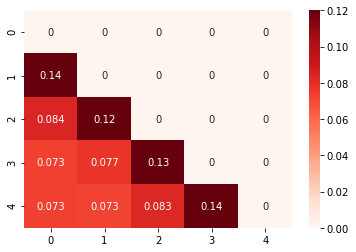

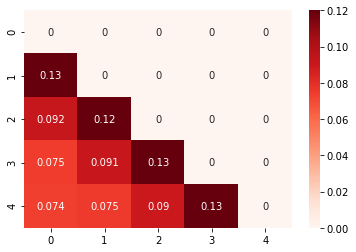

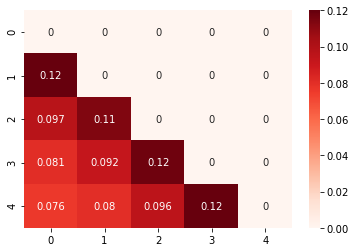

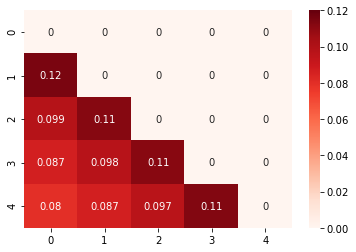

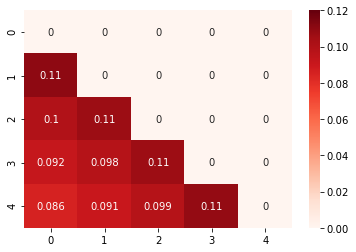

In [32]:
for ee in range(1,10):
    a = pickle.load(open(Path(f"data/bcounts/test_1/dim4/ee{ee}/bcount.pkl"), 'rb'))
    fig = plt.figure()
    ax = fig.add_subplot()
    m = np.tril(a[4])
    m = m / np.sum(m)
    sns.heatmap(m, annot = True, cmap = 'Reds', ax = ax, vmax = 0.12)
    fig.savefig(f"Simplex4{ee}EEPC", facecolor = 'white')

In [1]:
for dim in range(1,5):
    a = pickle.load(open(Path(f"data/bcounts/column/bcount.pkl"), 'rb'))
    fig = plt.figure()
    ax = fig.add_subplot()
    m = np.tril(a[dim])
    m = m / np.sum(m)
    sns.heatmap(m, annot = True, cmap = 'Reds', ax = ax, vmax = 0.12)
    fig.savefig(f"Column" +str(dim), facecolor = 'white')

NameError: name 'pickle' is not defined